# Project 04-04: Kmeans Clustering
*by Thorge Dobbertin, Julia Köberle, Marilena Wittmaack und Benedict Wolf*


In [42]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import sklearn.cluster as sk

## WWDK Package

We created a Package divided into three modules. The first module *Data* preprocesses our data to make clustering easier. The next module *Cluster* allows to choose a clustering method to cluster the data. The third module *Utilities* contains useful functions to present the data and compare our Clustering methods against the sklearn implementations

In [43]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u

## Kmeans

The Kmeans class uses the sklearn estimators and contains the following methods:

In [ ]:
Kmeans(inits=10, k=8, maxit=300, method="++", tol = 1e-3)

##### inits : int, optional, default:10
Number of random initializations that are tried. (Each time new initial centroids are picked and in the end the result with the lowest inertia is picked)
##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### maxit : int, optional, default:300
Maximal amount of iterations to move the centroids to their new barycentre.
##### method : {‘++’ or ‘rng’}, default: ‘++’
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: chooses x points at random from data for the initial centroids.
##### tol : float, optional, default:1e-3
Controls early stopping based on the difference between the old and new centroids' positions. 


In [ ]:
Kmeans.fit(data)

Fits the data into k clusters, returns:

cluster_centers_ = centroids

labels_ = assignments to centroids

inertia_ = best_clust

In [ ]:
Kmeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

In [ ]:
Kmeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

## Minibatch Kmeans

Different to Kmeans, MiniBatchKMeans uses not all data points at once to cluster the data, but uses randomly chosen batches from data.
The MiniBatchKMeans class contains the following methods:

In [ ]:
MiniBatchKMeans(k=8, inits=10, max_iterations=300, tol=1e-3, batch_size=100, method = "++")

##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### inits : int, optional, default:10
Not included to increase speed.
##### max_iterations : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### tol : float, optional, default:1e-3
Controls early stopping based on the difference between the old and new centroids' positions. 
##### batch_size : int, optional, default:100
Size of the mini batches. 
  
**method : {‘++’ or ‘rng’}, default: ‘++’**  
  
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: chooses x points at random from data for the initial centroids.

In [ ]:
MiniBatchKMeans.create_batch(data)

Chooses random points from data.

In [ ]:
MiniBatchKMeans.initialize(data)

Sets centroid points from data randomly(‘rng’) or with k++ method (‘++’).

In [ ]:
MiniBatchKMeans.expectation(data, centroids)

Measures the euclidean distance between each point of data and each centroid.

In [ ]:
MiniBatchKMeans.maximization(data, assignments, centroids, centroid_count)

Assigns datapoints to centroids and counts the assigned points to calculate a learning rate. The centroids are moved to newly determined centroids according to the learning rate.

In [ ]:
MiniBatchKMeans.final_assignments(data, centroids)

Assigns all datapoints of data to centroids.

In [ ]:
MiniBatchKMeans.fit(data)

Fits the data into k clusters, using the methods explained before. Returns:

labels_ = assignments to centroids

cluster_centers_ = centroids

In [ ]:
MiniBatchKMeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

In [ ]:
MiniBatchKMeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

## WWDK vs sklearn

First we have a look at a random training data set. The 8 cluster are already clearly visible in this case.
We use this data to compare our algorithm (WWDK) and the sklearn implementation.

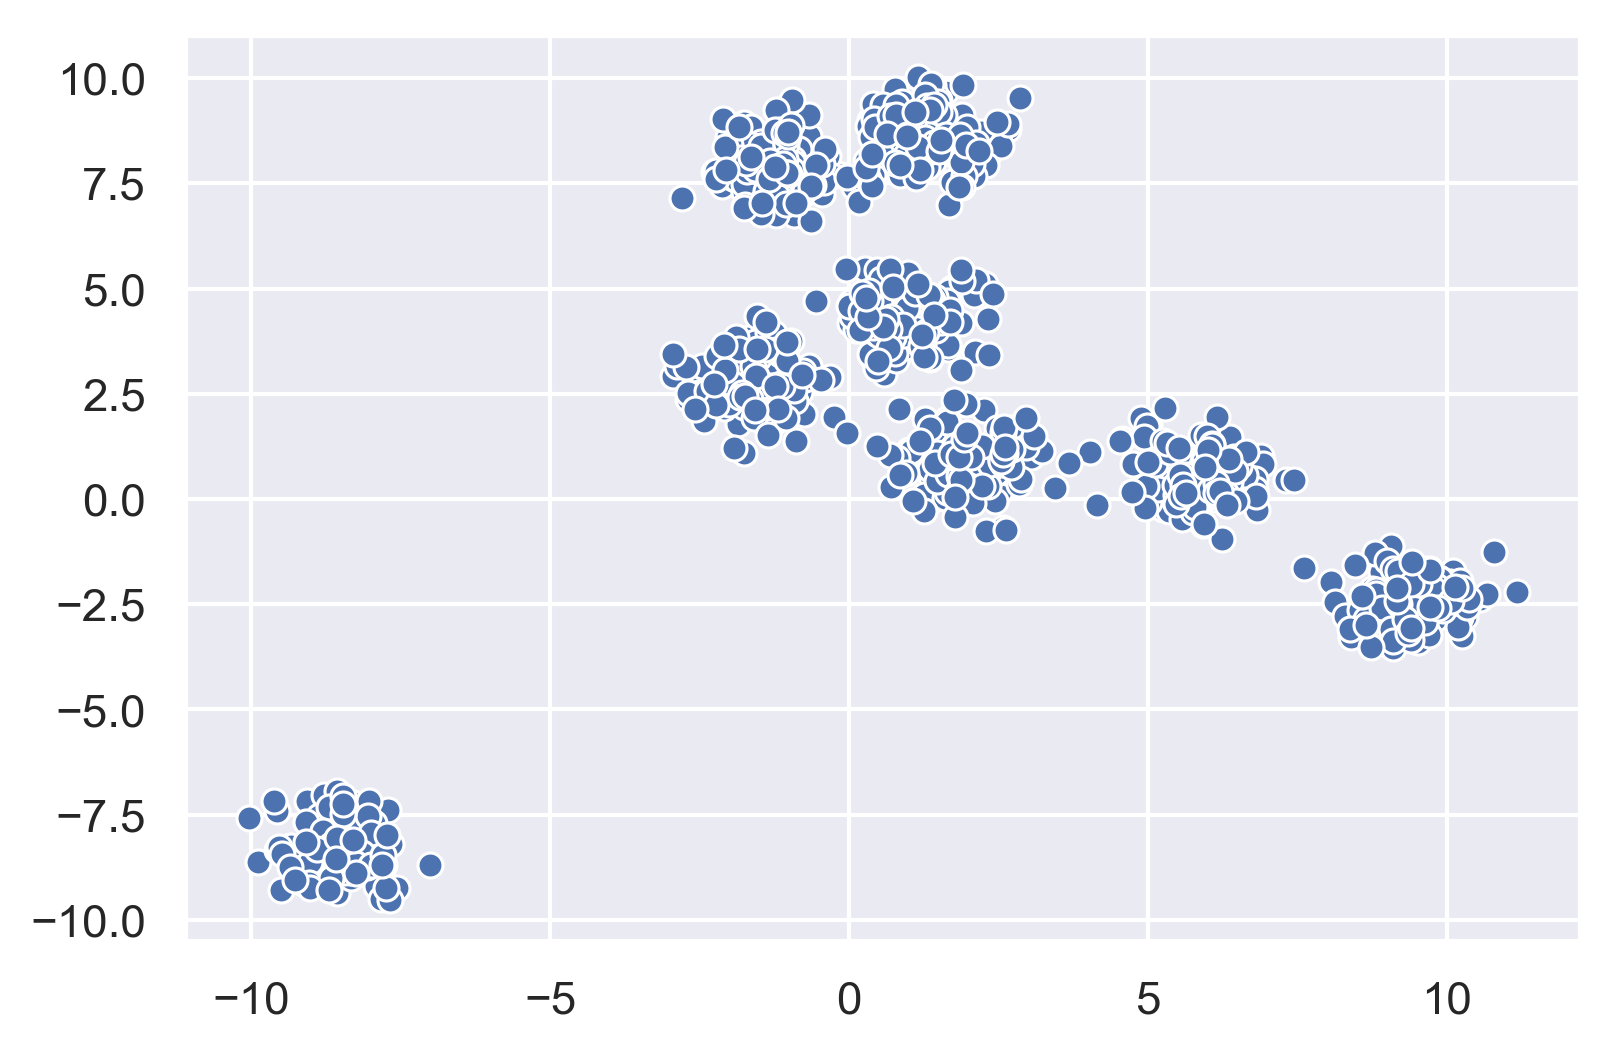

In [7]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X[:, 0], X[:, 1]);

Looking at an elbow plot, its difficult to determine the best number of centroids k. The global distribution of the data is challenging as some clusters are really close together and we have an outlier. 

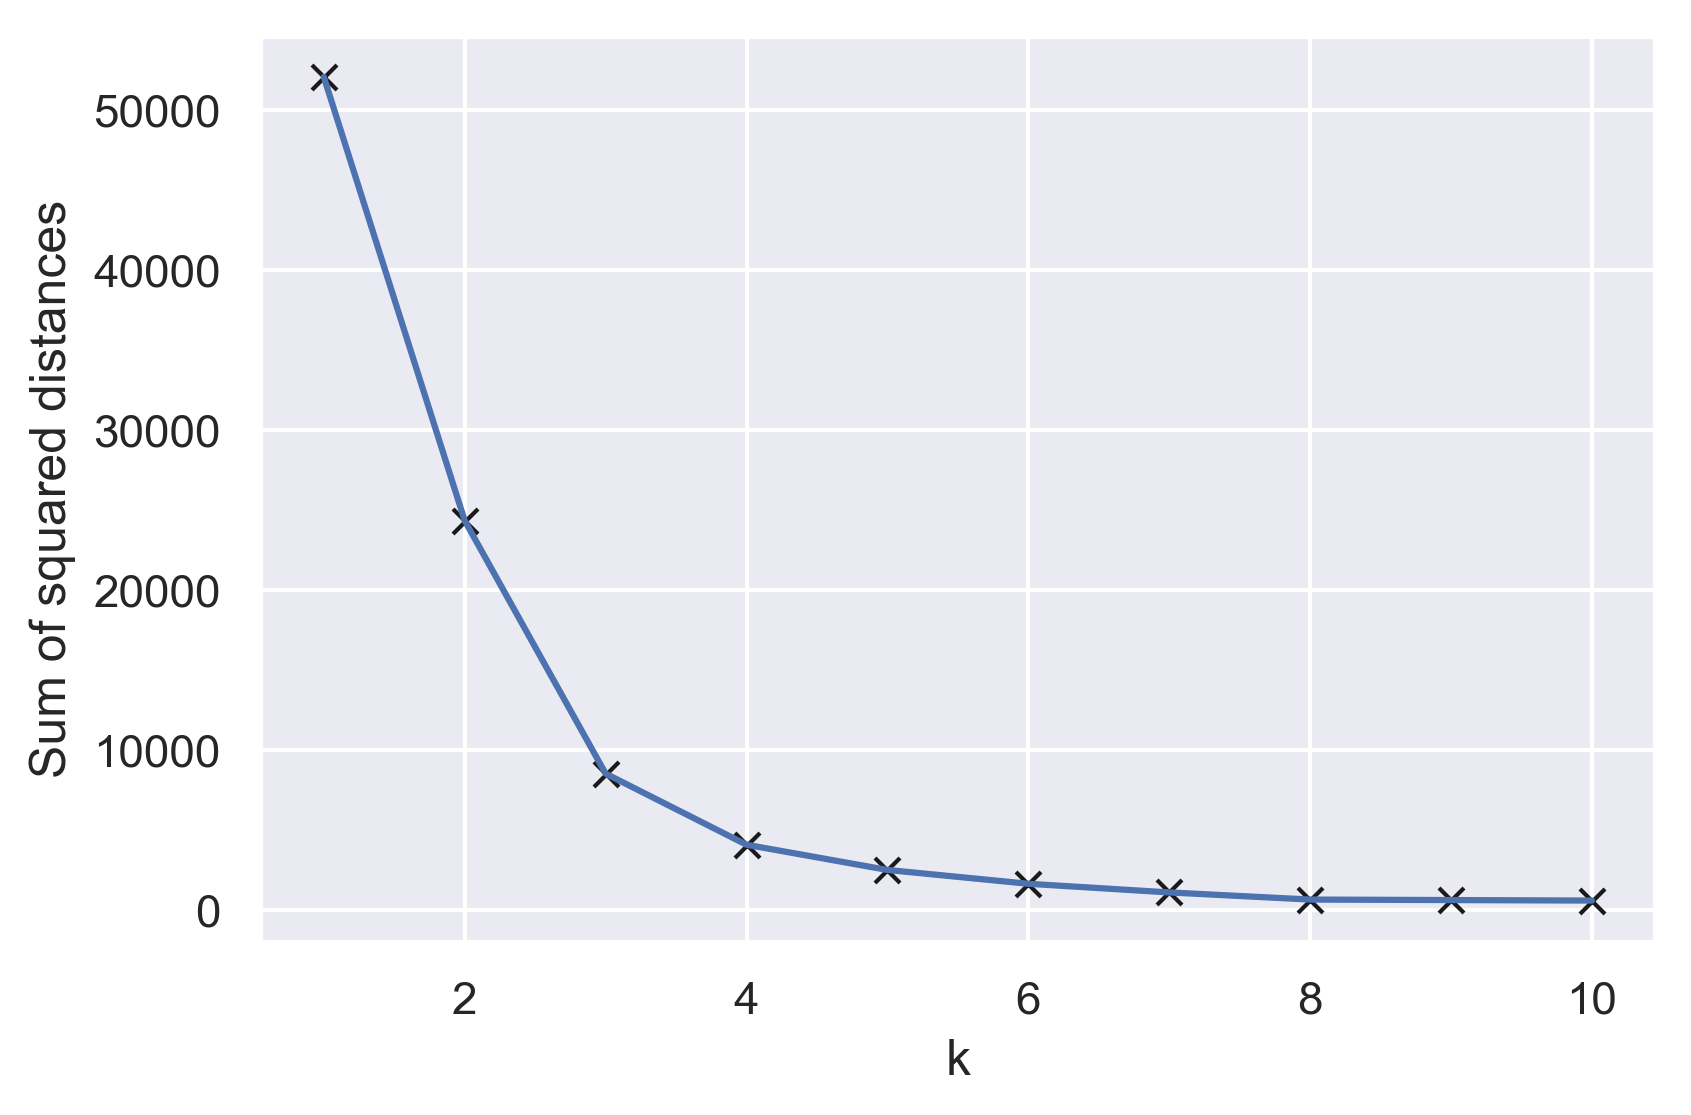

In [8]:
u.elbow_plot(X, max_k=10) 

#uses our WWDK vanilla code with set parameters to calculate the inertia

As we know what to expect, we choose the number of clusters k=8. 

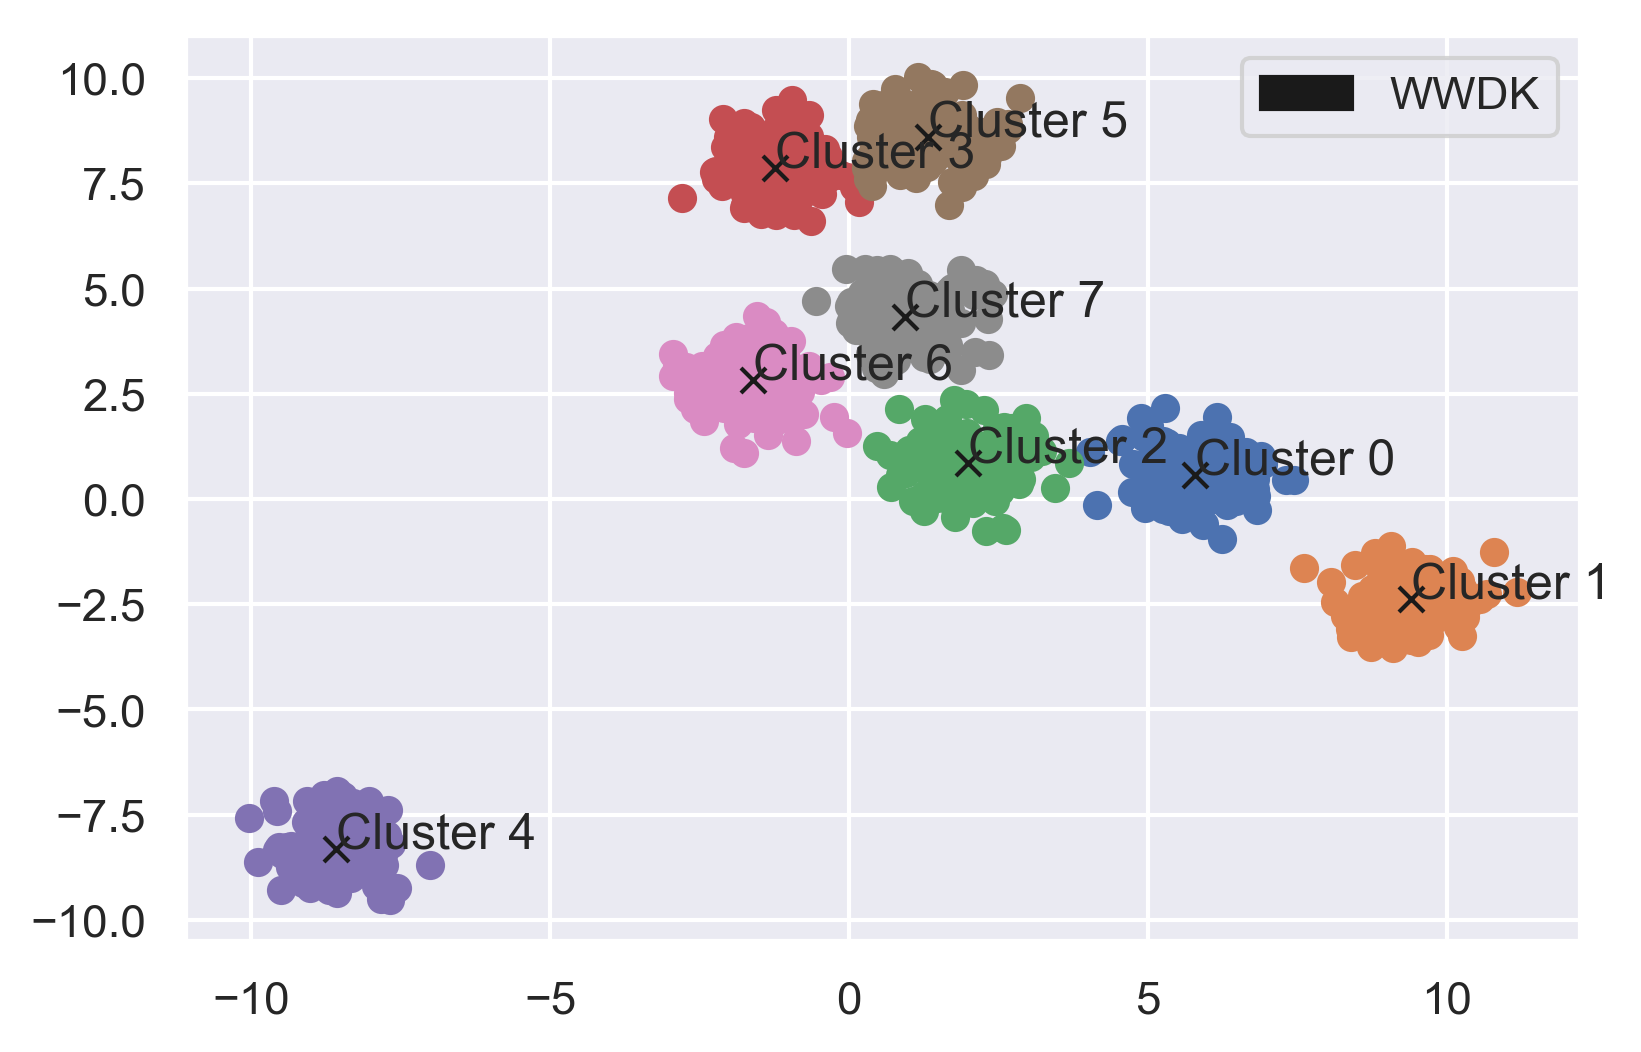

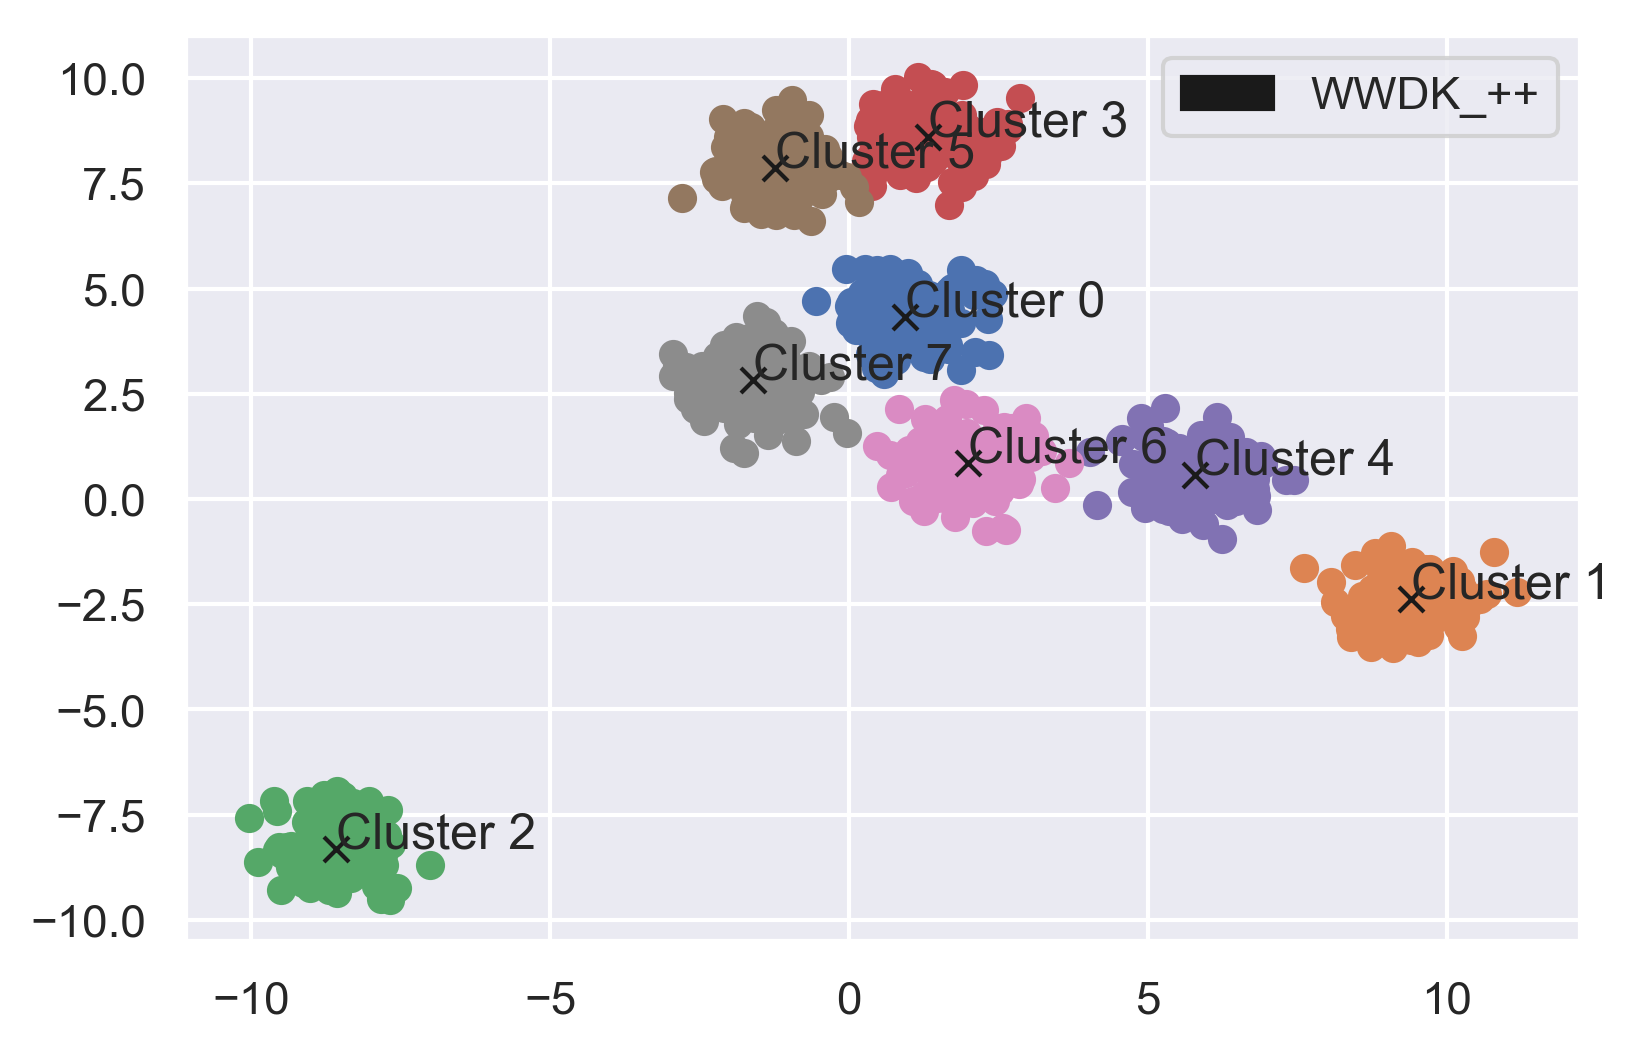

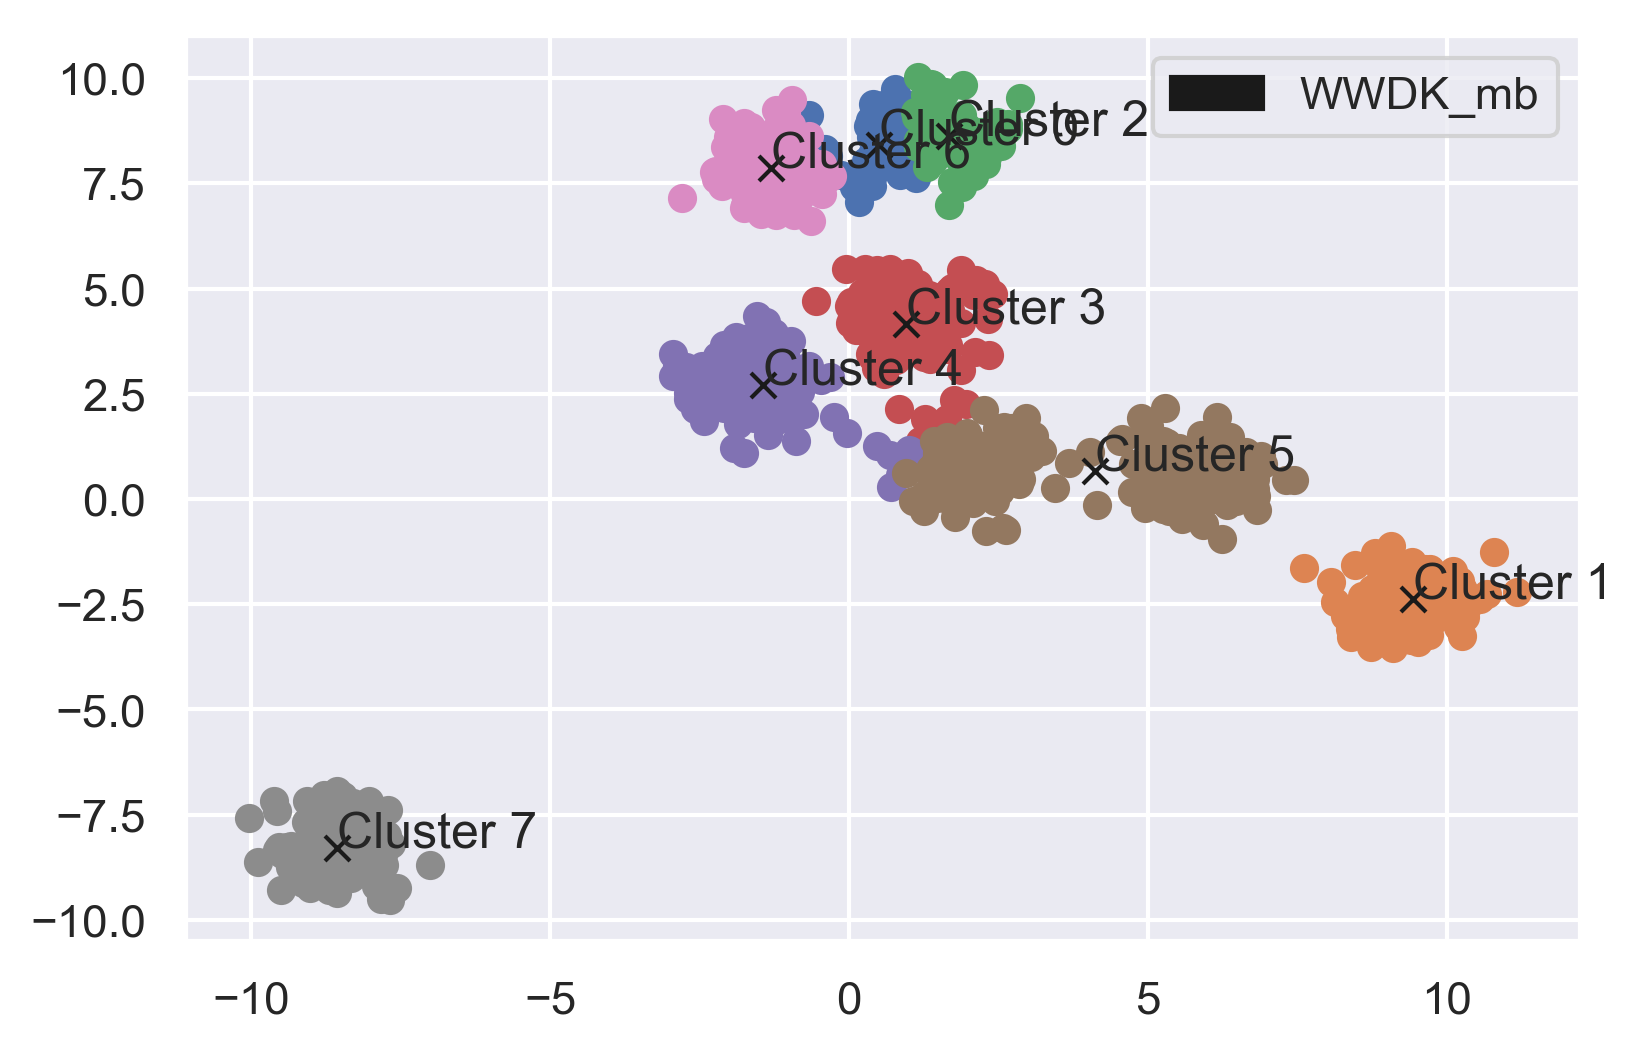

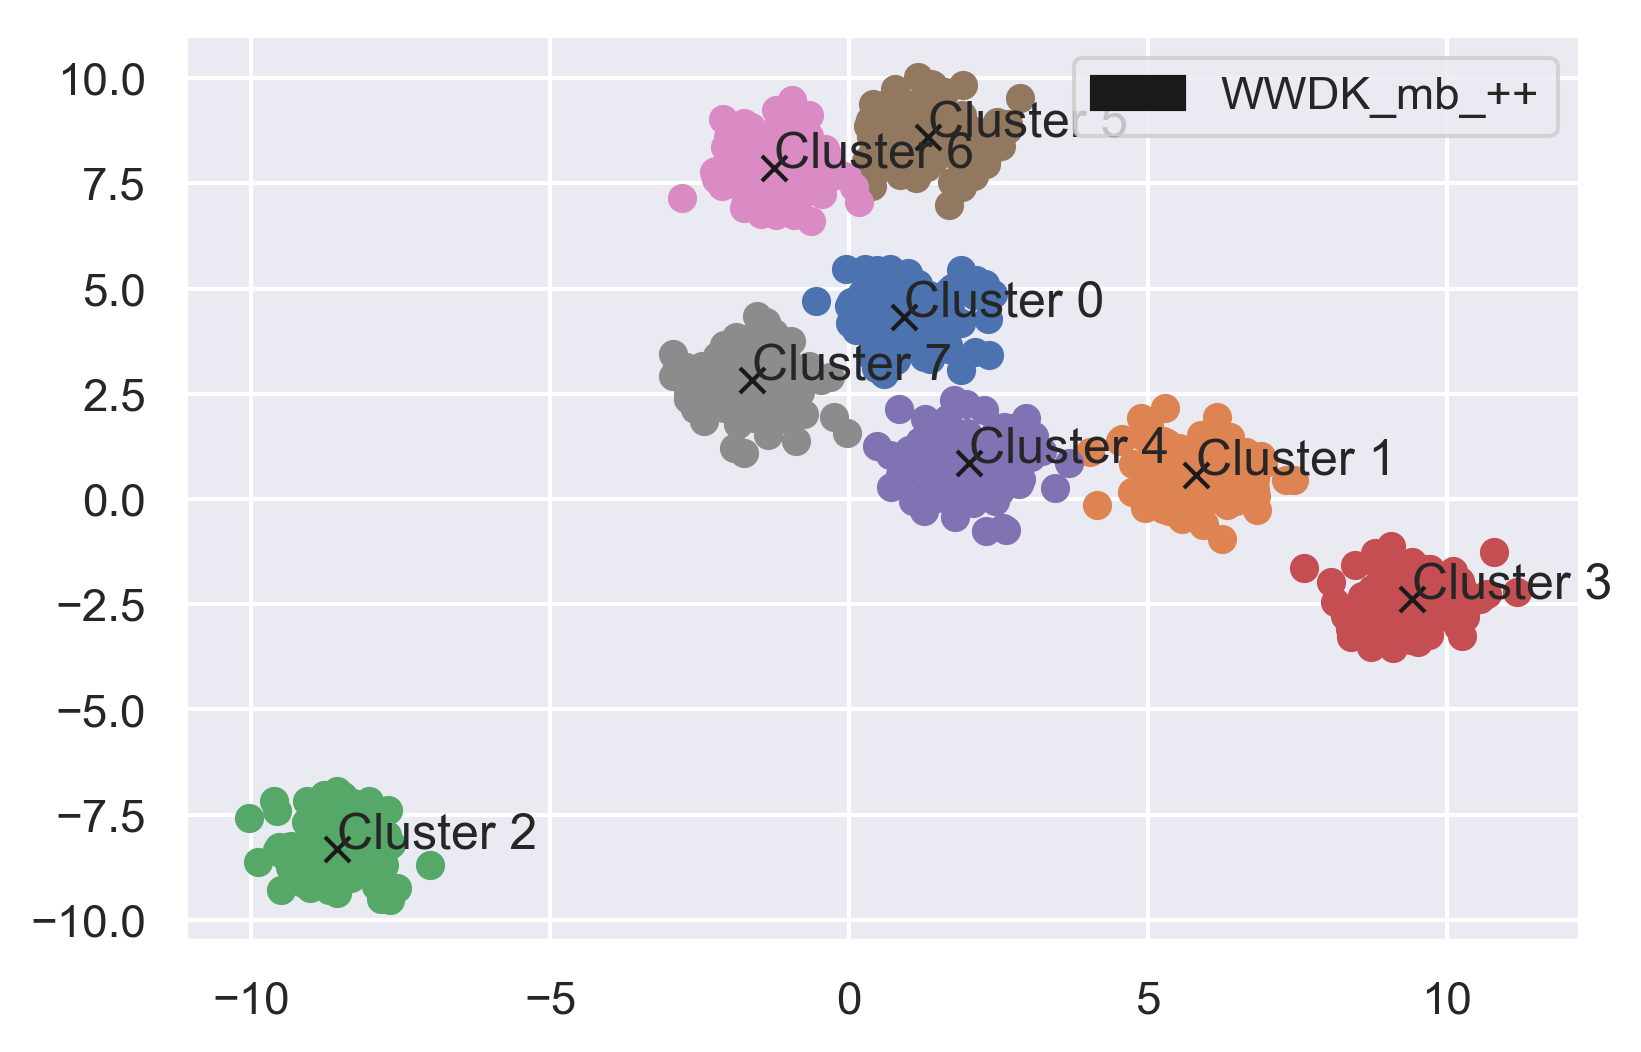

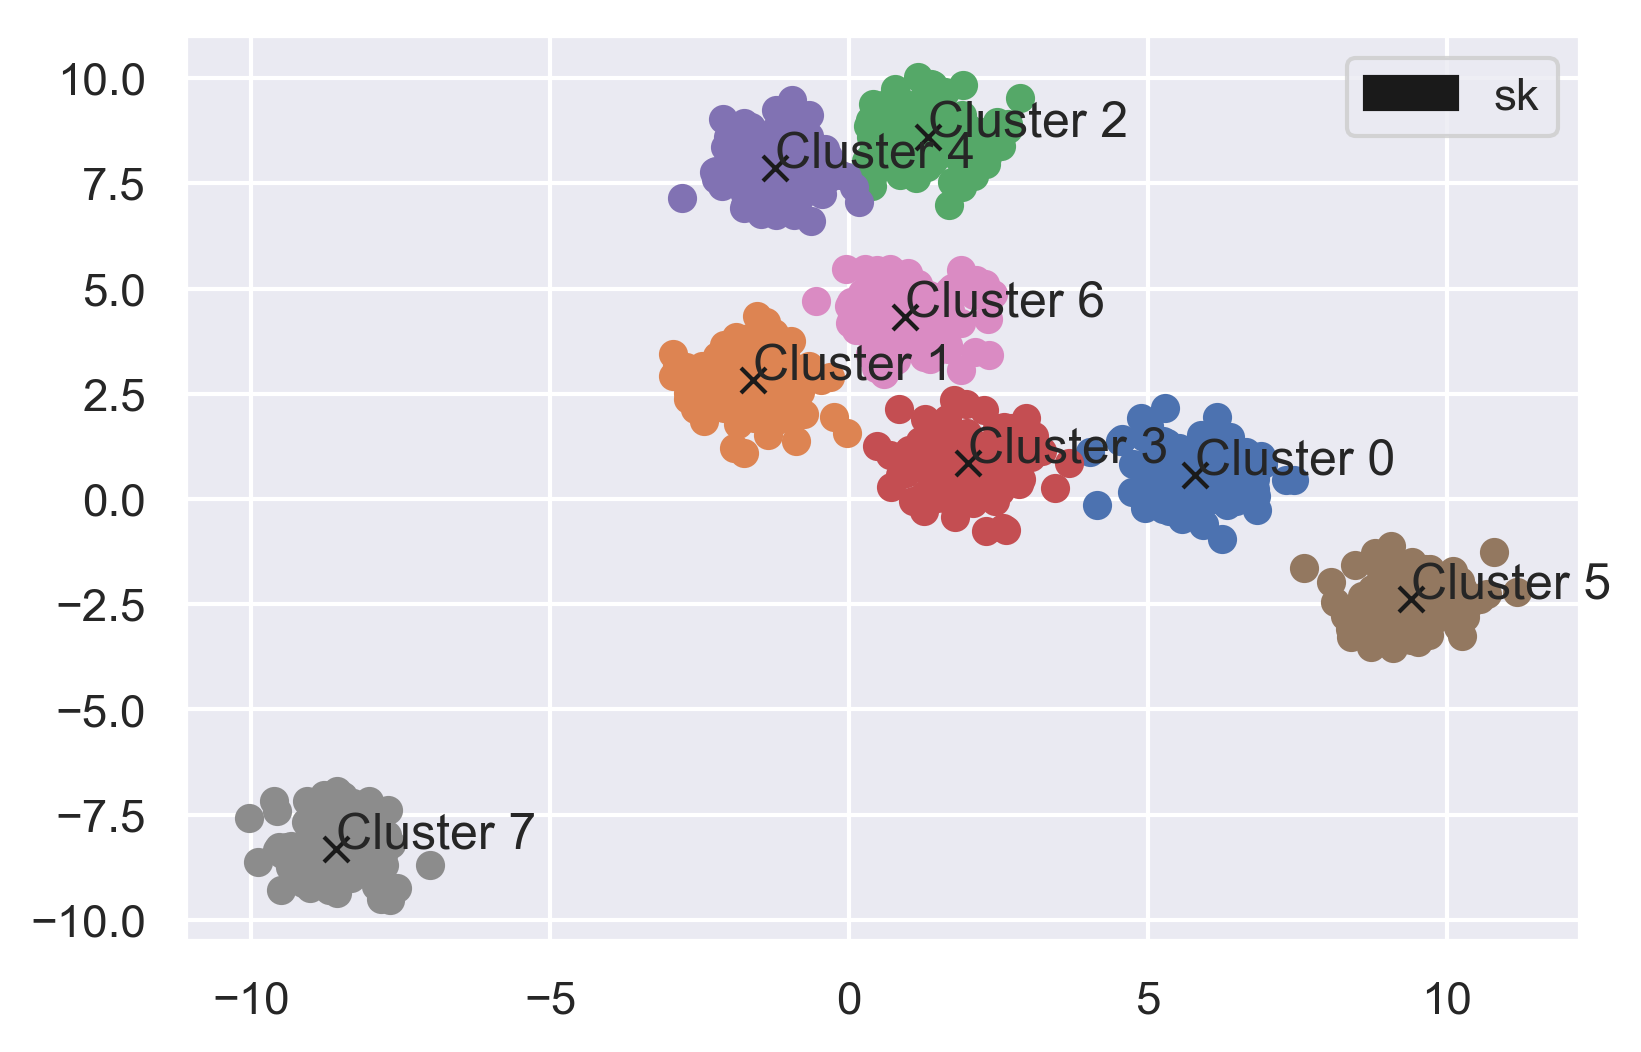

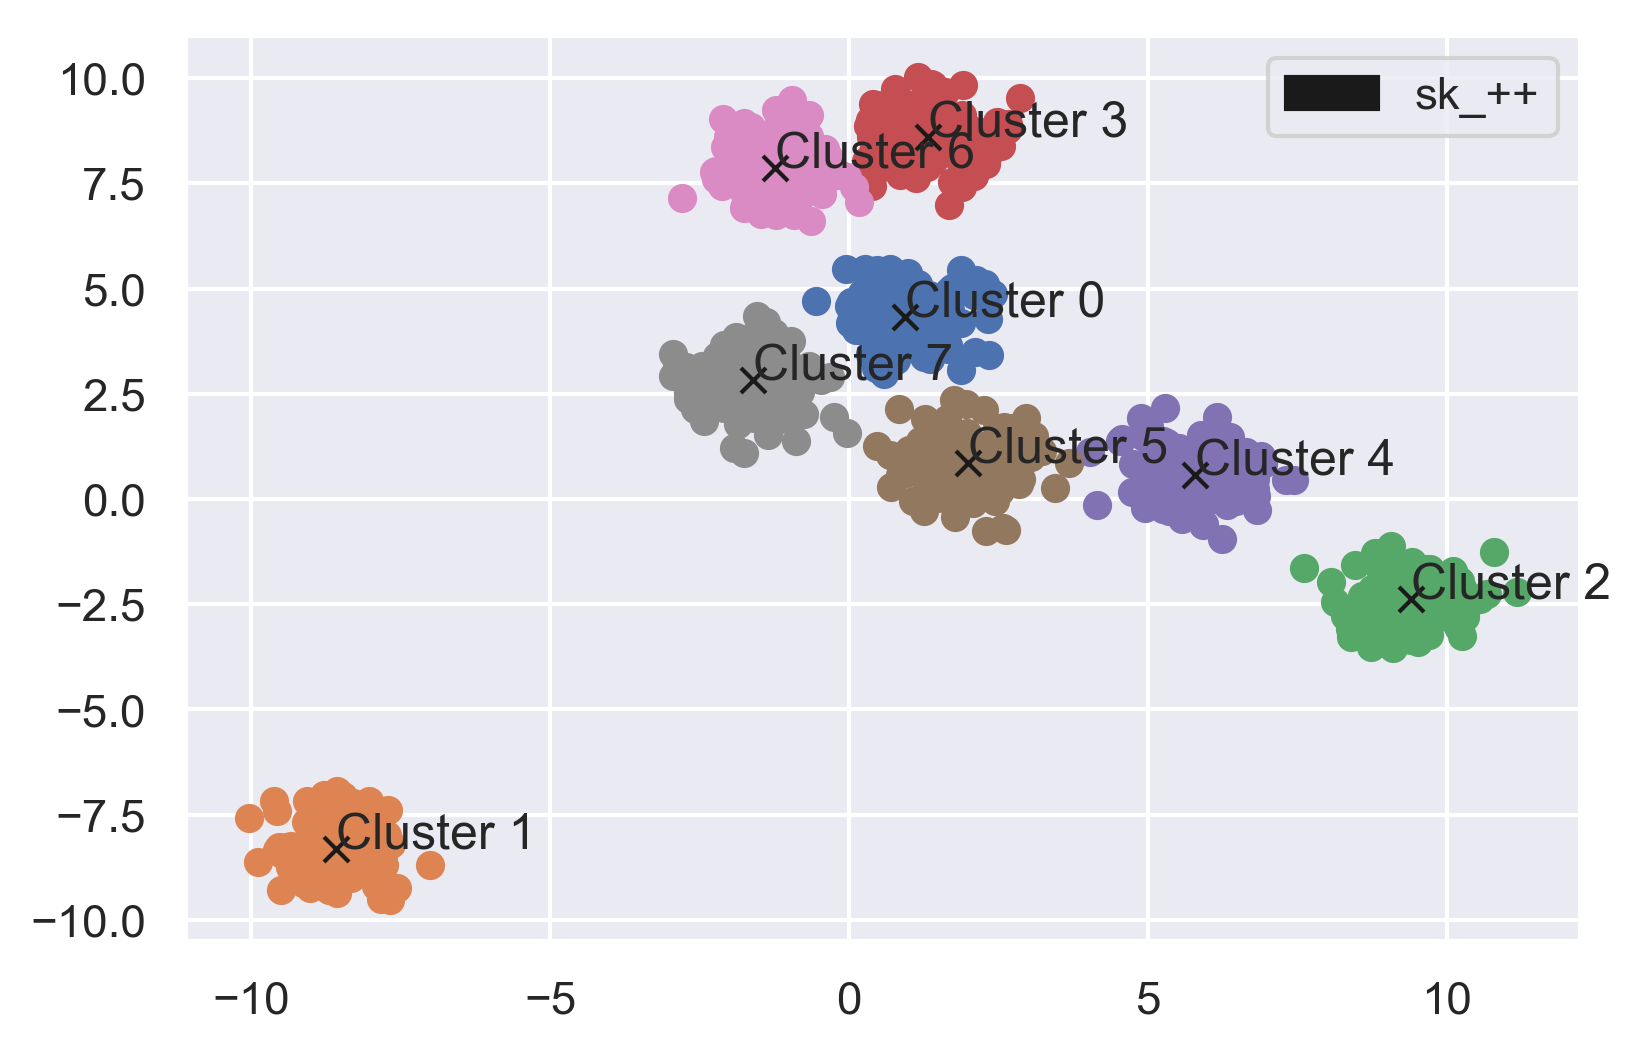

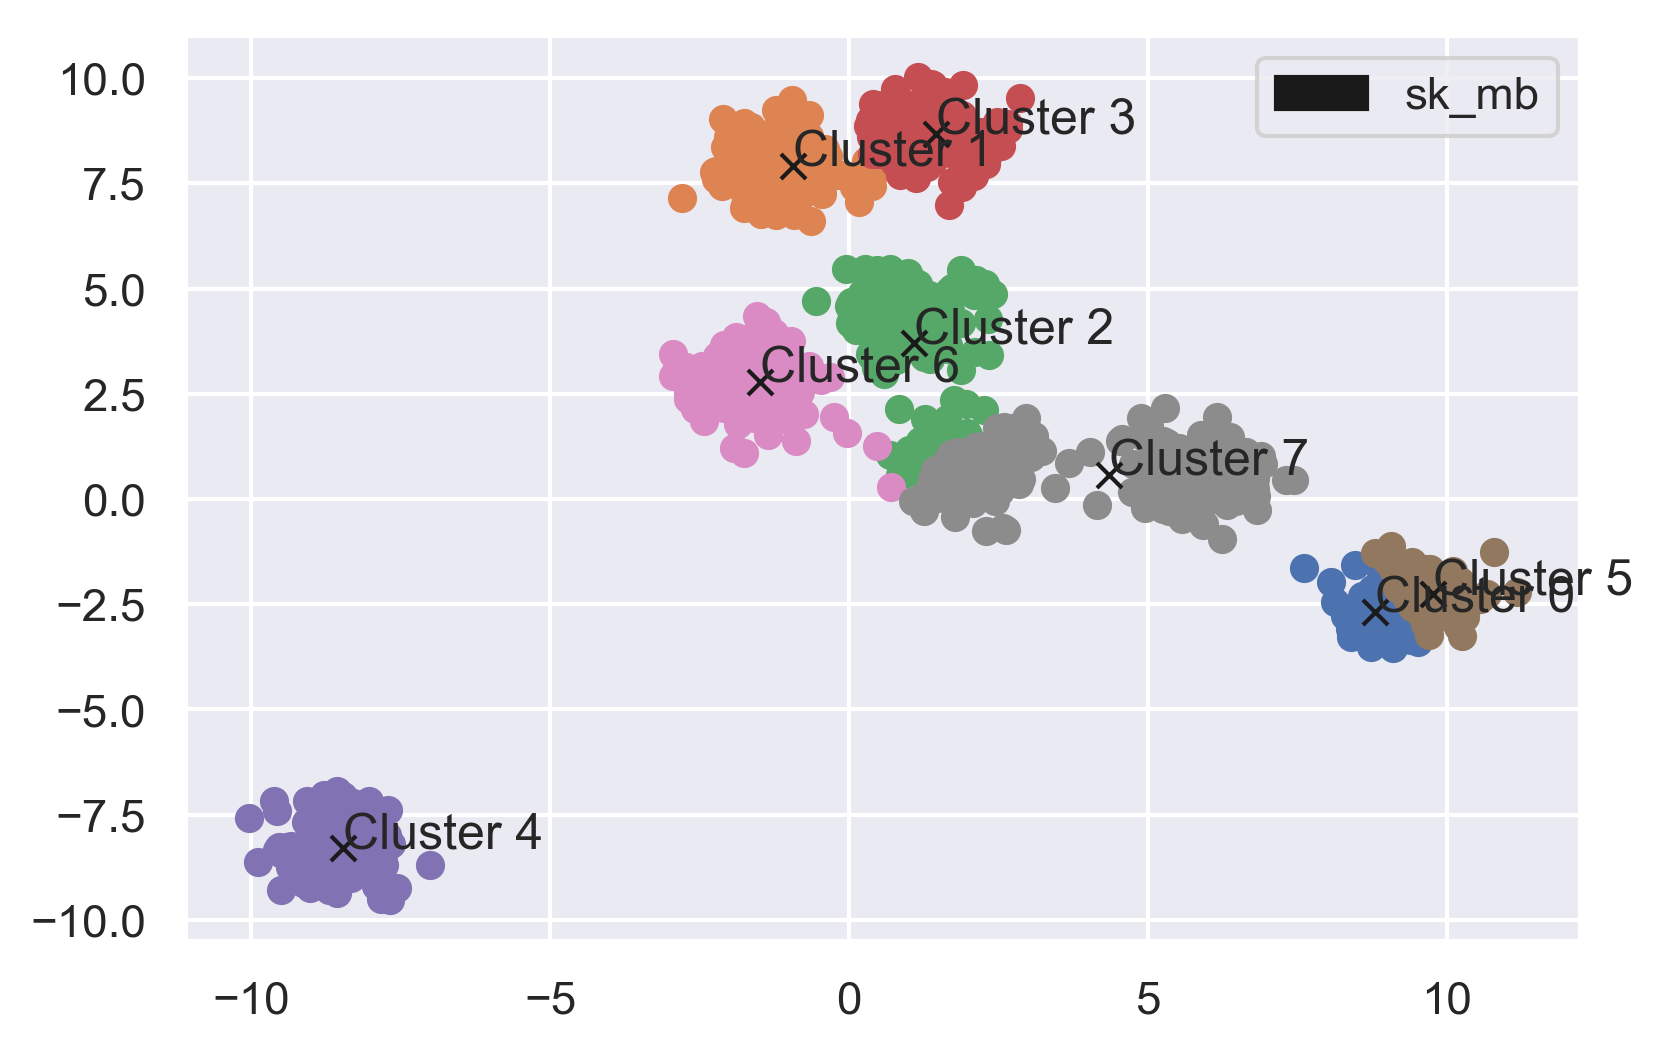

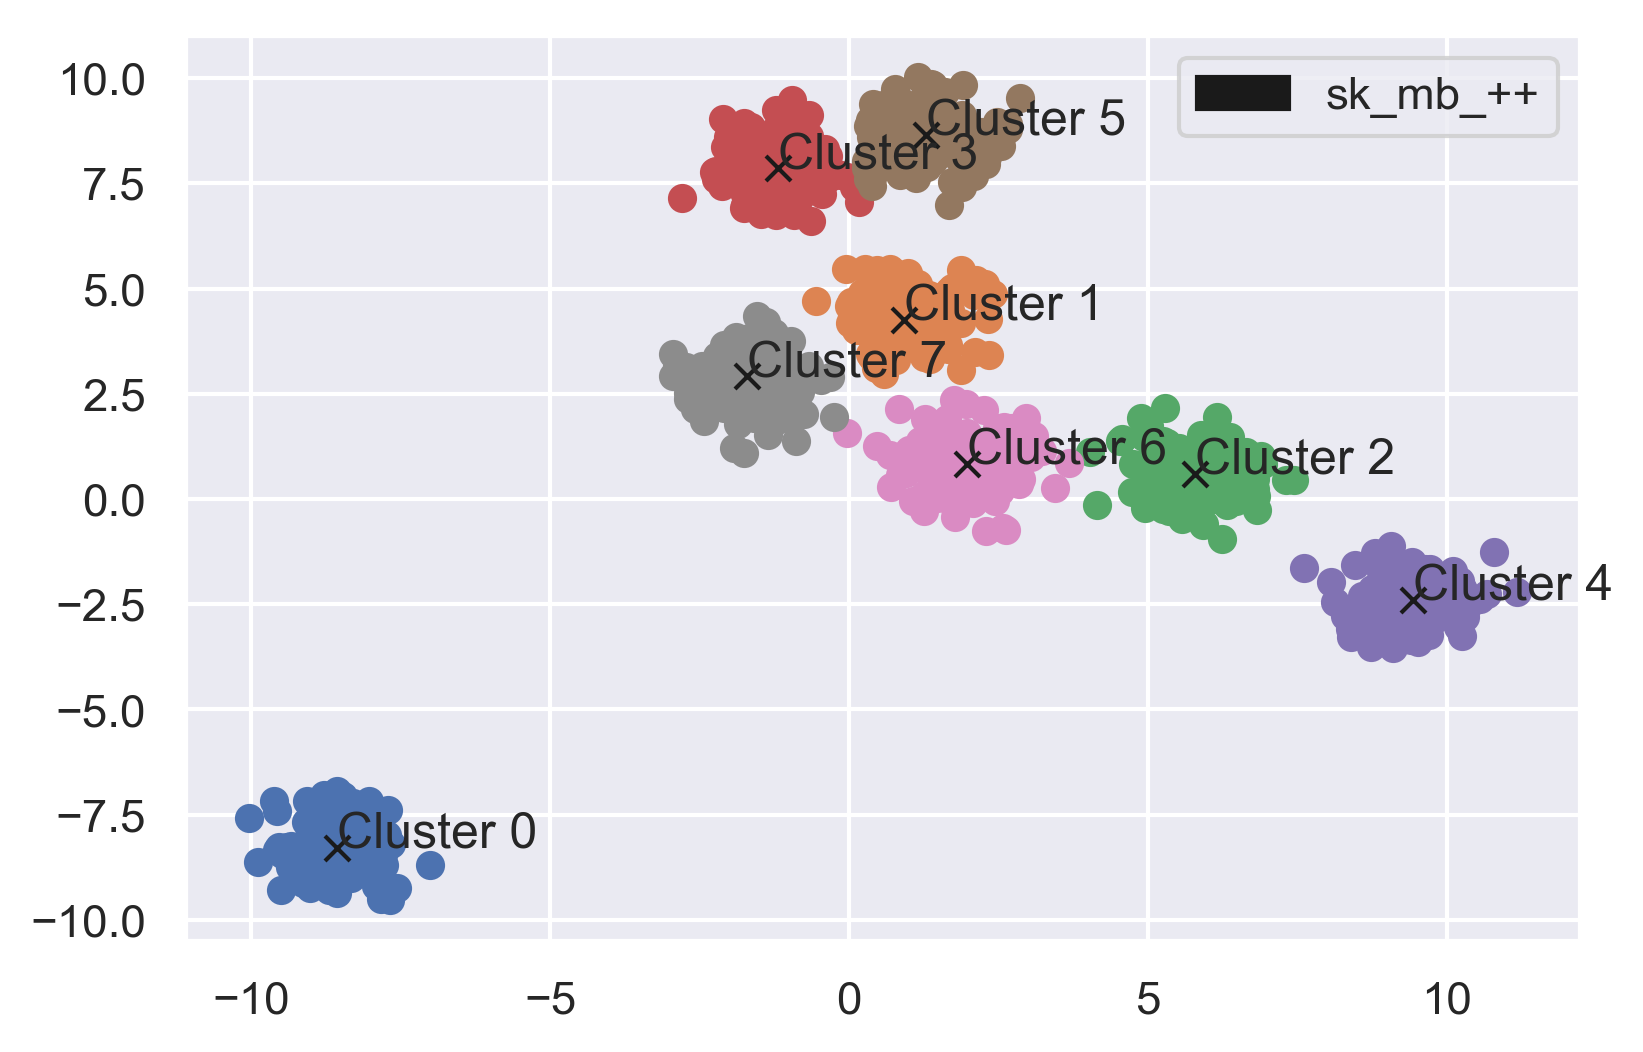

In [9]:
WWDK = cl.Kmeans(method="rng", k=8)
X1 = WWDK.fit(X)

WWDKplus = cl.Kmeans(k=8)
X2 = WWDKplus.fit(X)

WWDKmb = cl.MiniBatchKMeans(method="rng", k=8)
X3 = WWDKmb.fit(X)

WWDKmbplus = cl.MiniBatchKMeans(k=8)
X4 = WWDKmbplus.fit(X)

SK = sk.KMeans(init="random", n_clusters=8)
X5 = SK.fit(X)

skplus = sk.KMeans(n_clusters=8)
X6 = skplus.fit(X)

skmb = sk.MiniBatchKMeans(init="random", n_clusters=8)
X7 = skmb.fit(X)

skmbplus = sk.MiniBatchKMeans(n_clusters=8)
X8 = skmbplus.fit(X)

#useful definition from our utilities module to quickly plot clustering, k=8 had to be defined for labeling
u.plot_compare(X,WWDK.labels_, WWDK.cluster_centers_, 8, title="WWDK")
u.plot_compare(X,WWDKplus.labels_, WWDKplus.cluster_centers_, 8, title="WWDK_++")
u.plot_compare(X,WWDKmb.labels_, WWDKmb.cluster_centers_, 8, title="WWDK_mb")
u.plot_compare(X,WWDKmbplus.labels_, WWDKmbplus.cluster_centers_, 8, title="WWDK_mb_++")
u.plot_compare(X,SK.labels_, SK.cluster_centers_, 8, title="sk")
u.plot_compare(X,skplus.labels_, skplus.cluster_centers_, 8, title="sk_++")
u.plot_compare(X,skmb.labels_, skmb.cluster_centers_, 8, title="sk_mb")
u.plot_compare(X,skmbplus.labels_,skmbplus.cluster_centers_, 8, title="sk_mb_++")

Most of the time all algorithms seem to give us a reasonable clustering. Only our minibatch implementation seems to have difficulties, which is often fixed with the ++ implementation.

Comparing our package to sklearn we find our algorithm to be slower (regarding different numbers of centroids k and several runs/ inits) but of very similiar cluster quality.

For better understanding: our utility functions contain 2 parameters without defaults

time_k_plot(data, iterations, runs)

time_k_plot_mb(data, iterations, runs)

inertia_k_plot(data, iterations, runs)

time_init_plot(data, iterations, runs)

##### iterations
Maximal number of x variable which is tested against k or inits

##### runs
Number of repetitions for the whole code (for each x parameter which we test). Takes the mean in the end. This is to avoid random fluctuations inherent to the algorithm itself.


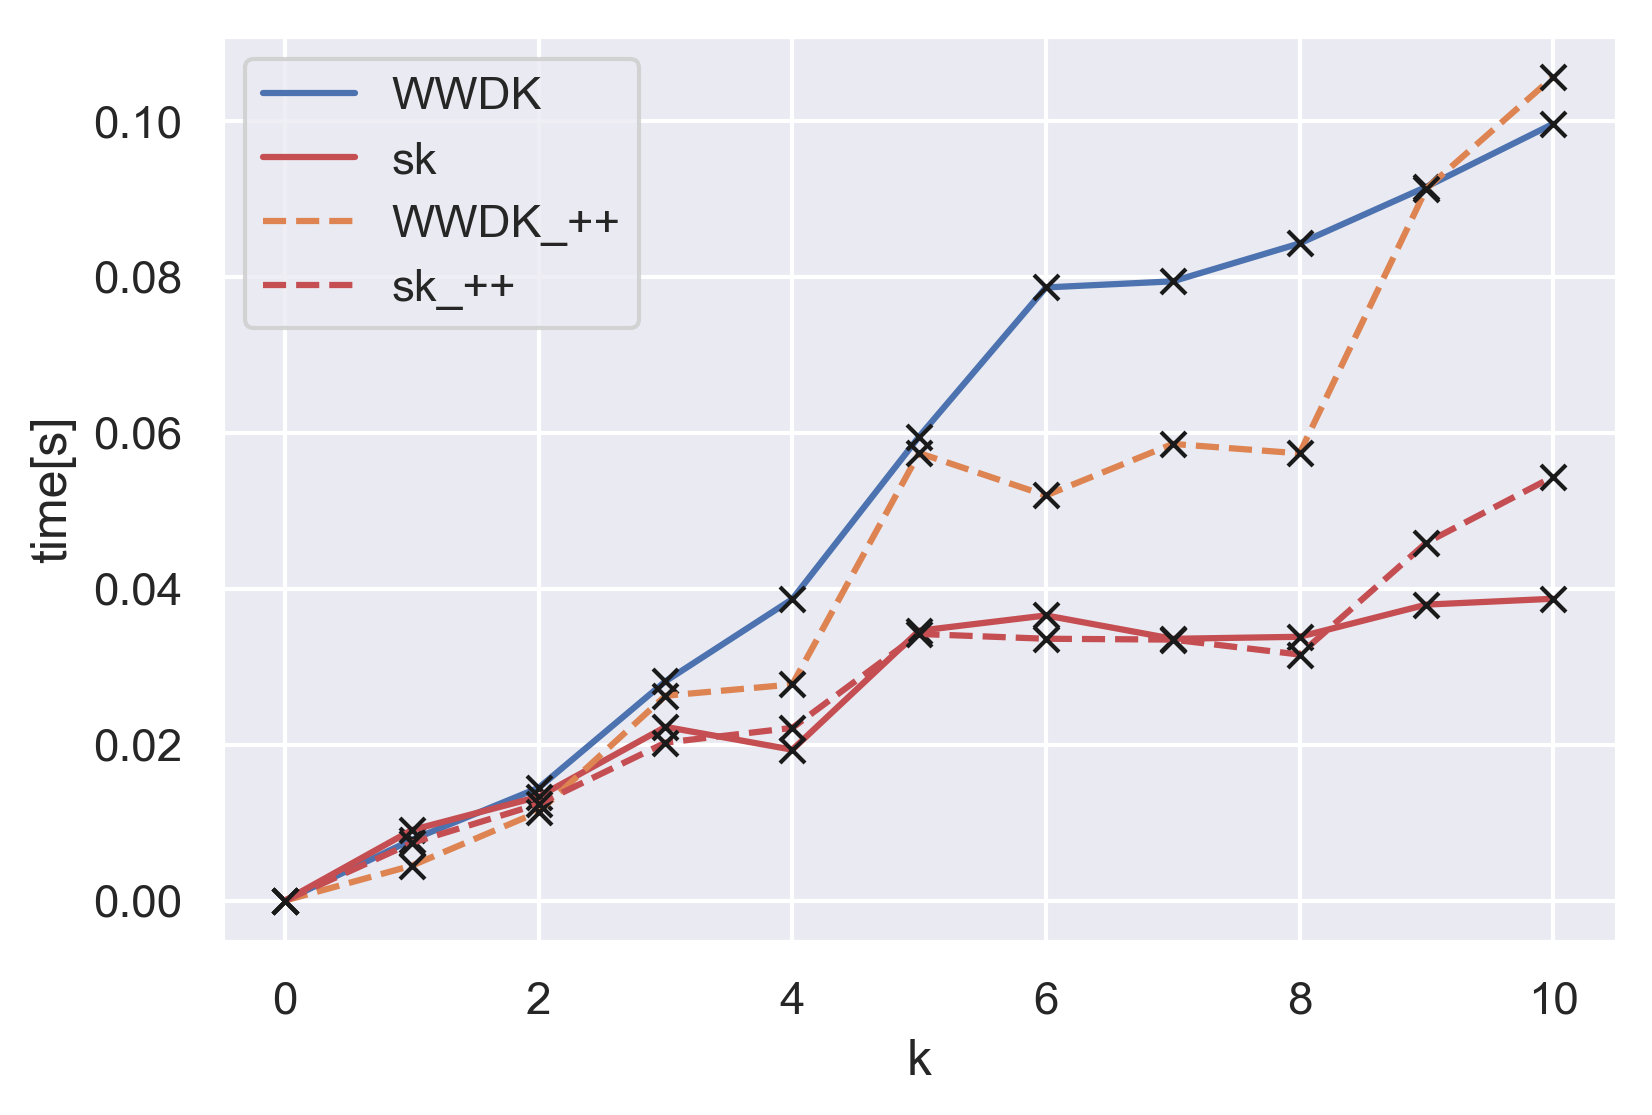

In [10]:
u.time_k_plot(X, iterations=10, runs=10)

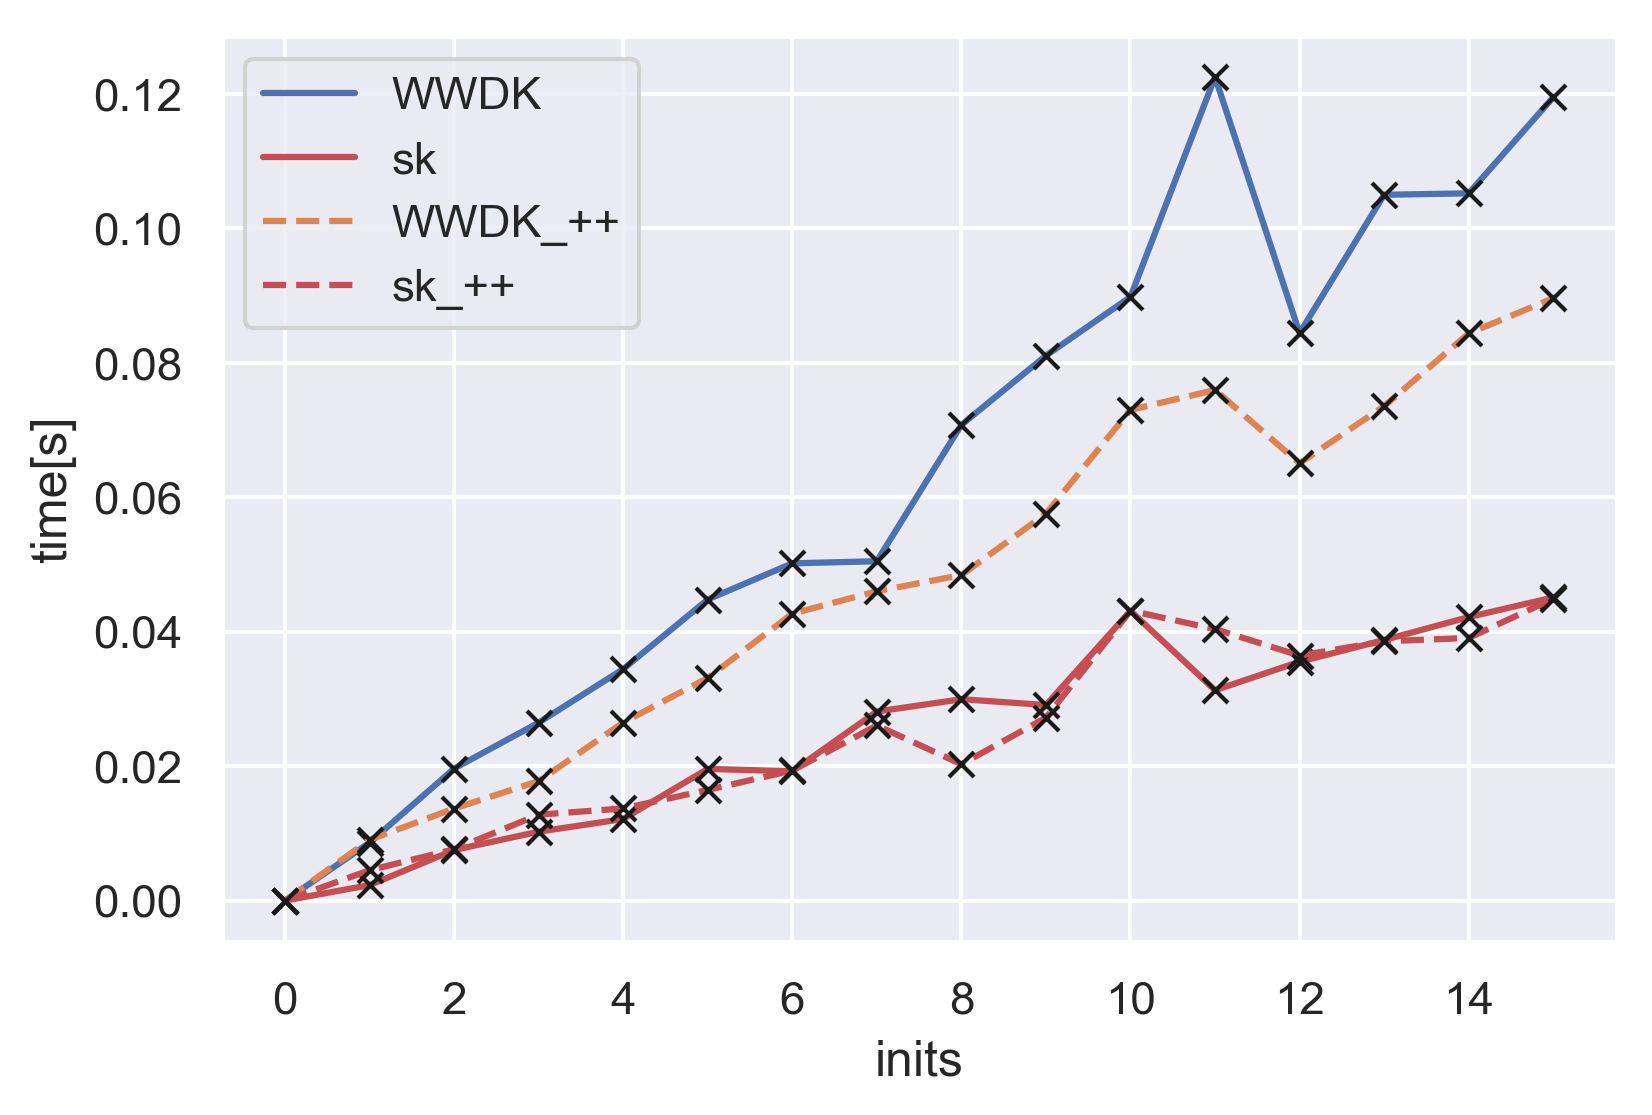

In [11]:
u.time_init_plot(X, iterations=15, runs=10)

The difference between WWDK and sklearn becomes more evident for higher k and inits. Nontheless it is notable that our ++ implementation can be even faster than our vanilla initiation.

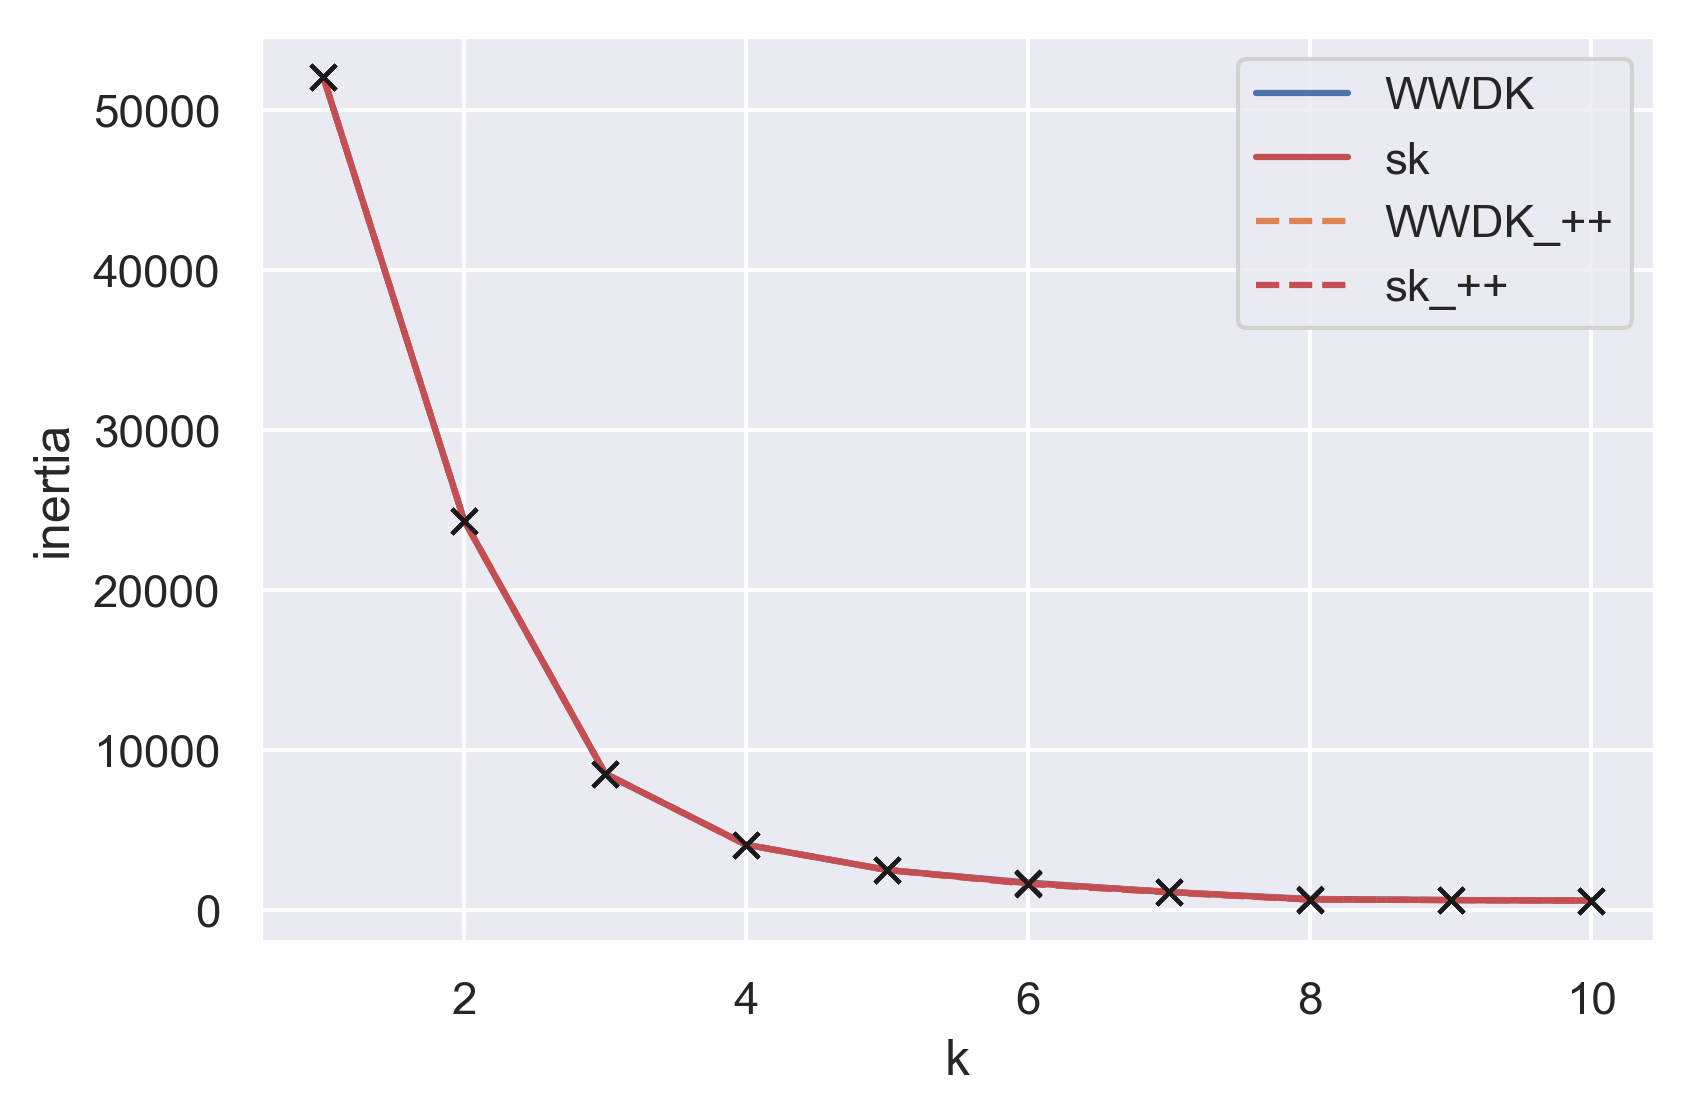

In [12]:
u.inertia_k_plot(X, iterations=10, runs=10) #inertia... Sum of squared distances of samples to their closest cluster center

Slower but WWDK minimises the inertia as well as sklearn without notable difference between ++ and random initiation.

#### Now we test the MiniBatch:

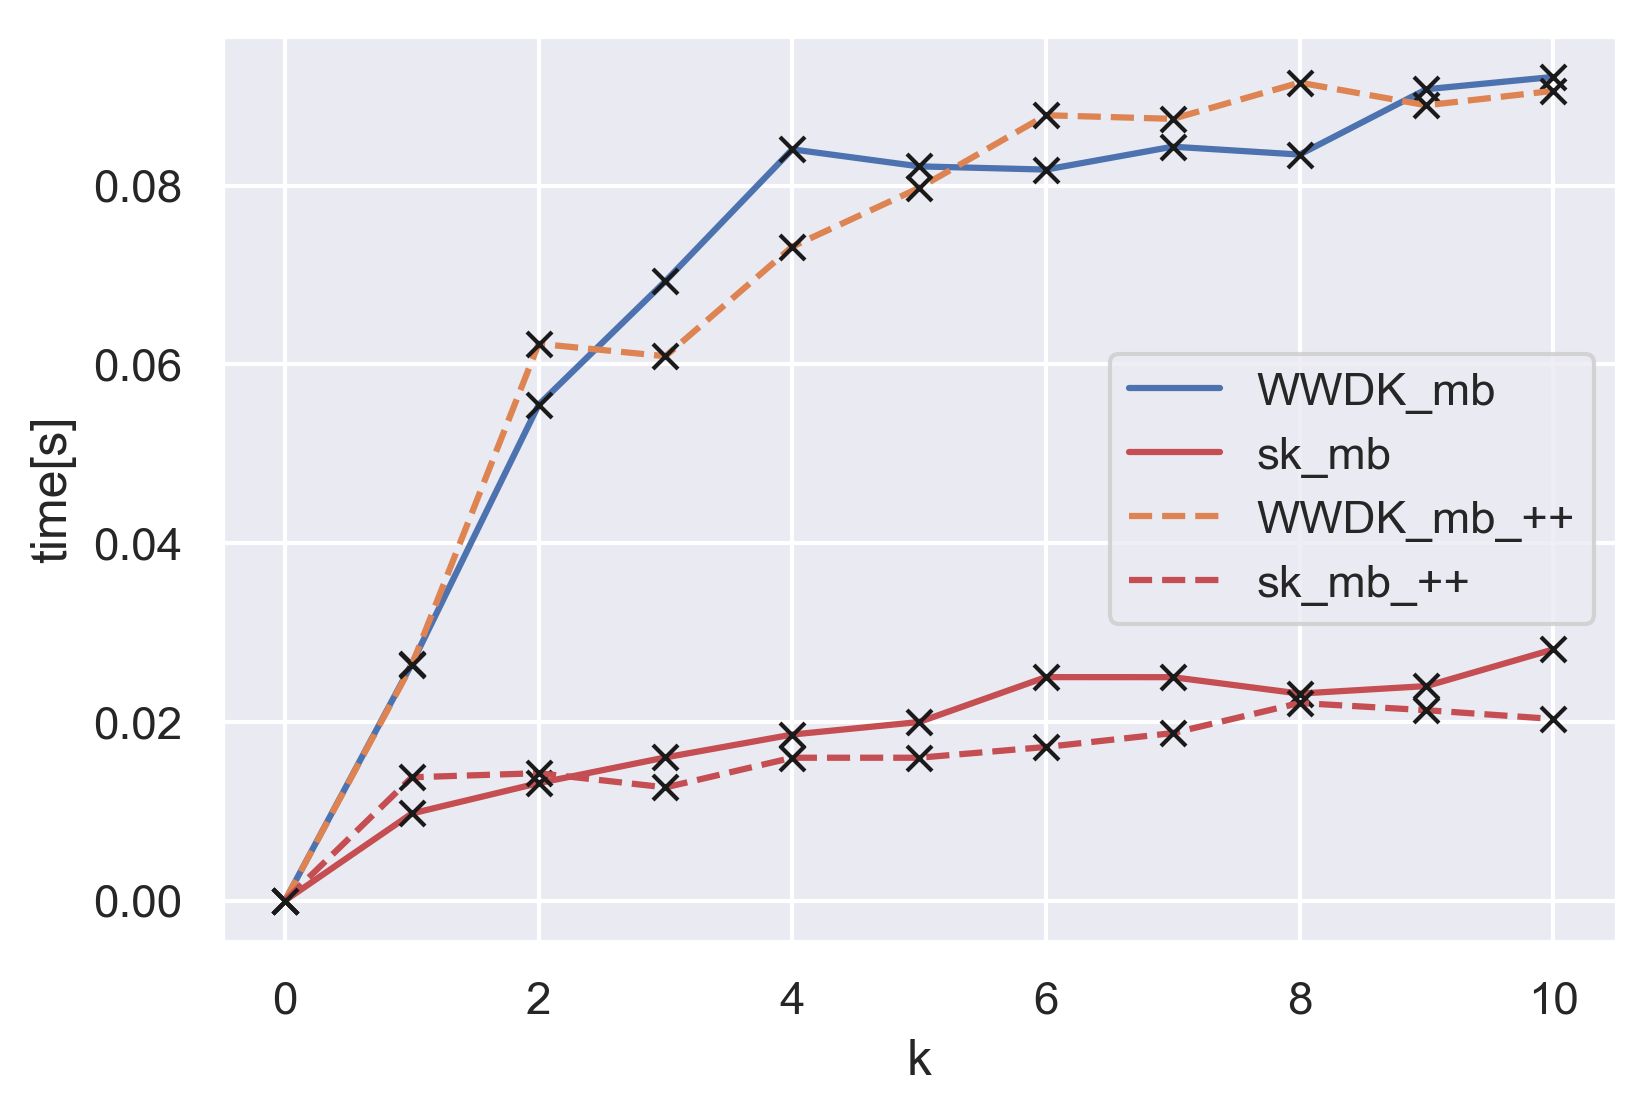

In [13]:
u.time_k_plot_mb(X, iterations=10, runs=10)

The time difference between WWDK and sklearn is more evedient than before, especially for smaller k.

We compare our minibatch against our fullbatch approach:

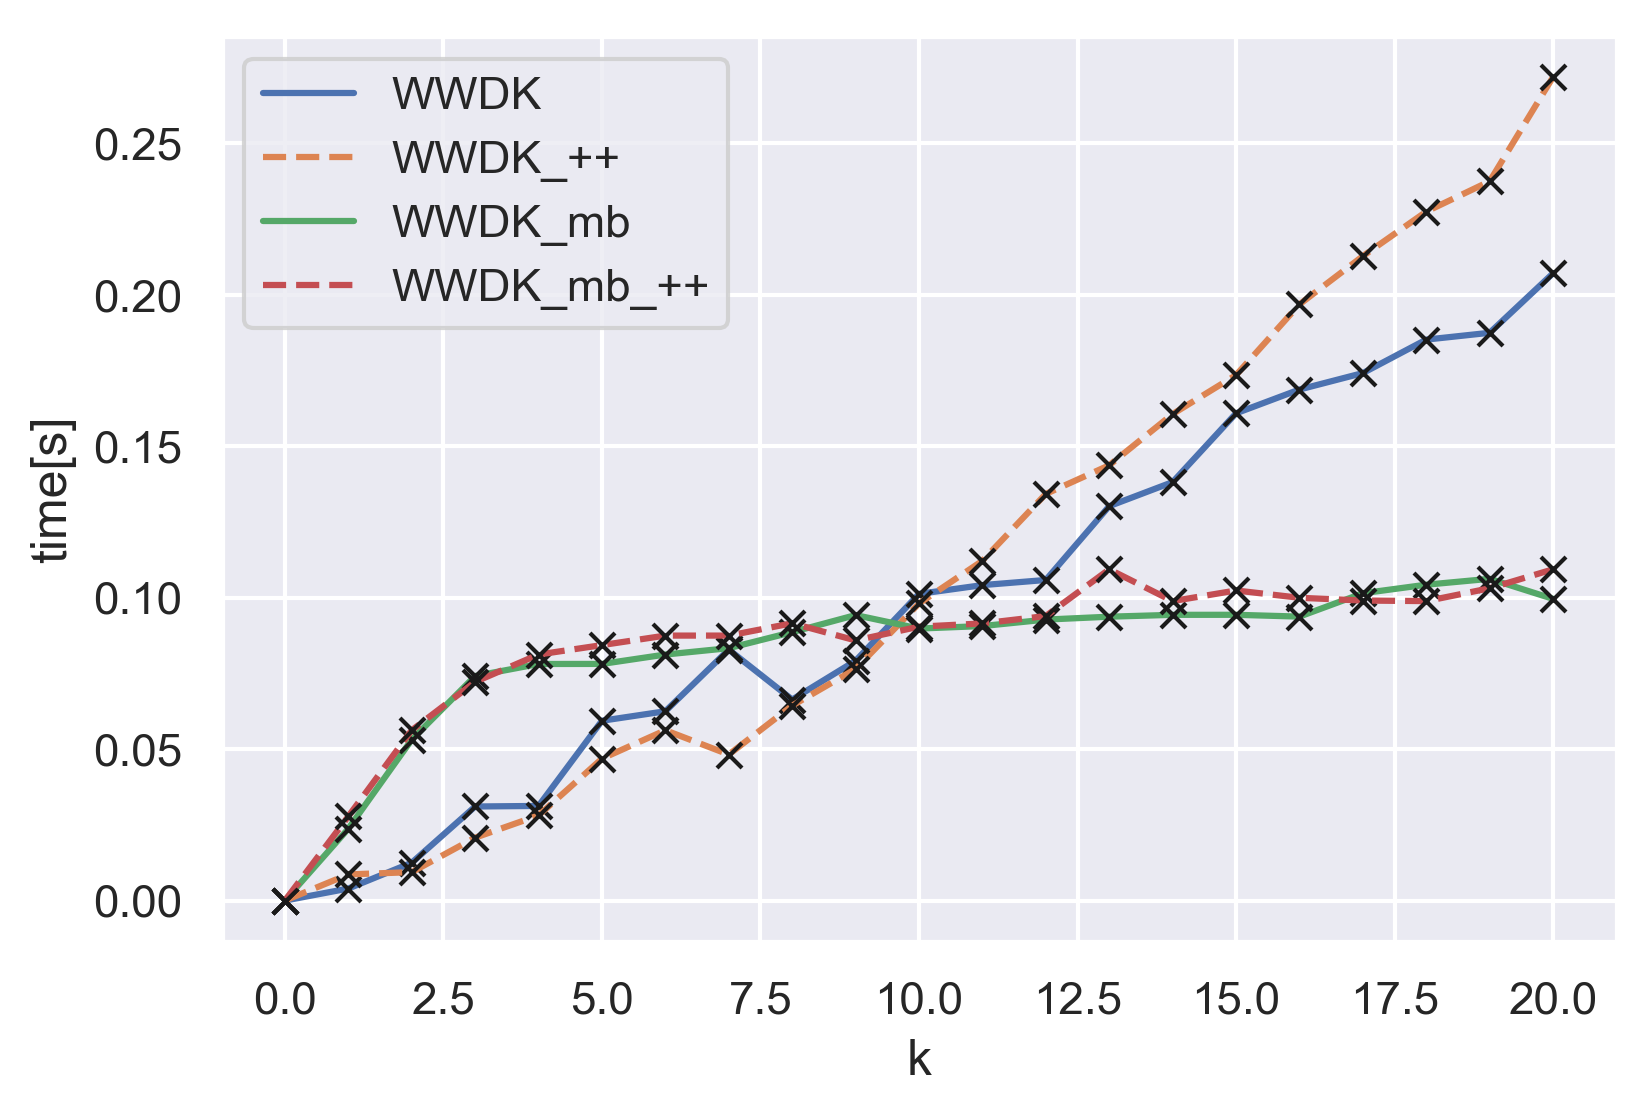

In [14]:
u.time_k_wwdk_compare(X, iterations=20, runs=5, batchsize=100) #another parameter batchsize to increase comparison possibilities

Minibatch only becomes faster for larger k. As minibatch is designed for bigger datasets, we can better see its advantage looking at one:

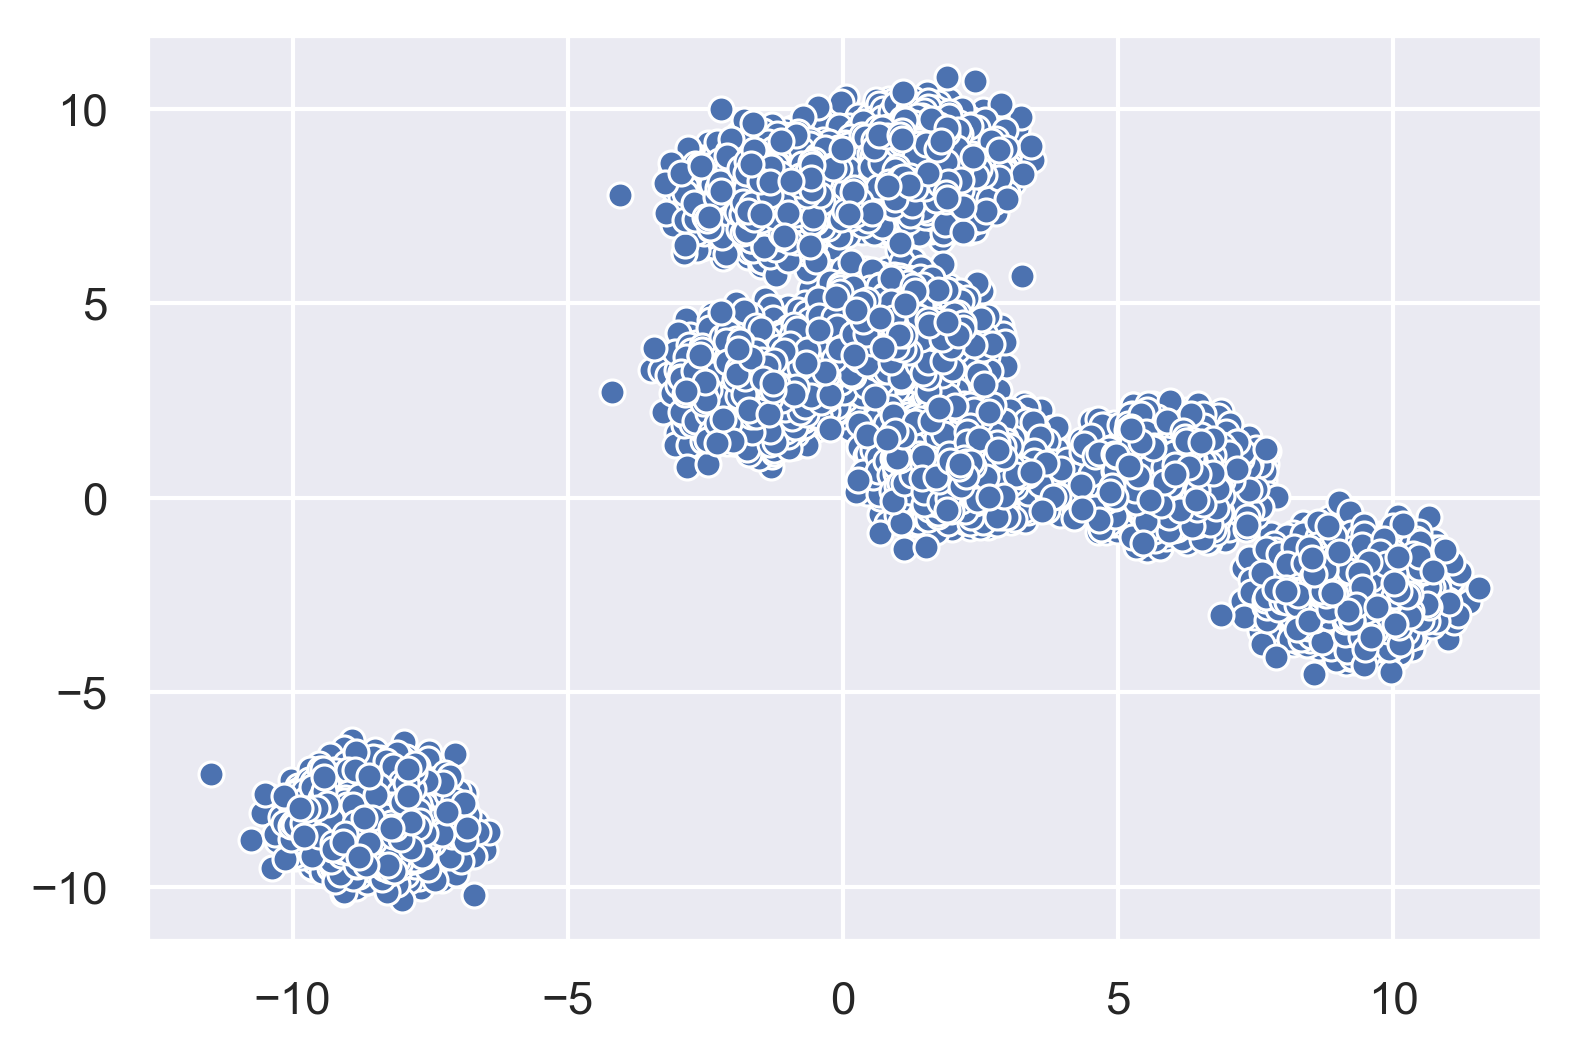

In [15]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X2, y_true = make_blobs(n_samples=30000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X2[:, 0], X2[:, 1]);

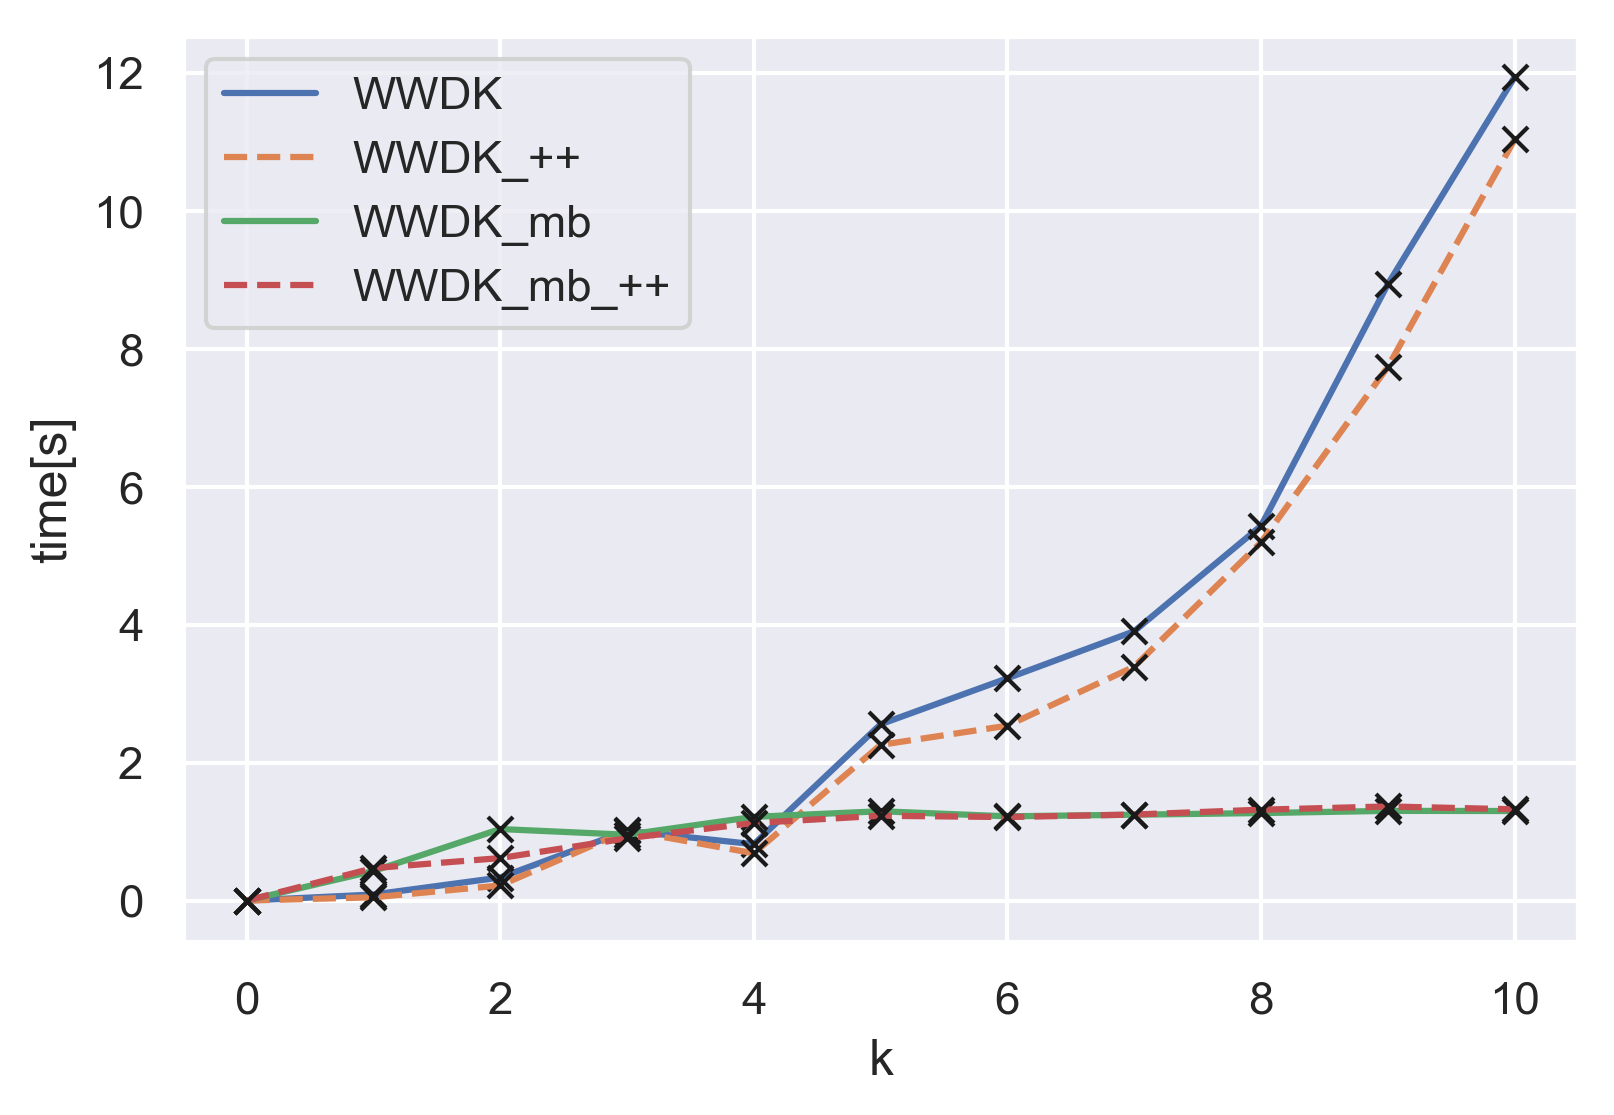

In [16]:
u.time_k_wwdk_compare(X2, iterations=10, runs=5, batchsize=100)

Instead of 1000 we now look at 30000 datapoints. Here it becomes evident why Minibatch is useful.

### Limitations of kmeans - why to look at the assumptions

Next we look at a datset with a more difficult geometric shape

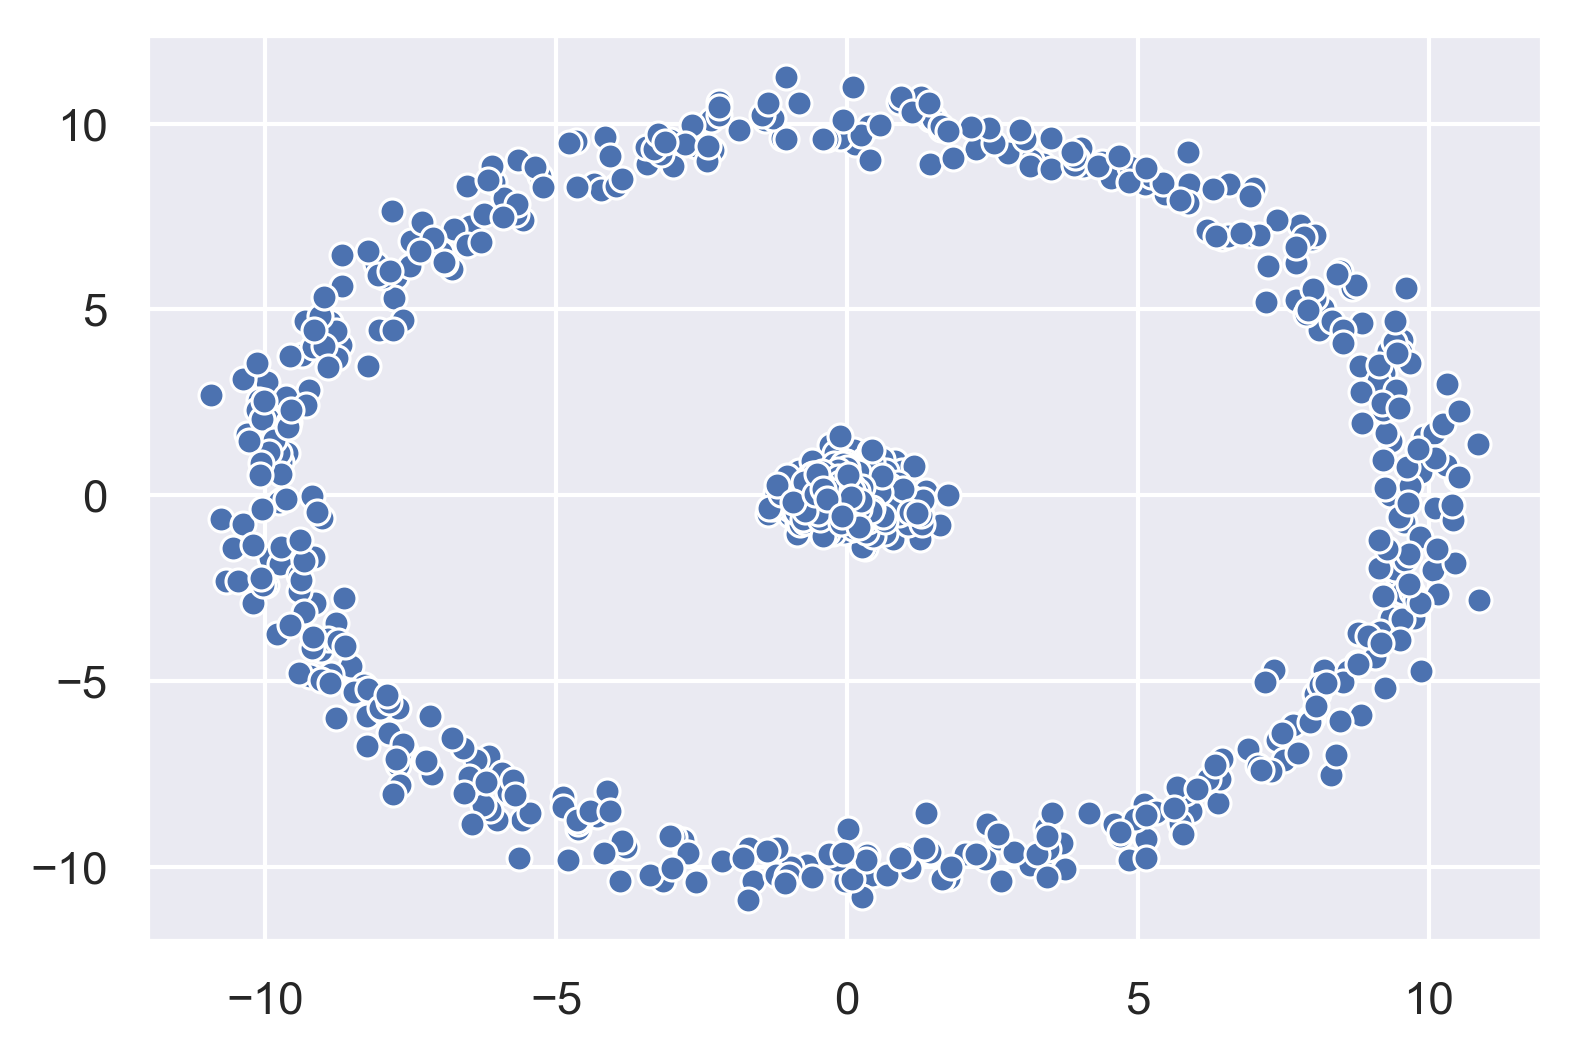

In [17]:
from sklearn import datasets
my_tuple = x, y_true = datasets.make_circles(n_samples=1000, factor=0,
                                      noise=.05)
x= x*10
sns.scatterplot(x[:, 0], x[:, 1]);

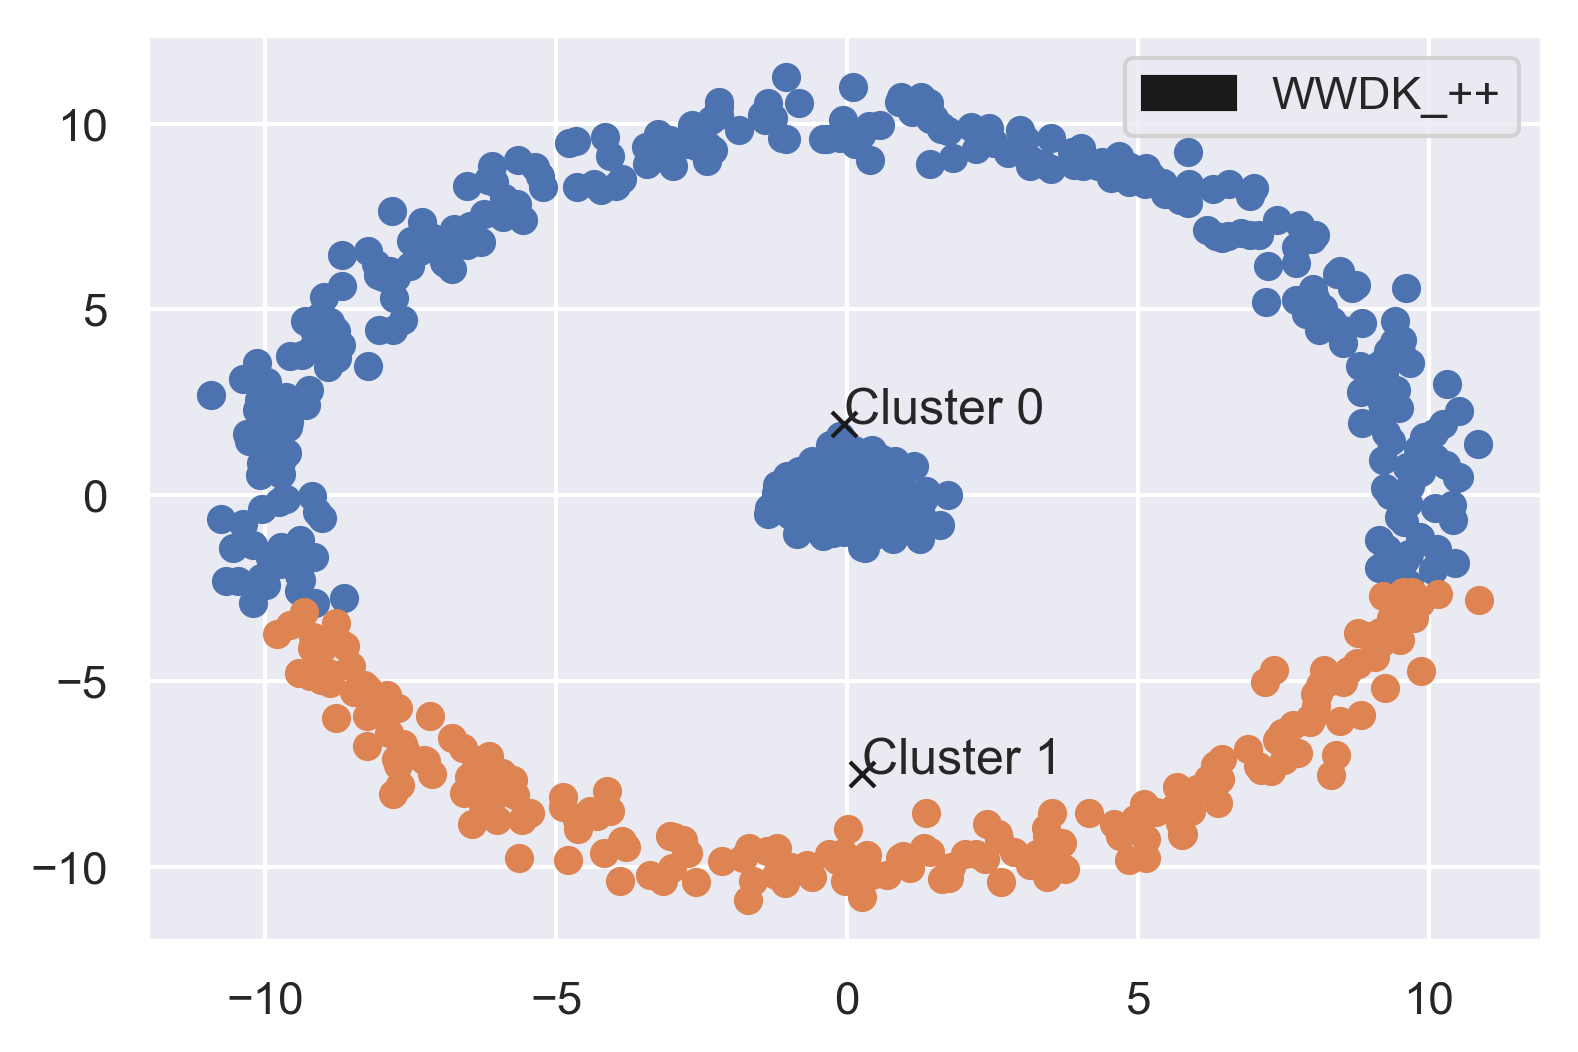

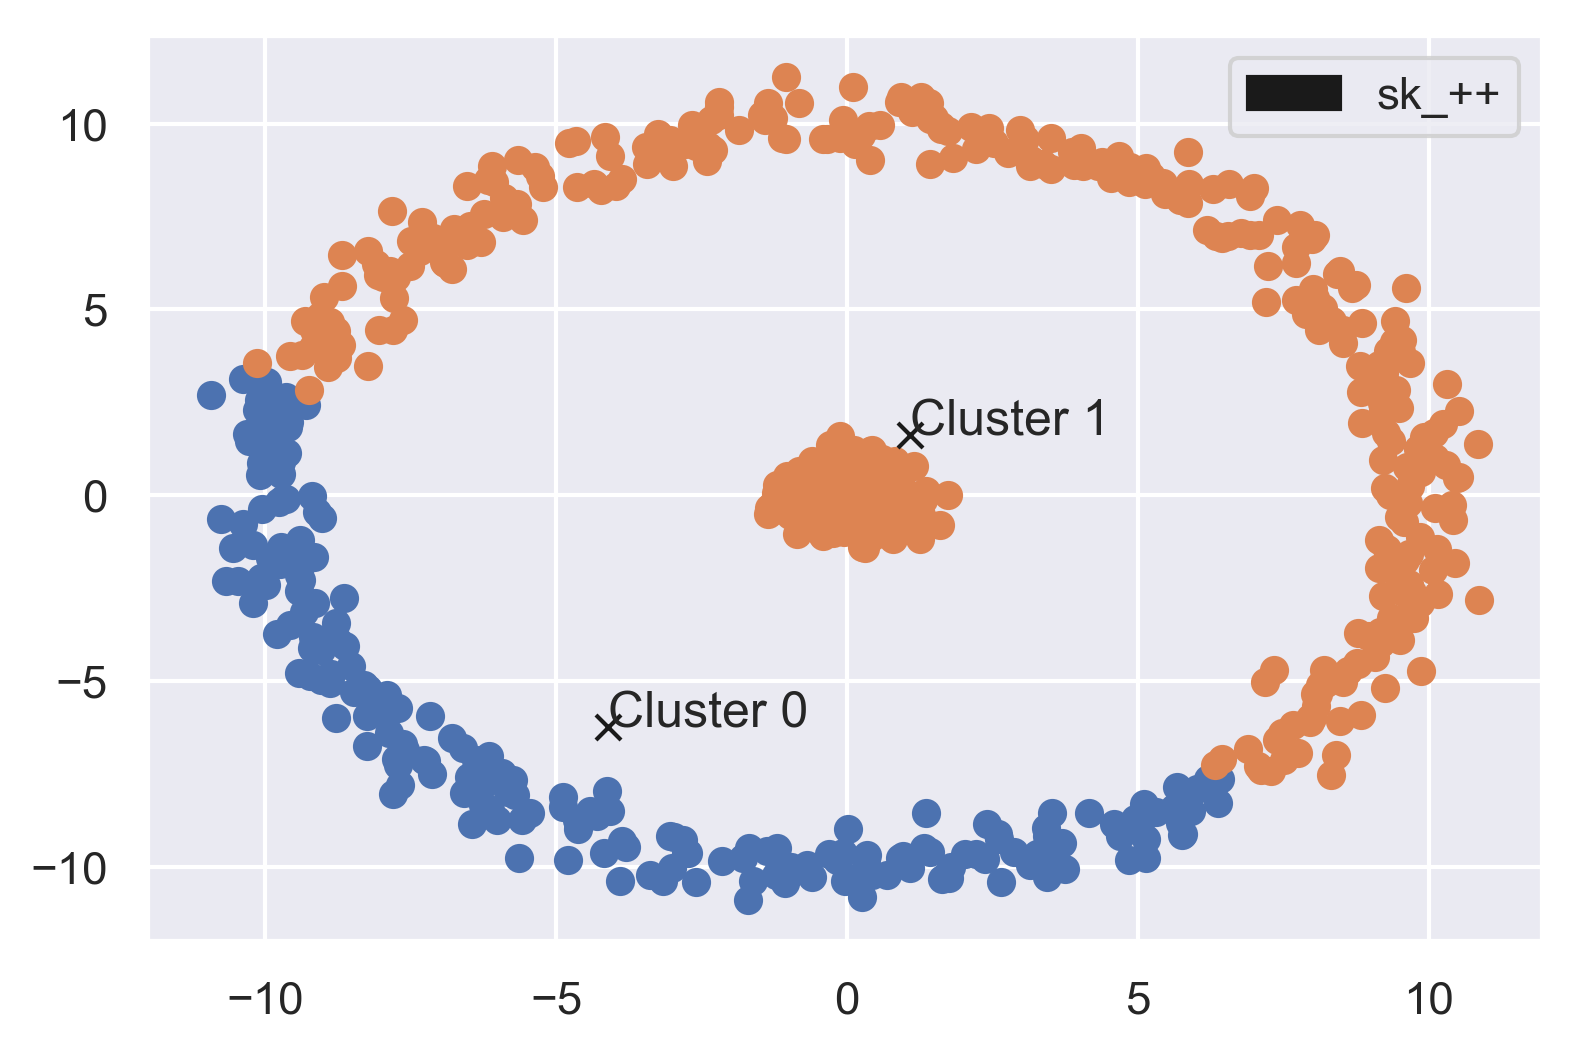

In [18]:
wwdk1 = cl.Kmeans(inits=10, method="rng", k=2)
x1 = wwdk1.fit(x)
sk1 = sk.KMeans(n_init=10, init="random", n_clusters=2)
x2 = sk1.fit(x)

u.plot_compare(x, wwdk1.labels_, wwdk1.cluster_centers_, 2, title="WWDK_++")
u.plot_compare(x, sk1.labels_, sk1.cluster_centers_, 2, title="sk_++")

The algorithms still minimize the within square distance perfectly fine and thereby find clusters. But the minimization assumes spheric clusters. For non-spherical clusters we can either use other algorithms or in some cases (if we know what kind of clusters to expect) we can transform our data beforehand. In this case we can run the algorithms on polar cooridnates instead.


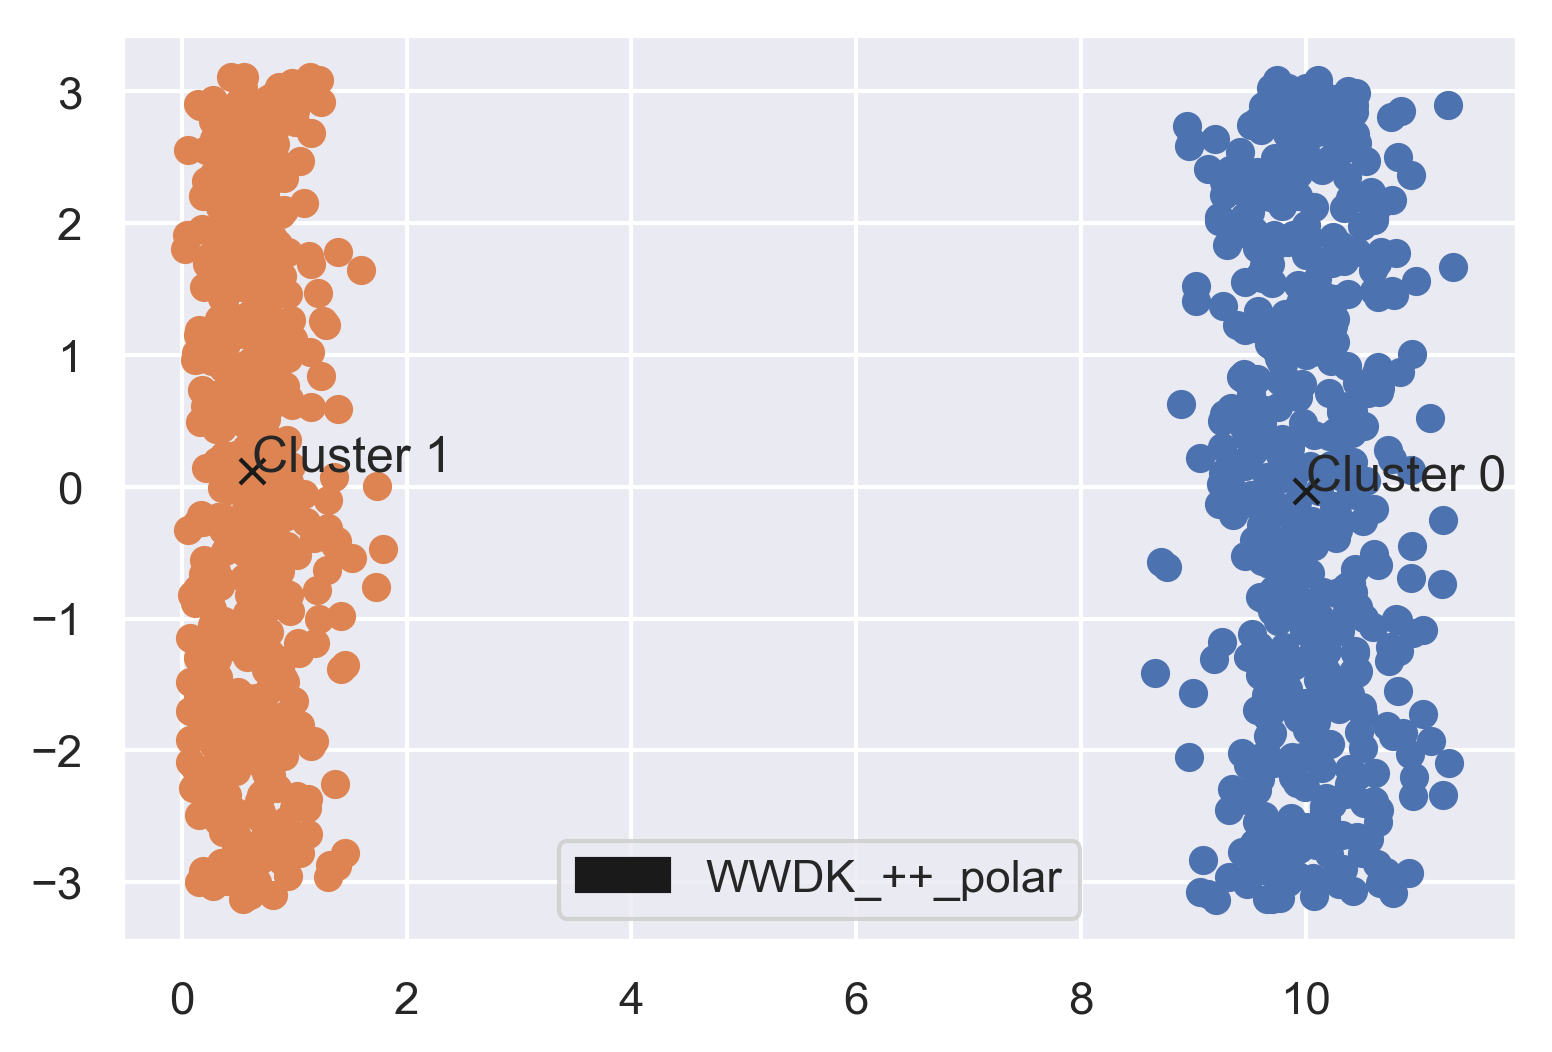

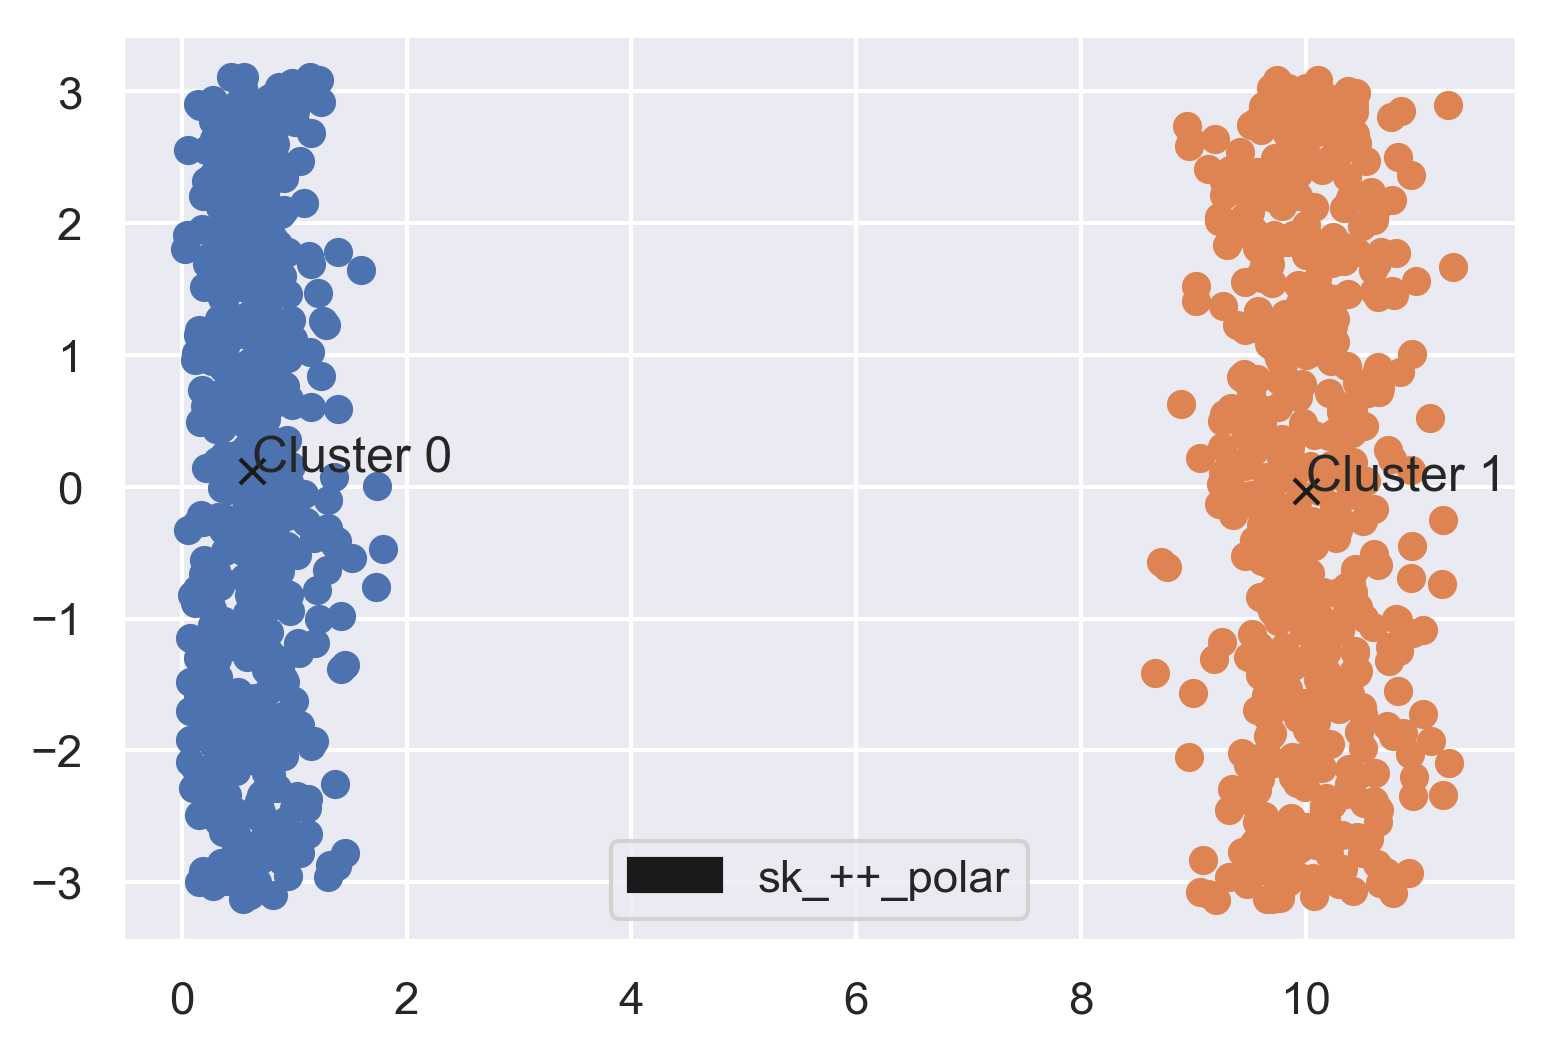

In [19]:
import numpy as np
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) 
    phi = np.arctan2(y, x)
    points = np.column_stack((rho,phi))
    return (points)
    #return ([rho,phi])

pol = cart2pol(x[:, 0], x[:, 1])

wwdk2 = cl.Kmeans(k=2)
x1 = wwdk2.fit(pol)
sk2 = sk.KMeans(n_clusters=2)
x2 = sk2.fit(pol)

u.plot_compare(pol, wwdk2.labels_, wwdk2.cluster_centers_, 2, title="WWDK_++_polar")
u.plot_compare(pol, sk2.labels_, sk2.cluster_centers_, 2, title="sk_++_polar")


Now we can use this labels to plot the cartesian data. Of course for a correct display the centers would need to be transformed back to cartesian coordinates, too (was not done here because they hold no useful information as cartesian).

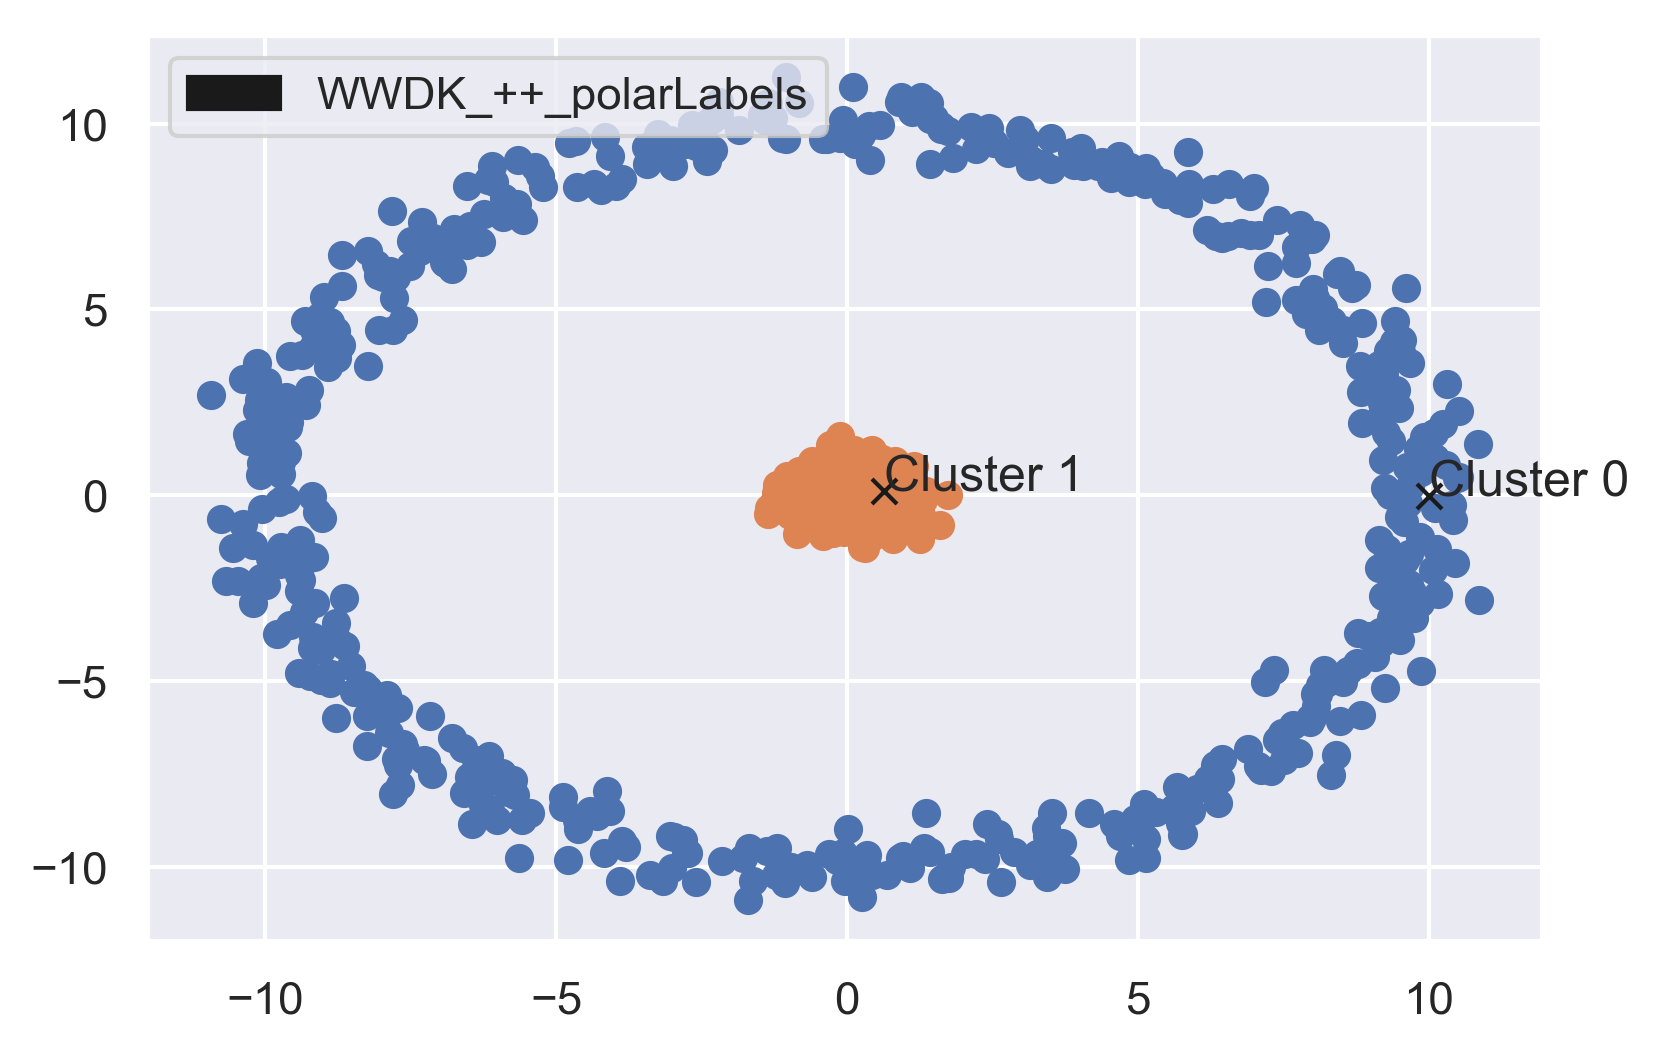

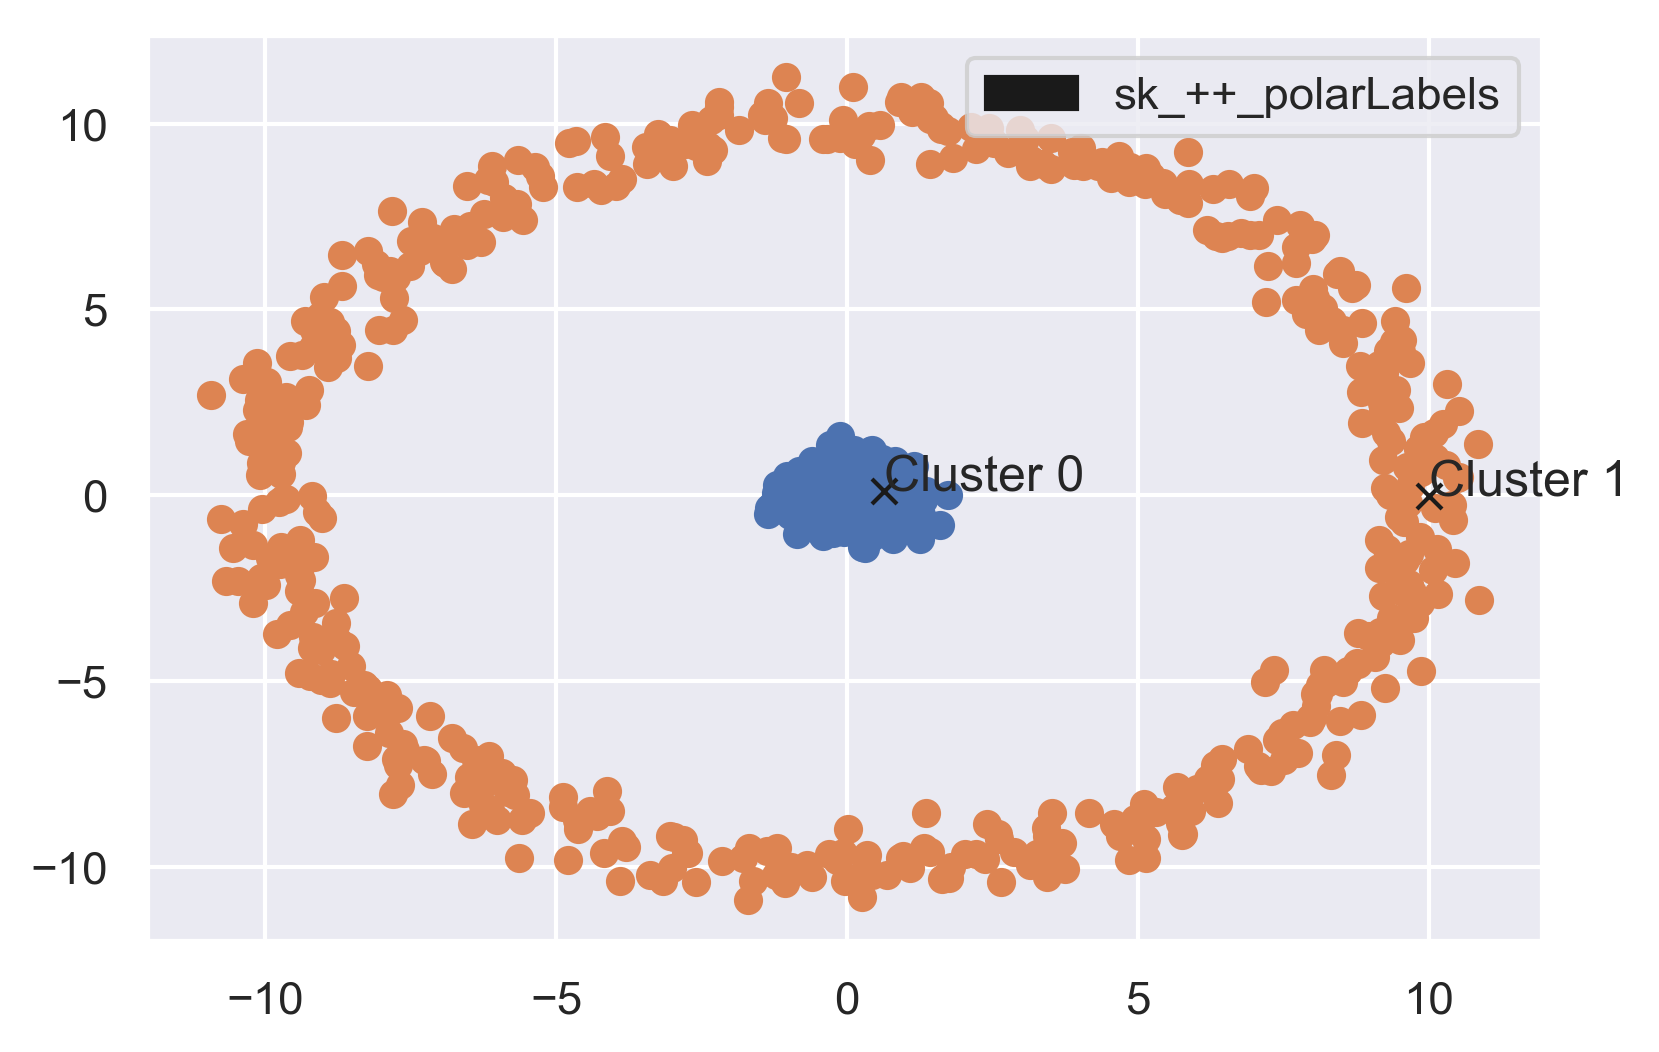

In [20]:
u.plot_compare(x, wwdk2.labels_, wwdk2.cluster_centers_, 2, title = "WWDK_++_polarLabels")
u.plot_compare(x, sk2.labels_, sk2.cluster_centers_, 2, title = "sk_++_polarLabels")

<b> By taking the assumptions, our algorithm makes, into consideration we can avoid and fix some of its drawbacks.

## Pokemon Dataset

In the next step we wanted to analyze a pokemon dataset. This represents an easy to understand and relatively small dataset to test our clustering.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pkmn = pd.read_csv('Pokemon/pokemon.csv', index_col=0)
pkmn.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

As one can see Pokemon all have a type and differ in stats of HP, Attack, Special Attack, Defense, Special Defense and Speed. We dropped Generation and Legendary status as we only wanted to see if we can see how Pokemon compare in these stats.

In [45]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

red_pkmn = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
pkmn_array = np.array(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])

### Without Dimensional Reduction

First we took a look at the dataset without any preprocessing at all. This was to test how our Kmeans handles multidimensional data and to see the difference between using dimensional reduction and not using it

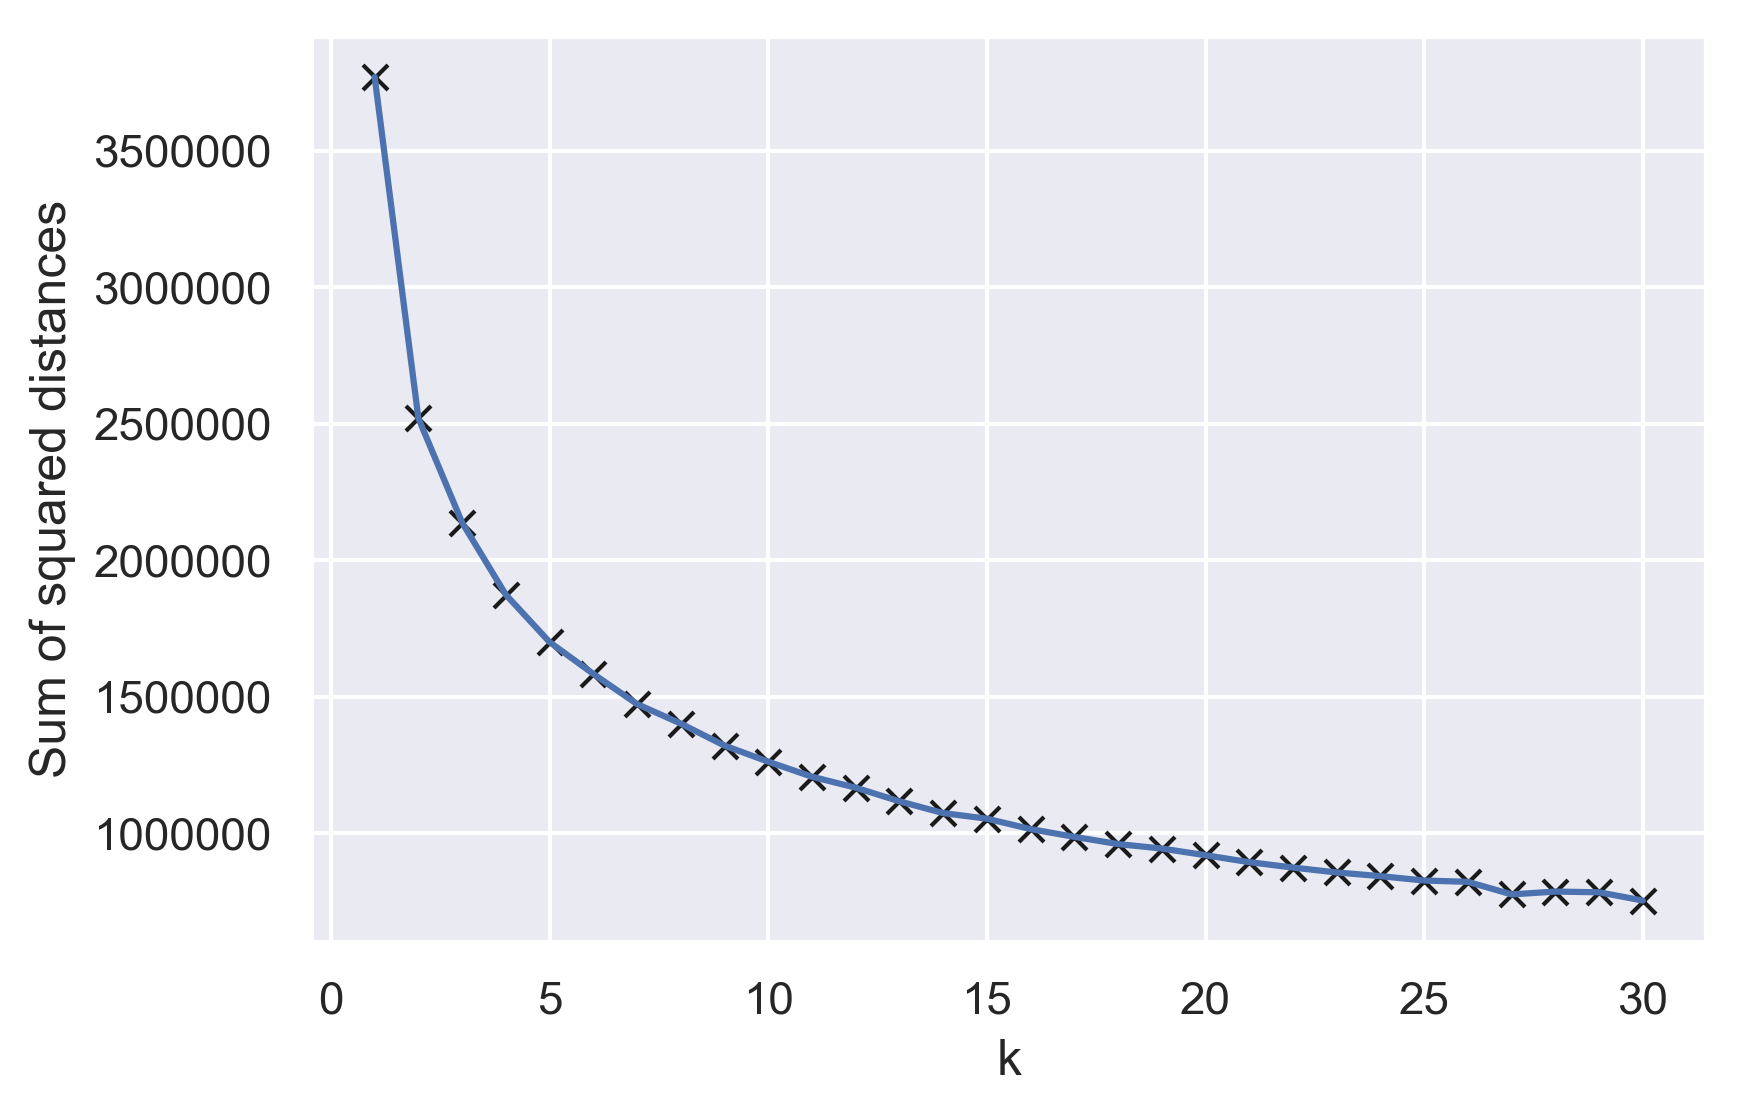

In [46]:
u.elbow_plot(pkmn_array,30)

We decided to choose 10 centroids based on the elbow plot

In [47]:
kmeans_without_dr = cl.Kmeans(k=10)
kmeans_without_dr.fit(pkmn_array)

Kmeans(inits=10, k=10, maxit=300, method='++', tol=0.001)

To further compare the data we used the result from the clustering and used cluster labels as an index for the dataset. Then we sorted the pokemon by cluster and calculated the mean of each cluster to see what kind of strengths and weaknesses each Cluster has.

In [48]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmeans_without_dr.labels_

In [49]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)

pkmn_final.set_index("Cluster").sort_values(by="Total")


Total         HP      Attack     Defense     Sp. Atk  \
Cluster                                                              
0.0      259.011236  53.078652   37.471910   41.808989   39.764045   
3.0      336.785714  55.317460   63.730159   46.071429   56.626984   
9.0      347.532110  59.311927   69.577982   75.779817   47.128440   
7.0      422.745763  65.067797   49.728814   56.254237   86.118644   
4.0      484.087912  72.956044   87.384615   66.978022   84.318681   
2.0      492.233333  81.422222   75.788889   85.900000   97.566667   
5.0      509.268293  76.658537  107.170732  141.512195   62.097561   
8.0      514.211765  82.882353  121.141176   85.529412   62.929412   
6.0      527.391304  65.130435   68.043478  137.217391   67.608696   
1.0      628.747126  89.149425  118.264368   90.977011  131.724138   

            Sp. Def       Speed  
Cluster                          
0.0       46.471910   40.415730  
3.0       48.309524   66.730159  
9.0       56.266055   39.467890  
7.0       84.864407   80.711864  
4.0       70.340659  102.109890  
2.0       93.600000   57.955556  
5.0       70.170732   51.658537  
8.0       79.800000   81.929412  
6.0      138.695652   50.695652  
1.0       97.517241  101.114943

One can see that Pokemon vary strongly between clusters when using the not dimensional reduced data. Cluster 1 contains pokemon with overall highest total. If you have a closer look you will find megaevolutions and powerful pokemon like Mewtwo in this cluster. 

In [50]:
pkmn_red[pkmn_red.Cluster == 1 ].head()

Name  Type 1  Type 2  Total  HP  Attack  Defense  \
#                                                                           
3       VenusaurMega Venusaur   Grass  Poison    625  80     100      123   
6   CharizardMega Charizard X    Fire  Dragon    634  78     130      111   
6   CharizardMega Charizard Y    Fire  Flying    634  78     104       78   
9     BlastoiseMega Blastoise   Water     NaN    630  79     103      120   
18        PidgeotMega Pidgeot  Normal  Flying    579  83      80       80   

    Sp. Atk  Sp. Def  Speed  Cluster  
#                                     
3       122      120     80        1  
6       130       85    100        1  
6       159      115    100        1  
9       135      115     78        1  
18      135       80    121        1

In [51]:
pkmn_red[pkmn_red.Cluster == 0 ].head()

Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
10  Caterpie     Bug     NaN    195  45      30       35       20       20   
11   Metapod     Bug     NaN    205  50      20       55       25       25   
13    Weedle     Bug  Poison    195  40      35       30       20       20   
14    Kakuna     Bug  Poison    205  45      25       50       25       25   
16    Pidgey  Normal  Flying    251  40      45       40       35       35   

    Speed  Cluster  
#                   
10     45        0  
11     30        0  
13     50        0  
14     35        0  
16     56        0

Looking in cluster 0, one can find a lot of pokemons that have not evolved yet and are therefore are not strong. They all share a relatively small total.

### With TSNE

Now we used dimensional reduction method to see if it yields different results. First the dataset was normalized and then scaled using the inbuilt sklearn preprocessing functions

In [52]:
norm_pkmn = preprocessing.normalize(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm_pkmn)

TSNE was performend tu reduce dimensions to two

In [53]:
pure_sne = TSNE()
pkmn_pure_sned = pure_sne.fit_transform(scaled)

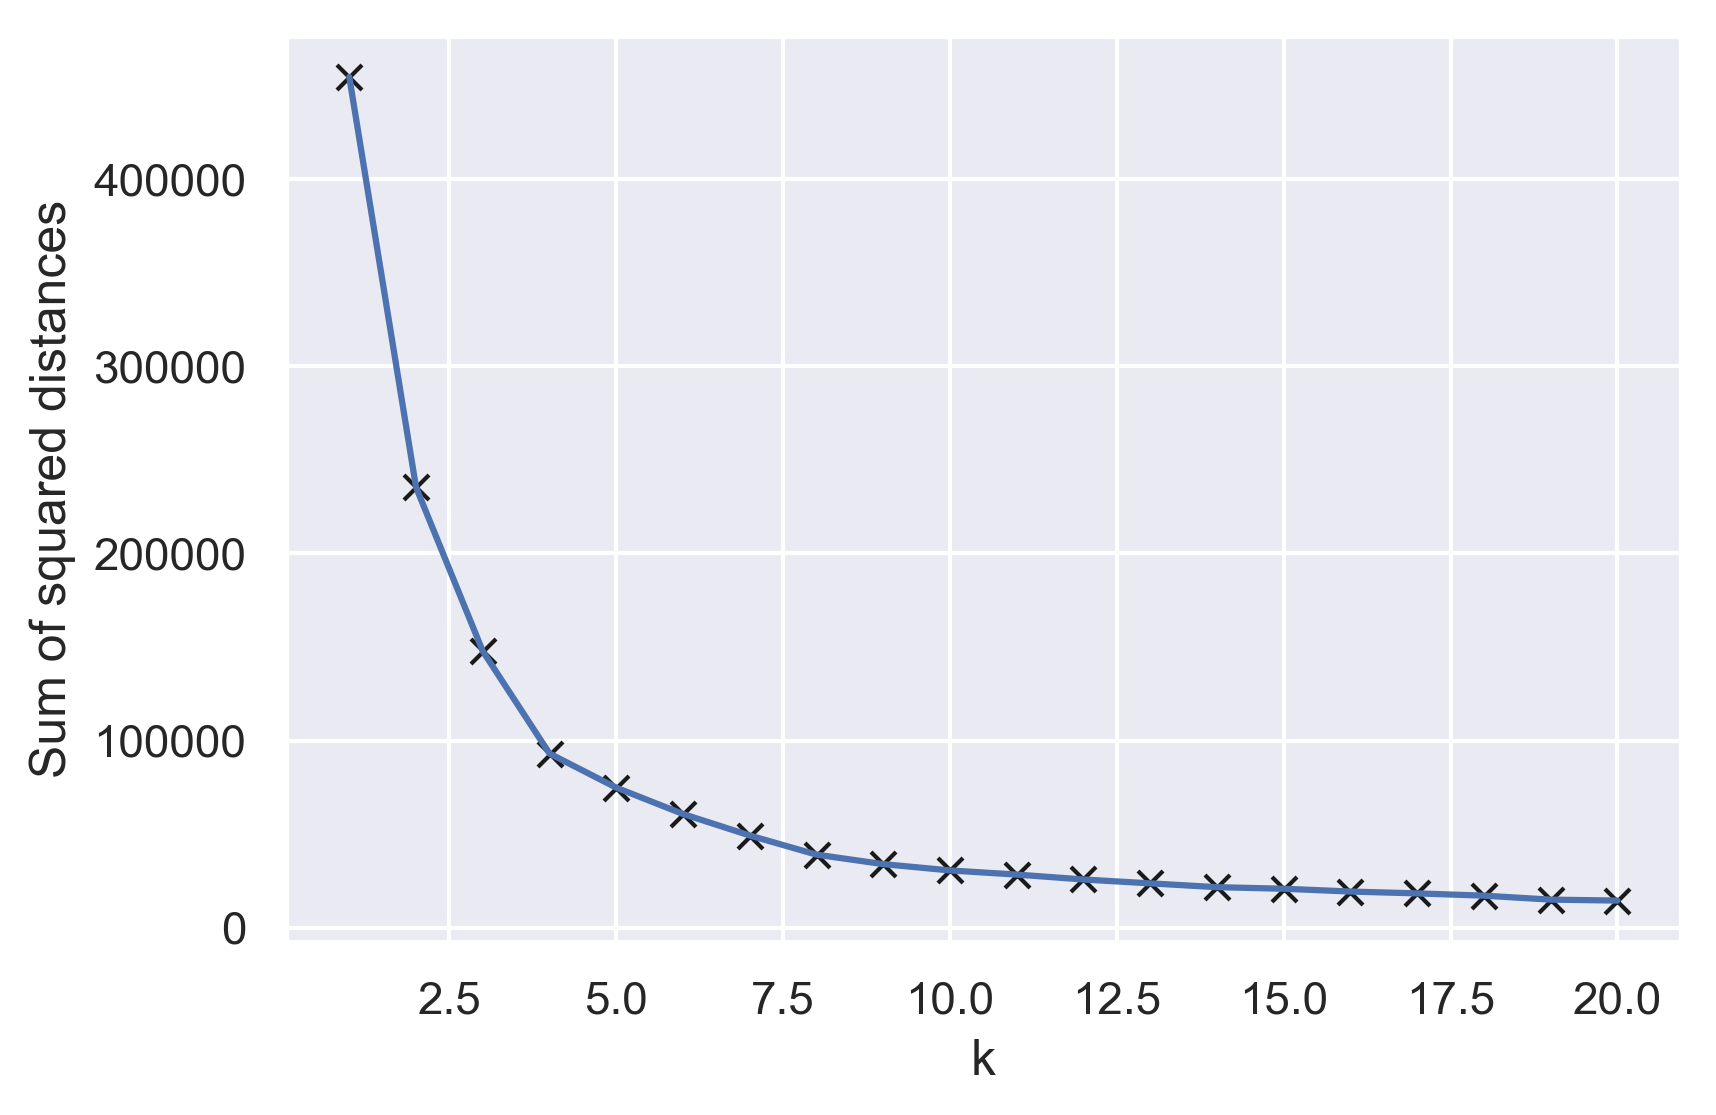

In [54]:
u.elbow_plot(pkmn_pure_sned, 20)

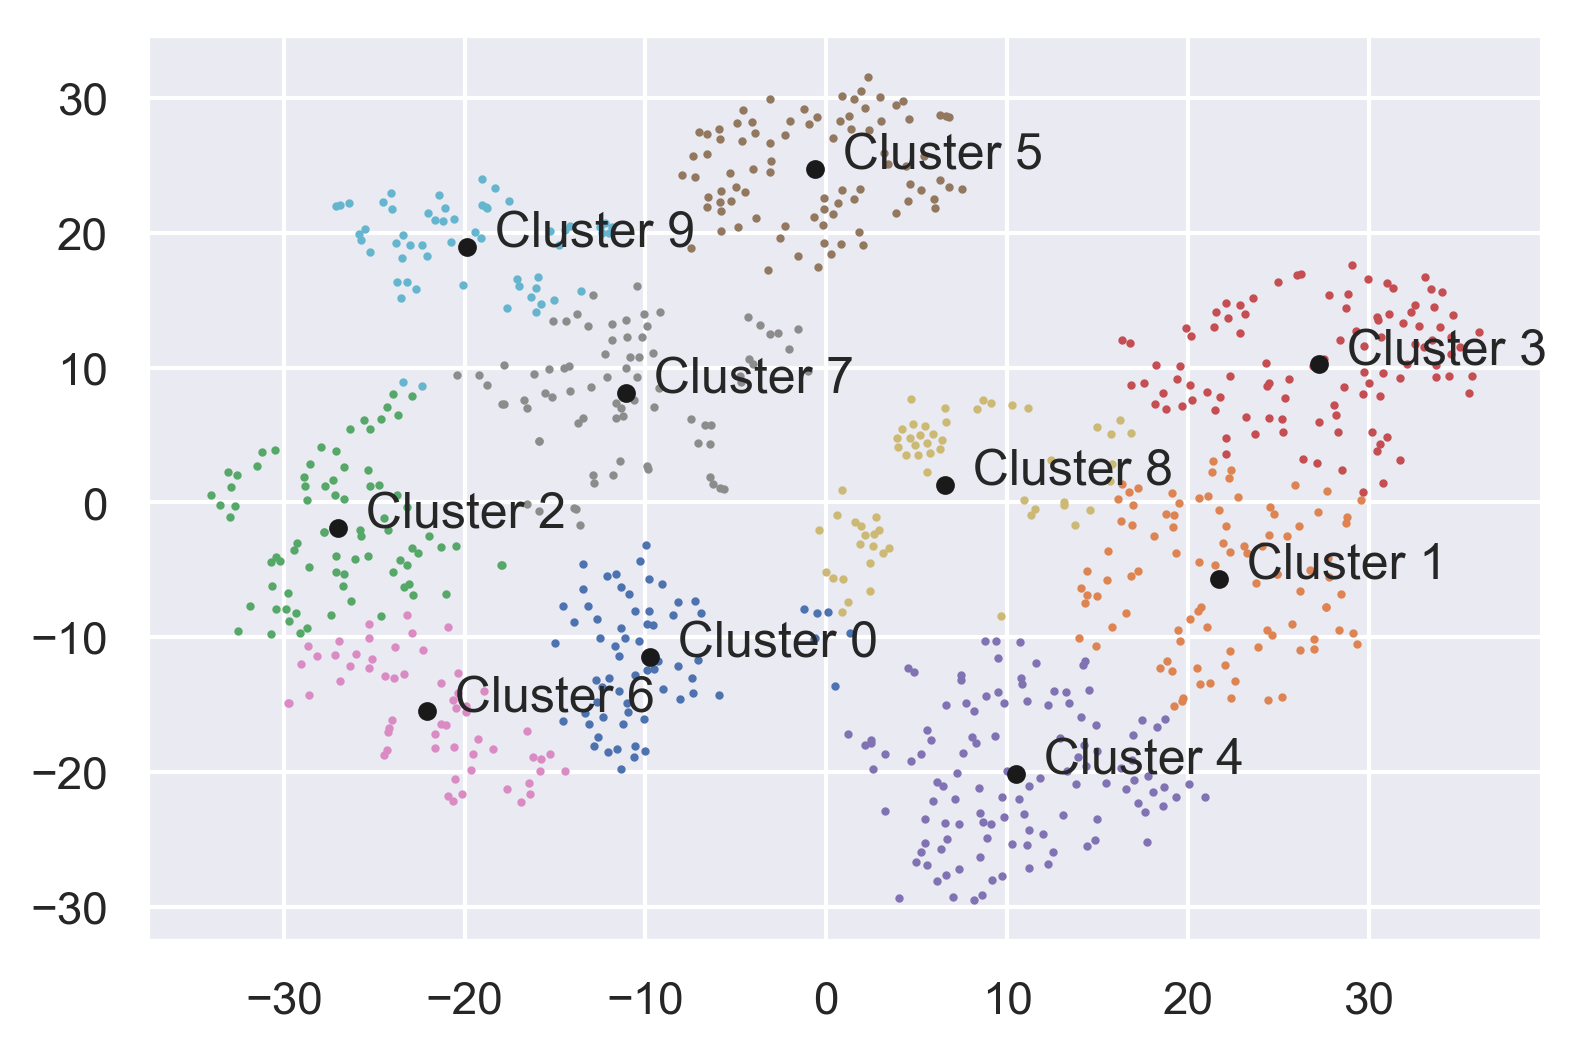

In [55]:
kmean_with_dr = cl.Kmeans(k = 10)
kmean_with_dr.fit(pkmn_pure_sned)
u.plot(kmean_with_dr)

One can see clearly the different clusters in the plot. When we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together.

In [56]:
types = np.array(red_pkmn["Type 1"].drop_duplicates())
type_list = np.array(red_pkmn["Type 1"])
tsned_with_type =pd.DataFrame(pkmn_pure_sned)
tsned_with_type["Type"] = type_list

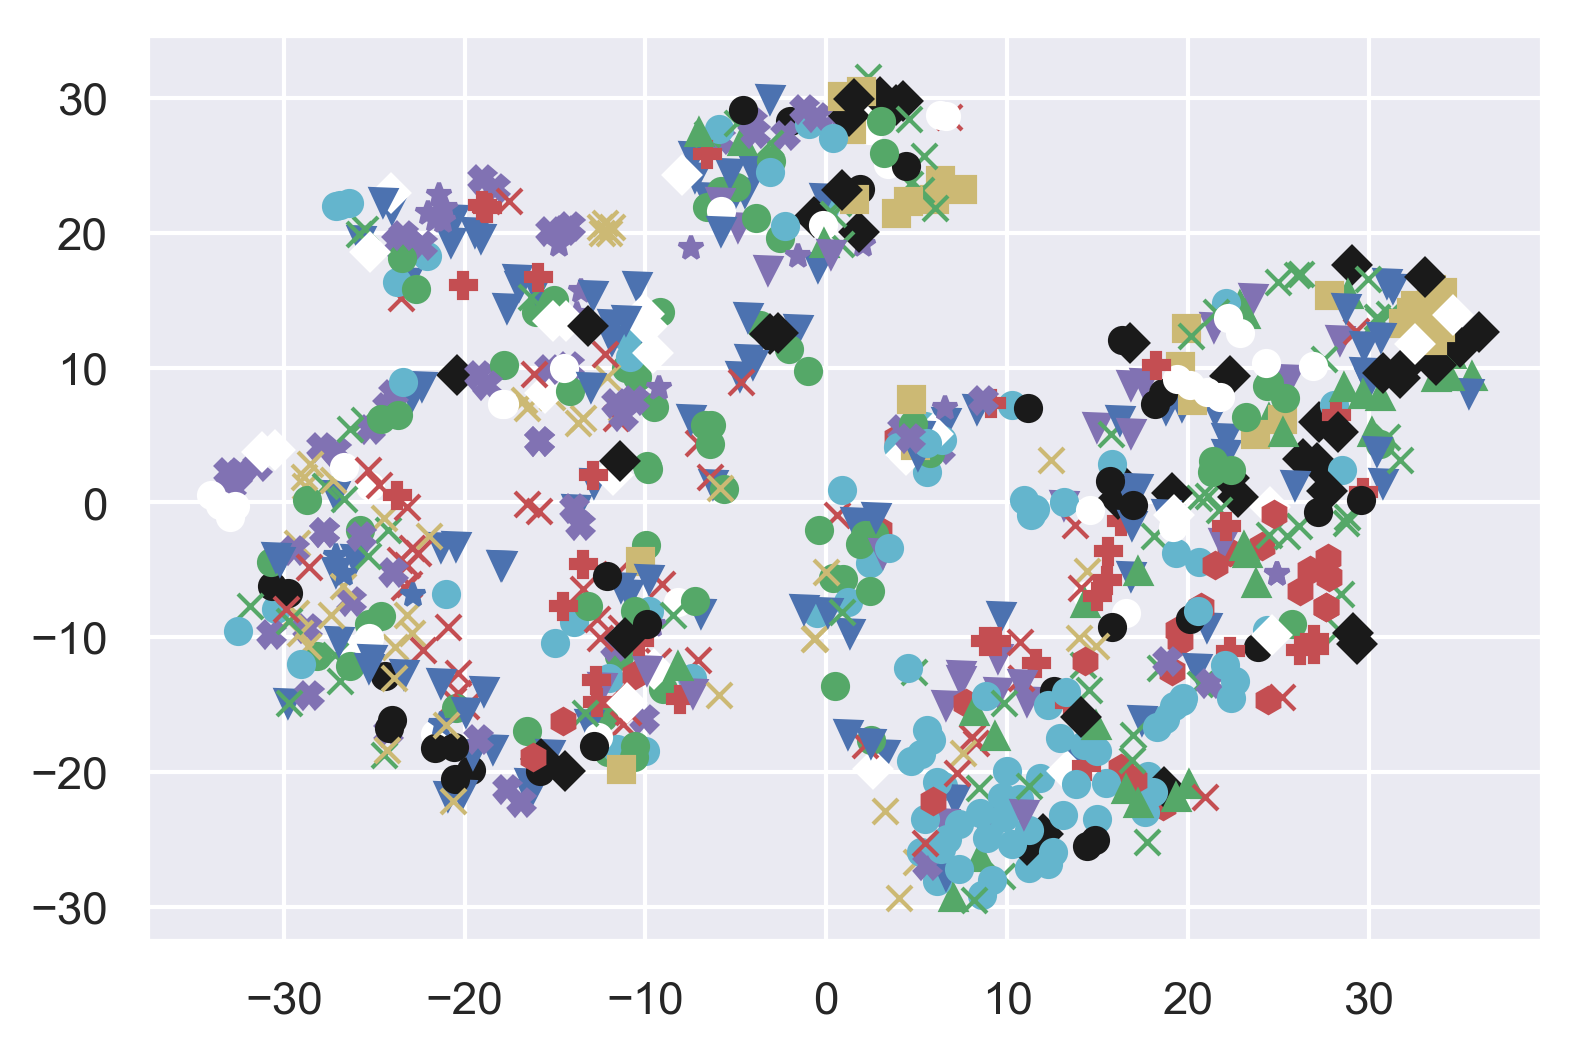

In [57]:
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)
plt.show()

When we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together. Normal type pokemon seem to be all in Cluster 4 (blue dots) and ground pokemon seem to be mainly in cluster 3 and 5 (yellow squares).

In [58]:
pkmn_red_with_dr =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red_with_dr["Cluster"] = kmean_with_dr.labels_

In [59]:
pkmn_comparer = pkmn_red_with_dr[pkmn_red_with_dr.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")

Total         HP      Attack     Defense     Sp. Atk  \
Cluster                                                              
0.0      480.352941  80.676471   95.867647   65.588235   96.852941   
1.0      451.126316  75.389474  111.463158   76.621053   58.157895   
2.0      447.287500  63.000000   59.837500   60.162500   98.837500   
3.0      409.343137  65.294118   83.960784  104.431373   49.960784   
4.0      398.304348  62.260870   81.539130   58.156522   52.086957   
5.0      425.174419  66.790698   60.325581   96.604651   60.372093   
6.0      451.101695  66.220339   88.559322   51.016949   92.762712   
7.0      457.139241  74.177215   71.848101   78.683544  102.632911   
8.0      421.457627  70.576271   71.745763   70.203390   64.338983   
9.0      439.649123  74.105263   53.385965   61.508772   80.403509   

            Sp. Def      Speed  
Cluster                         
0.0       66.088235  75.279412  
1.0       70.410526  59.084211  
2.0       73.975000  91.475000  
3.0       54.990196  50.705882  
4.0       57.304348  86.956522  
5.0       95.406977  45.674419  
6.0       56.118644  96.423729  
7.0       79.886076  49.911392  
8.0       76.186441  68.406780  
9.0      103.508772  66.736842

As we have a better grasp on the clusters now, we see that pokemon in certain cluster specialize in different stats.

In [60]:
pkmn_final.max()

Total      480.352941
HP          80.676471
Attack     111.463158
Defense    104.431373
Sp. Atk    102.632911
Sp. Def    103.508772
Speed       96.423729
Cluster      9.000000
dtype: float64

Cluster 0 contains the strongest overall pokemons with also the most HP. The strongst attackers can be found in Cluster 1 whereas the strongest defenders are in Cluster 3. The strongest special attackers are in Cluster 7 and the strongest special defenders in Cluster 9. If one wants the fastest pokemon, they can be found in Cluster 6.

**Conclusion:** Based on the Clusters one can create a nicely balanced pokemon team. Taking Pokemon from cluster 0 is always recommend because they are the strongest overall. Pokemon from Cluster 2, 4, 5 and 8 seem not to be as strong as the others

## PBMC Dataset

The next dataset we analysed was the Peripheral Blood Mononuclear Cells (PBMC) dataset. It consists of 2700 PBMCs, which were taken from a healthy donor. The expression of 32738 genes was tested in these cells. 

In [1]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u
import pandas as pd

In [2]:
data = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
unprocessed_data = data.process()[2]

/anaconda3/envs/test/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [3]:
unprocessed_data.describe()

MIR1302-10  FAM138A   OR4F5  RP11-34P13.7  RP11-34P13.8   AL627309.1  \
count      2700.0   2700.0  2700.0        2700.0        2700.0  2700.000000   
mean          0.0      0.0     0.0           0.0           0.0     0.003333   
std           0.0      0.0     0.0           0.0           0.0     0.057649   
min           0.0      0.0     0.0           0.0           0.0     0.000000   
25%           0.0      0.0     0.0           0.0           0.0     0.000000   
50%           0.0      0.0     0.0           0.0           0.0     0.000000   
75%           0.0      0.0     0.0           0.0           0.0     0.000000   
max           0.0      0.0     0.0           0.0           0.0     1.000000   

       RP11-34P13.14  RP11-34P13.9   AP006222.2  RP4-669L17.10  ...  \
count         2700.0        2700.0  2700.000000         2700.0  ...   
mean             0.0           0.0     0.001111            0.0  ...   
std              0.0           0.0     0.033321            0.0  ...   
min              0.0           0.0     0.000000            0.0  ...   
25%              0.0           0.0     0.000000            0.0  ...   
50%              0.0           0.0     0.000000            0.0  ...   
75%              0.0           0.0     0.000000            0.0  ...   
max              0.0           0.0     1.000000            0.0  ...   

       KIR3DL2-1  AL590523.1  CT476828.1      PNRC2-1     SRSF10-1  \
count     2700.0      2700.0      2700.0  2700.000000  2700.000000   
mean         0.0         0.0         0.0     0.042963     0.025926   
std          0.0         0.0         0.0     0.213491     0.161258   
min          0.0         0.0         0.0     0.000000     0.000000   
25%          0.0         0.0         0.0     0.000000     0.000000   
50%          0.0         0.0         0.0     0.000000     0.000000   
75%          0.0         0.0         0.0     0.000000     0.000000   
max          0.0         0.0         0.0     2.000000     2.000000   

       AC145205.1   BAGE5  CU459201.1  AC002321.2  AC002321.1  
count      2700.0  2700.0      2700.0      2700.0      2700.0  
mean          0.0     0.0         0.0         0.0         0.0  
std           0.0     0.0         0.0         0.0         0.0  
min           0.0     0.0         0.0         0.0         0.0  
25%           0.0     0.0         0.0         0.0         0.0  
50%           0.0     0.0         0.0         0.0         0.0  
75%           0.0     0.0         0.0         0.0         0.0  
max           0.0     0.0         0.0         0.0         0.0  

[8 rows x 32738 columns]

In [4]:
unprocessed_data.shape

(2700, 32738)

As the PBMC dataset is quite big and as there were a lot of genes in there with only zeros, we had to preprocess the dataset. 

In [6]:
processed_data_umap = data.process()[0]
processed_data_tsne = data.process(method="tsne")[0]

/anaconda3/envs/test/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Our processing algorithm includes quite a few steps:

1) Cells were deleted, which had a fraction of counts of mitochondrial genes versus all genes higher 5%. We did that because: High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

2) Morover genes were deleted, which were only expressed in less than 3 cells. -> After all that data has been deleted, the shape of the dataset was: **2643 cells × 13006 genes**

3) Next the data was normalised. 

4) With the normalised data, Principle Component Analysis was performed. 

5) Lastly either T-SNE or Umap was performed. Umap was setted as a standard. If you want to perform T-SNE, method="tsne" has to be oppted in. 

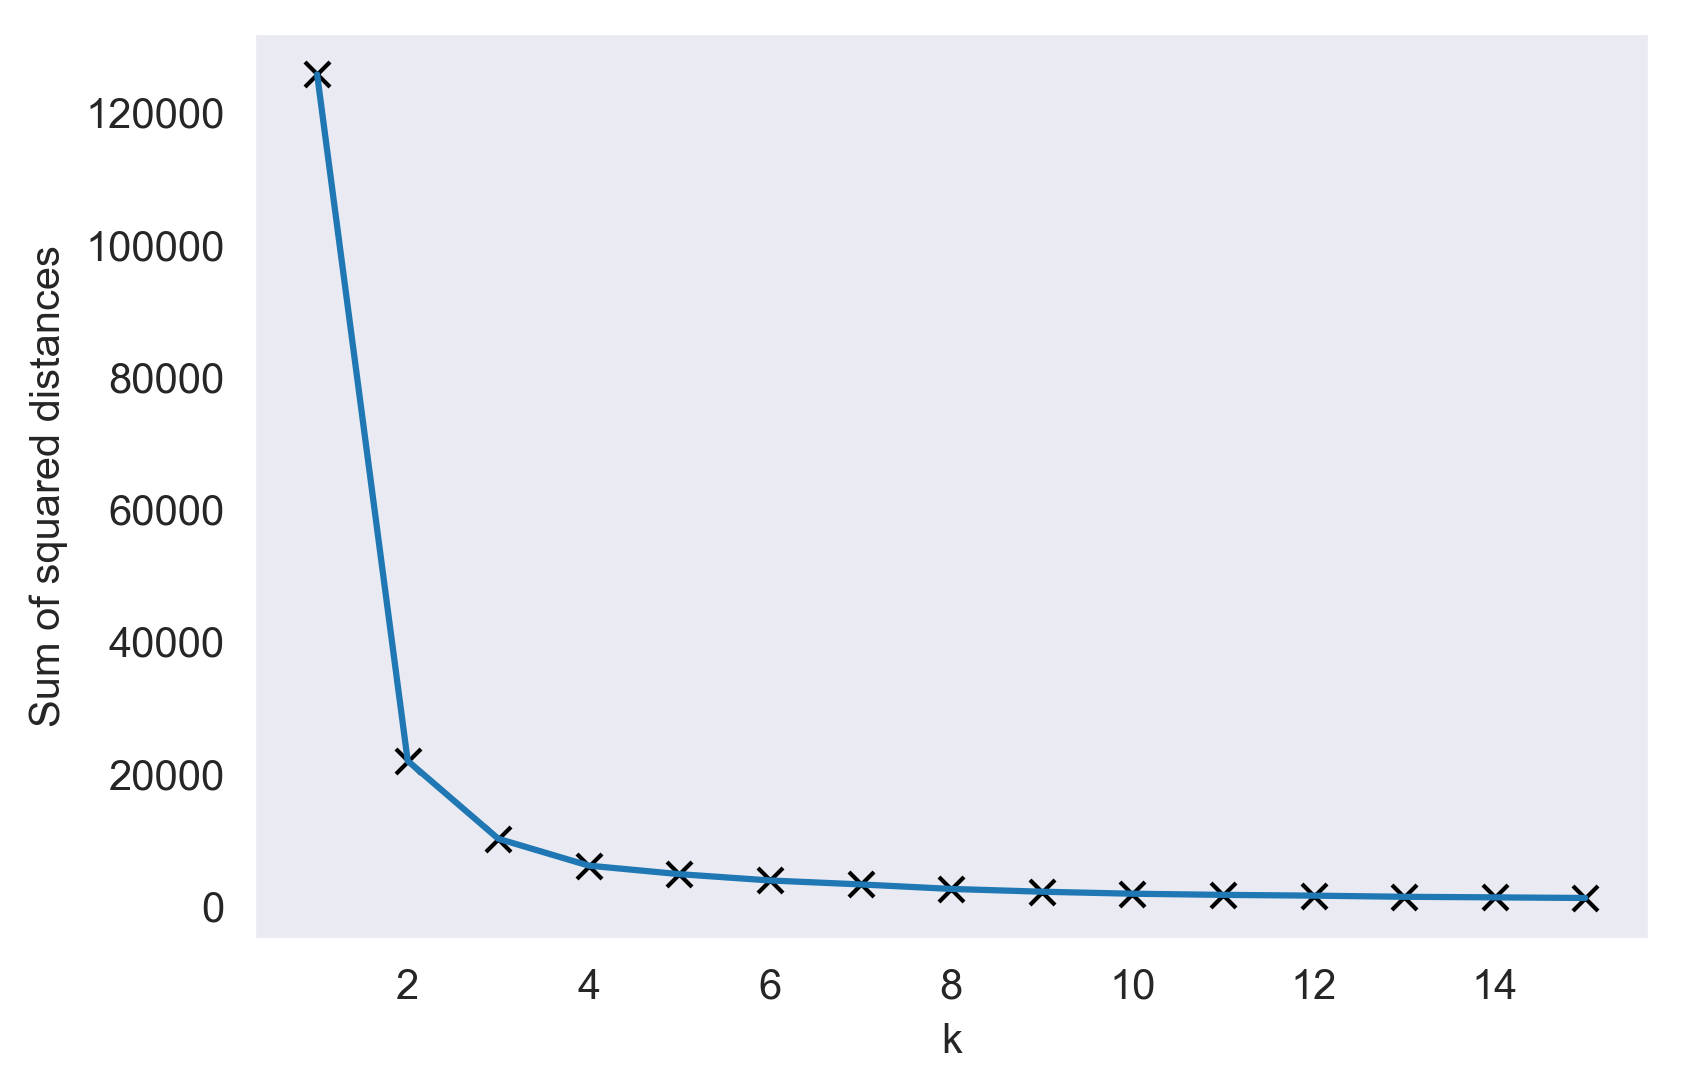

In [10]:
u.elbow_plot(processed_data_umap, max_k=15)

The elbow blot shows that the optimal amount of clusters is 3. Though the amount of 9 clusters delivered better results. 

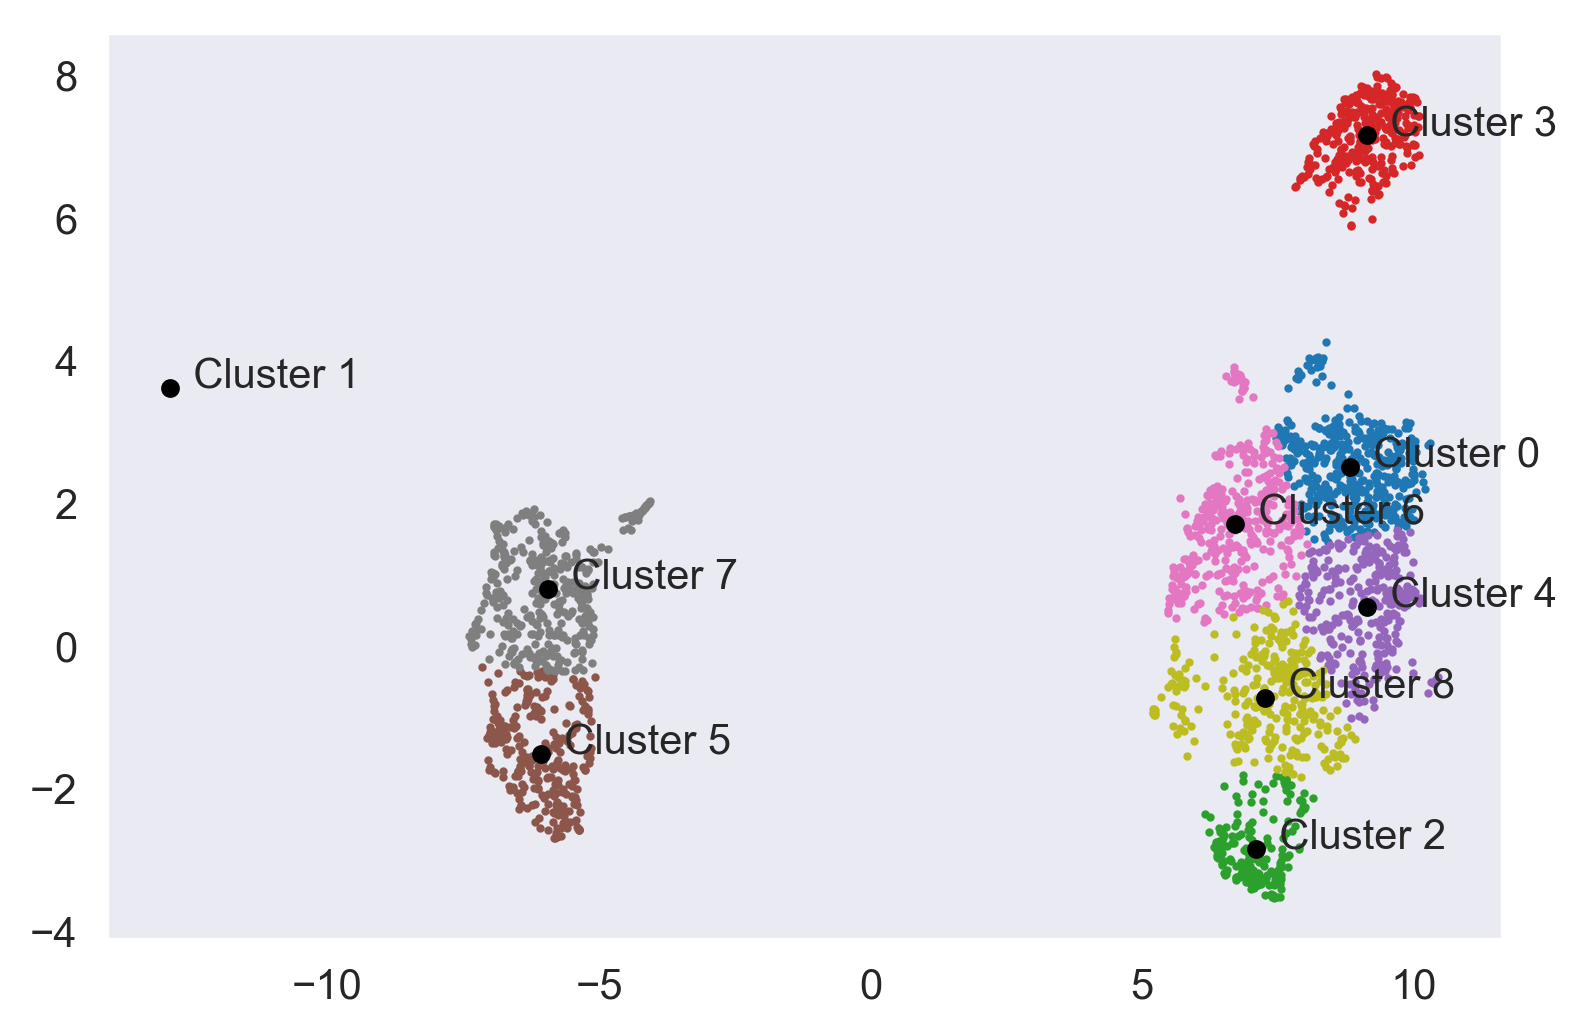

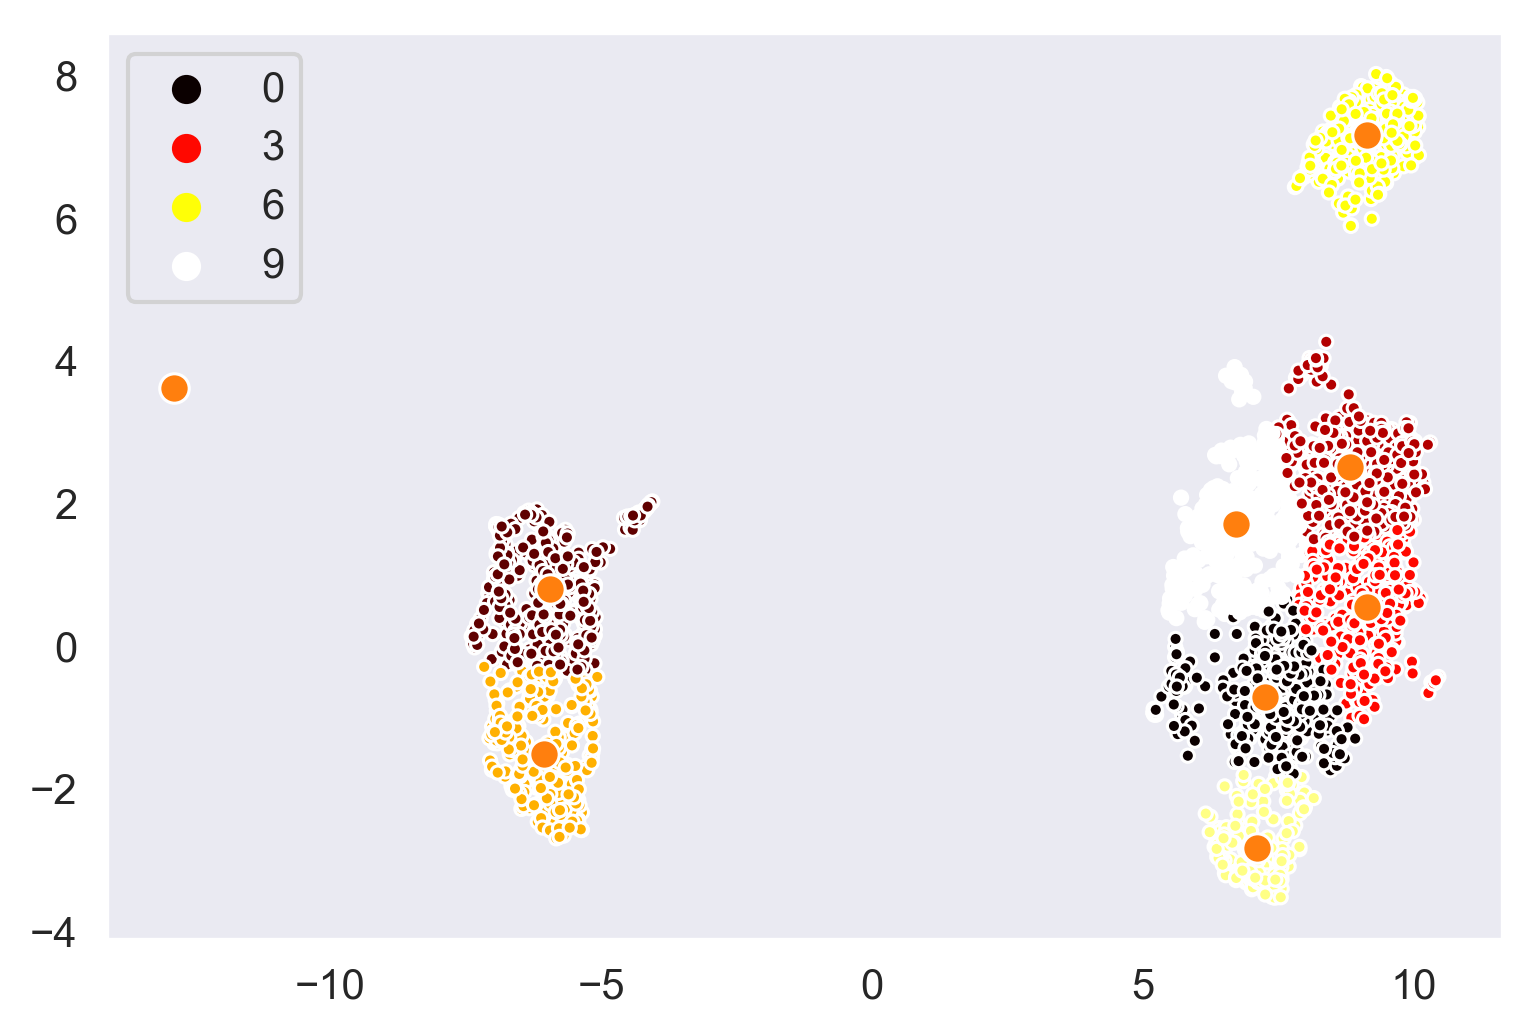

In [11]:
km_umap = cl.Kmeans(k=9).fit(processed_data_umap)
u.plot(km_umap)
u.plot_seaborn(processed_data_umap, ks=9, methods="++")

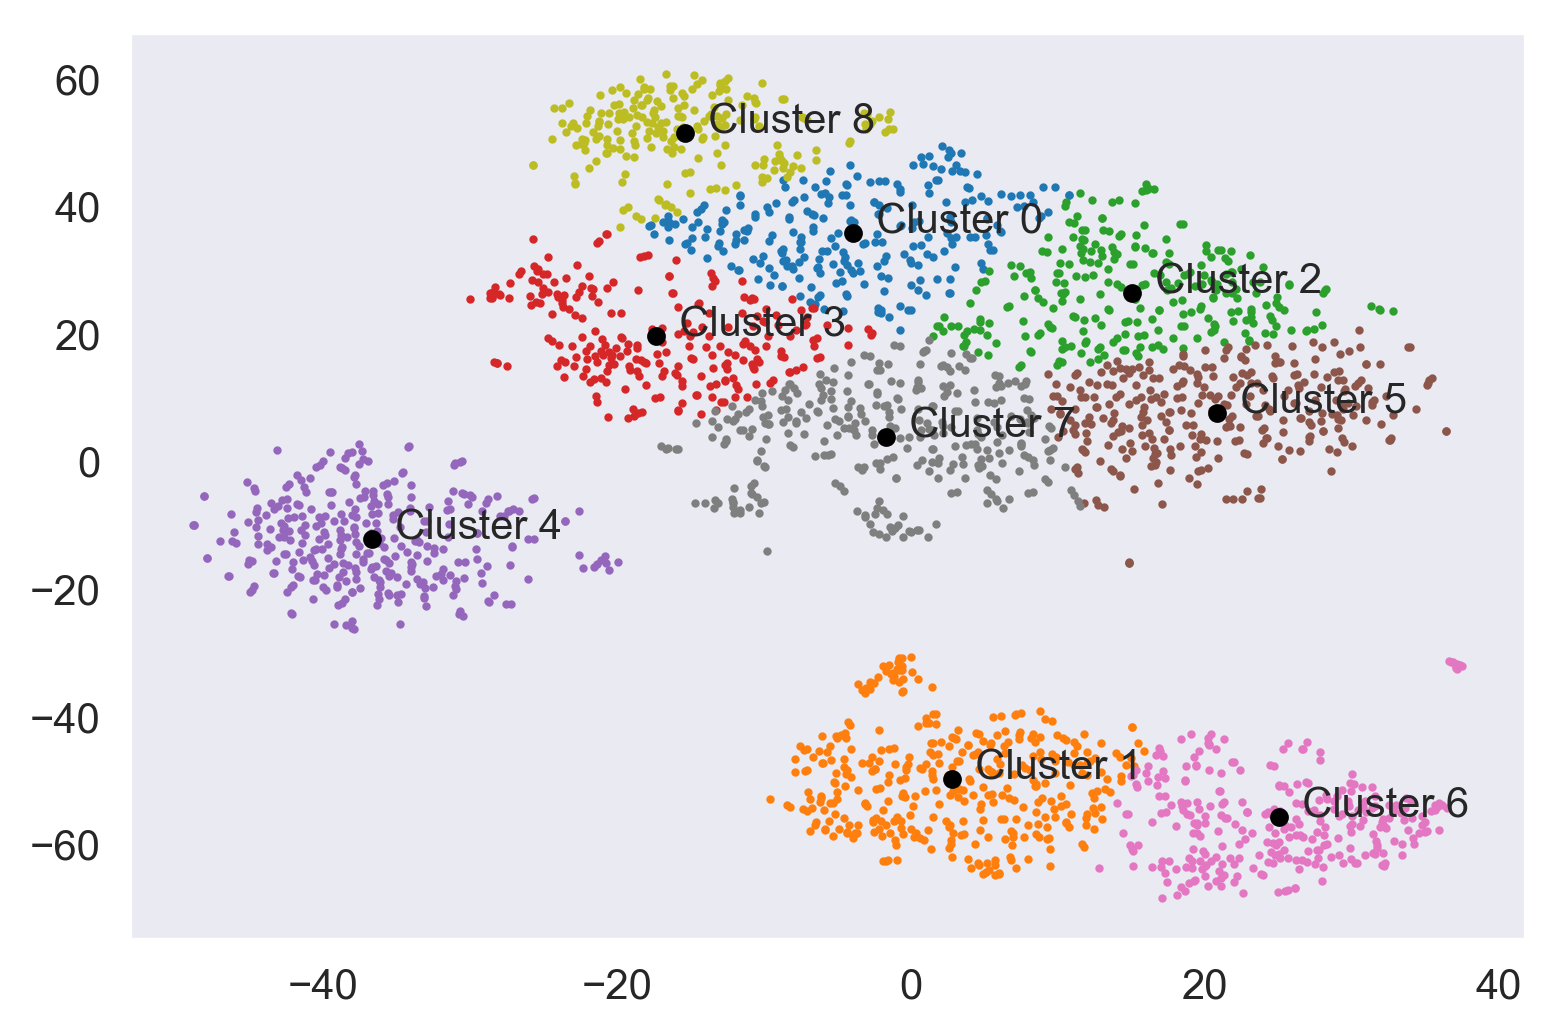

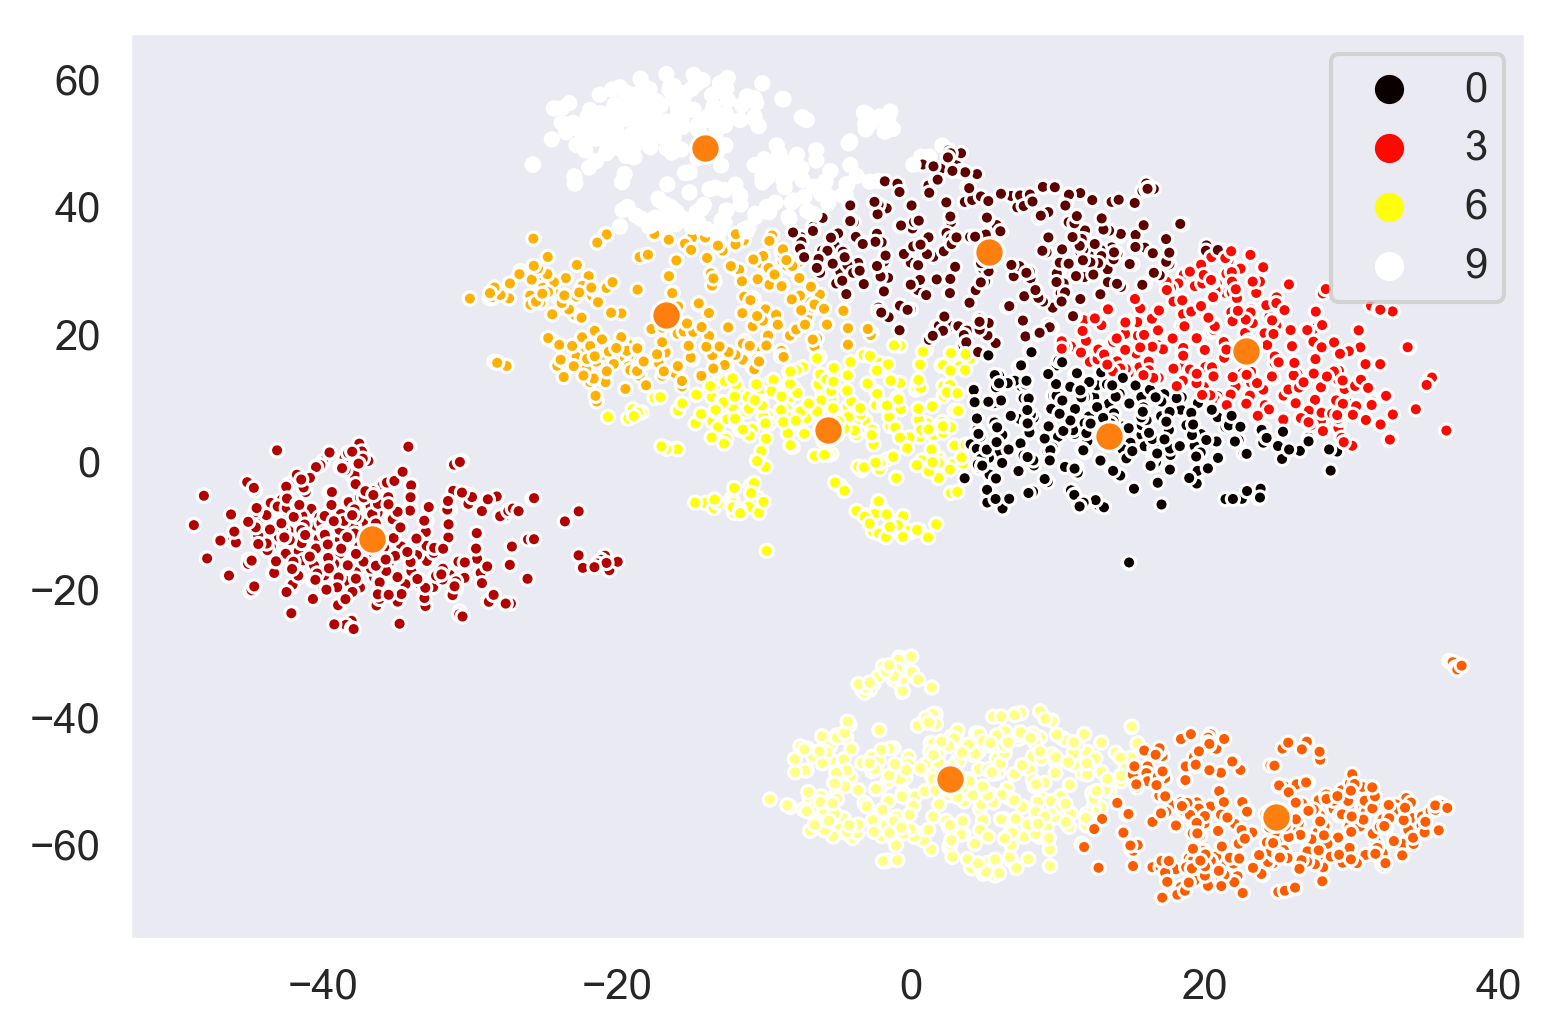

In [12]:
km_tsne = cl.Kmeans(k=9).fit(processed_data_tsne)
u.plot(km_tsne)
u.plot_seaborn(processed_data_tsne, ks=9, methods="++")

We performed umap and tsne. But as umap delivered clearer clusters, we only analysed the data with the clustered umap. 

In [13]:
minimised_data = data.process()[1]

/anaconda3/envs/test/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [14]:
minimised_data.shape

(2643, 13006)

In [15]:
minimised_data["Cluster"] = km_umap.labels_

Here we used the reduced (as explained ealier) data which was not normalised yet. To all the cells we display its assigned cluster. 

In [16]:
comparer_data = minimised_data[minimised_data.Cluster ==0].mean(axis = 0)
final_comparer = pd.DataFrame(comparer_data).T
for i in range(8):
    minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)
    final_comparer = final_comparer.append(pd.DataFrame(minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)).T)
final_comparer = final_comparer.set_index("Cluster")

In [17]:
gene_names = final_comparer.T.index

In [18]:
final_comparer

AL627309.1  RP11-206L10.2  LINC00115     NOC2L    KLHL17   PLEKHN1  \
Cluster                                                                       
0.0        0.002273       0.000000   0.004545  0.115909  0.002273  0.002273   
1.0        0.000000       0.000000   0.000000  0.000000  0.000000  0.000000   
2.0        0.005319       0.000000   0.010638  0.148936  0.005319  0.005319   
3.0        0.000000       0.006061   0.009091  0.109091  0.000000  0.000000   
4.0        0.000000       0.000000   0.000000  0.111486  0.000000  0.006757   
5.0        0.003521       0.000000   0.010563  0.137324  0.007042  0.000000   
6.0        0.002513       0.002513   0.005025  0.100503  0.005025  0.000000   
7.0        0.012920       0.005168   0.007752  0.077519  0.002584  0.005168   
8.0        0.000000       0.000000   0.009709  0.093851  0.003236  0.003236   

             HES4  RP11-54O7.11     ISG15      AGRN  ...   MT-ND4L    MT-ND4  \
Cluster                                              ...                       
0.0      0.011364      0.000000  0.759091  0.000000  ...  0.186364  5.534091   
1.0      0.000000      0.000000  0.090909  0.000000  ...  0.090909  0.818182   
2.0      0.005319      0.000000  0.904255  0.000000  ...  0.148936  4.175532   
3.0      0.012121      0.006061  0.487879  0.000000  ...  0.145455  4.630303   
4.0      0.003378      0.000000  1.297297  0.000000  ...  0.172297  5.577703   
5.0      0.612676      0.003521  3.176056  0.003521  ...  0.176056  6.088028   
6.0      0.002513      0.000000  0.414573  0.000000  ...  0.173367  4.929648   
7.0      0.067183      0.002584  2.260982  0.015504  ...  0.170543  4.772610   
8.0      0.000000      0.000000  0.695793  0.003236  ...  0.139159  4.388350   

           MT-ND5    MT-ND6    MT-CYB  AC145212.1  AL592183.1  AL354822.1  \
Cluster                                                                     
0.0      0.922727  0.136364  4.704545    0.002273    0.161364    0.002273   
1.0      0.272727  0.000000  1.727273    0.090909    0.000000    0.000000   
2.0      0.659574  0.106383  3.095745    0.000000    0.122340    0.000000   
3.0      0.557576  0.060606  3.475758    0.006061    0.172727    0.006061   
4.0      1.016892  0.179054  4.854730    0.006757    0.128378    0.000000   
5.0      1.341549  0.112676  4.933099    0.021127    0.112676    0.010563   
6.0      0.618090  0.087940  4.236181    0.005025    0.143216    0.002513   
7.0      1.085271  0.142119  4.503876    0.007752    0.111111    0.002584   
8.0      0.728155  0.067961  4.148867    0.003236    0.132686    0.000000   

          PNRC2-1  SRSF10-1  
Cluster                      
0.0      0.045455  0.043182  
1.0      0.000000  0.000000  
2.0      0.010638  0.031915  
3.0      0.027273  0.024242  
4.0      0.067568  0.033784  
5.0      0.045775  0.035211  
6.0      0.047739  0.025126  
7.0      0.028424  0.007752  
8.0      0.067961  0.012945  

[9 rows x 13006 columns]

This shows for every gene how much it was expressed on average in each cluster. 

In [19]:
for i in range(9):
    print(str(final_comparer[final_comparer.index == i].T.nlargest(n=10,columns=i))+ "\n")

Cluster        0.0
MALAT1   63.479545
RPL10    47.515909
B2M      45.302273
RPL13    43.645455
RPL13A   42.404545
TMSB4X   41.409091
RPS6     36.468182
RPS2     34.179545
RPS18    32.215909
RPS3     31.309091

Cluster        1.0
TMSB4X   67.000000
PPBP     44.181818
ACTB     35.545455
B2M      26.181818
PF4      18.454545
GPX1     14.636364
OAZ1     12.545455
GNG11    10.454545
FTH1     10.454545
CCL5      9.272727

Cluster        2.0
B2M      71.819149
MALAT1   62.521277
TMSB4X   39.430851
NKG7     22.319149
ACTB     20.904255
GNLY     18.648936
RPL10    17.186170
HLA-C    16.058511
RPL13A   14.446809
RPL13    12.872340

Cluster        3.0
MALAT1   51.248485
RPL13A   30.048485
RPL10    28.387879
CD74     27.715152
B2M      27.457576
RPL13    26.739394
RPS2     21.881818
TMSB4X   21.657576
RPS6     20.521212
RPS18    20.000000

Cluster        4.0
B2M      60.503378
MALAT1   58.837838
TMSB4X   56.750000
RPL10    36.939189
RPL13A   34.405405
RPL13    32.040541
RPS2     29.097973
RPS6    

Next we show the top 10 of genes expressed in each cluster a lot. As you can see, some genes were expressed in each cluster mostly. Genes like MALAT1, B2M, RPL10 and TMSB4X. 

MALAT1 - Metastasis Associated Lung Adenocarcinoma Transcript 1 is an RNA Gene, and is affiliated with the non coding RNA class. 

B2M - Beta-2-Microglobulin encodes a serum protein found in association with the MHCI heavy chain on the surface of nearly all nucleated cells.

RPL10 - Ribosomal Protein L10 encodes a ribosomal protein that is a component of the 60S ribosome subunit.

TMSB4X - Thymosin Beta 4 X-Linked encodes an actin sequestering protein which plays a role in regulation of actin polymerization. The protein is also involved in cell proliferation, migration, and differentiation. This gene escapes X inactivation and has a homolog on chromosome Y.

In [20]:
final_comparer[["IL7R", "CD14", "LYZ", "MS4A1", "CD8A", "GNLY", "NKG7", "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]]

IL7R      CD14        LYZ     MS4A1      CD8A       GNLY  \
Cluster                                                                 
0.0      1.993182  0.022727   0.813636  0.079545  0.193182   0.163636   
1.0      0.090909  0.000000   0.545455  0.000000  0.000000   0.000000   
2.0      0.218085  0.005319   0.585106  0.074468  0.308511  18.648936   
3.0      0.118182  0.003030   0.618182  2.100000  0.021212   0.081818   
4.0      1.790541  0.010135   0.841216  0.222973  0.202703   0.695946   
5.0      0.147887  0.500000  16.711268  0.080986  0.024648   0.133803   
6.0      1.273869  0.012563   0.590452  0.077889  0.203518   0.148241   
7.0      0.157623  1.801034  55.273902  0.054264  0.023256   0.196382   
8.0      1.113269  0.022654   0.563107  0.042071  0.592233   0.812298   

              NKG7    FCGR3A     MS4A7    FCER1A       CST3       PPBP  
Cluster                                                                 
0.0       0.343182  0.059091  0.020455  0.034091   0.254545   0.015909  
1.0       0.000000  0.000000  0.000000  0.000000   1.636364  44.181818  
2.0      22.319149  2.228723  0.010638  0.015957   0.271277   0.000000  
3.0       0.093939  0.036364  0.060606  0.009091   0.260606   0.015152  
4.0       1.378378  0.182432  0.060811  0.006757   0.368243   0.101351  
5.0       0.464789  4.859155  1.890845  0.003521  17.126761   0.285211  
6.0       0.246231  0.037688  0.017588  0.007538   0.168342   0.012563  
7.0       0.297158  0.103359  0.320413  0.687339  16.627907   0.067183  
8.0       6.106796  0.239482  0.009709  0.012945   0.197411   0.055016

IL7R (Interleukin 7 Receptor) - The protein encoded by this gene is a receptor for interleukin 7 (IL7). Interleukin-7 receptor is expressed on various cell types, including **naive and memory T cells** and many others. -> mostly in Cluster **0, 4, 6**, 8

CD14 (CD14 Molecule) - The protein encoded by this gene is a surface antigen that is preferentially expressed on **monocytes/macrophages**. It cooperates with other proteins to mediate the innate immune response to bacterial lipopolysaccharide. -> Cluster **7**

LYZ (Lysozyme) - Lysozymes have primarily a bacteriolytic function; those in tissues and body fluids are associated with the **monocyte-macrophage** system and enhance the activity of immunoagents. -> Cluster **7**, 5

MS4A1 (Membrane Spanning 4-Domains A1) - B-lymphocyte-specific membrane protein that plays a role in the regulation of cellular calcium influx necessary for the development, differentiation, and activation of **B-lymphocytes**. -> Cluster **3**

CD8A (CD8a Molecule) - The CD8 antigen is a cell surface glycoprotein found on most **cytotoxic T lymphocytes** that mediates efficient cell-cell interactions within the immune system. -> Cluster **8**

GNLY (Granulysin) - This antimicrobial protein that kills intracellular pathogens is present in cytotoxic granules of **cytotoxic T lymphocytes and natural killer cells**. -> Cluster **2**

NKG7 (**Natural Killer Cell** Granule Protein 7) -> Cluster **2**

FCGR3A (Fc Fragment Of IgG Receptor IIIa) - The FCGR3A gene encodes for the receptor important for antibody-dependent natural killer cell-mediated cytotoxicity. FcγRIIIA is expressed on **NK cells, monocytes, and macrophages**. -> Cluster **5**

MS4A7 (Membrane Spanning 4-Domains A7) - This gene encodes a member of the membrane-spanning 4A gene family, members of which are characterized by common structural features and similar intron/exon splice boundaries and display unique expression patterns in **hematopoietic cells and nonlymphoid tissues**. -> Cluster **5**

FCER1A (Fc Fragment Of IgE Receptor Ia) - Binds to the Fc region of immunoglobulins epsilon. High affinity receptor. Responsible for initiating the allergic response. Binding of allergen to receptor-bound IgE leads to cell activation and the release of mediators (such as histamine) responsible for the manifestations of allergy. The same receptor also induces the secretion of important lymphokines in **dendritic cells**. -> Cluster **7**

CST3 (Cystatin C) - As an inhibitor of cysteine proteinases, this protein is thought to serve an important physiological role as a local regulator of this enzyme activity. -> Cluster **5,7**

PPBP (Pro-Platelet Basic Protein) - The protein encoded by this gene is a platelet-derived growth factor that belongs to the CXC chemokine family. This growth factor is a potent chemoattractant and activator of neutrophils. PPBP is a chemokine family member that is only found in platelets and their precursors **megakaryocytes**. -> Cluster **1**

From this you can tell, that the clusters probably represent following cells: 

Cluster 0: Naive and memory T-cells

Cluster 1: Megakaryocytes

Cluster 2: NK cells

Cluster 3: B-lymphocytes

Cluster 4: Naive and memory T-cells

Cluster 5: FCGR3A+ monocytes

Cluster 6: Naive and memory T-cells

Cluster 7: Dendritic cells, monocytes / macrophages

Cluster 8: Cytotoxic T-lymphocytes

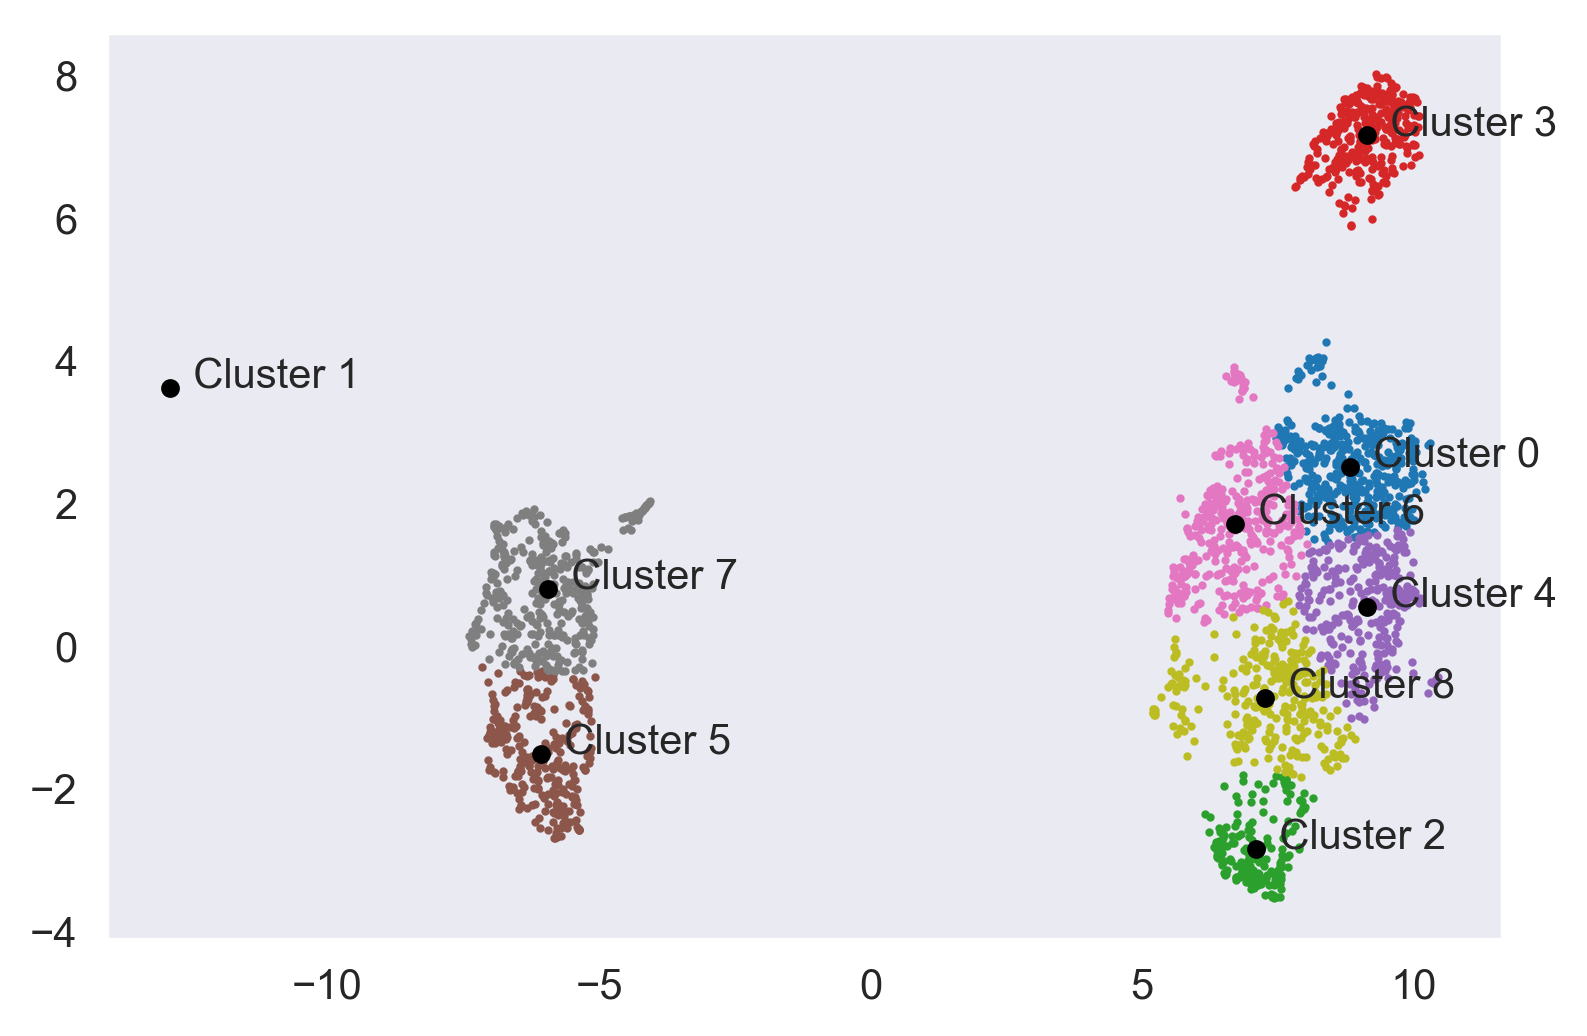

In [22]:
u.plot(km_umap)

## Creating GIFs

To show how kmeans actually clusters we created a gif that shows the clustering over a few iterations. the *Gifcreator* is a utility function based on our  kmeans implementation (in this example kmeans++). It is expanded by a script that saves a picture of the current state each run and stitches them together at the end.

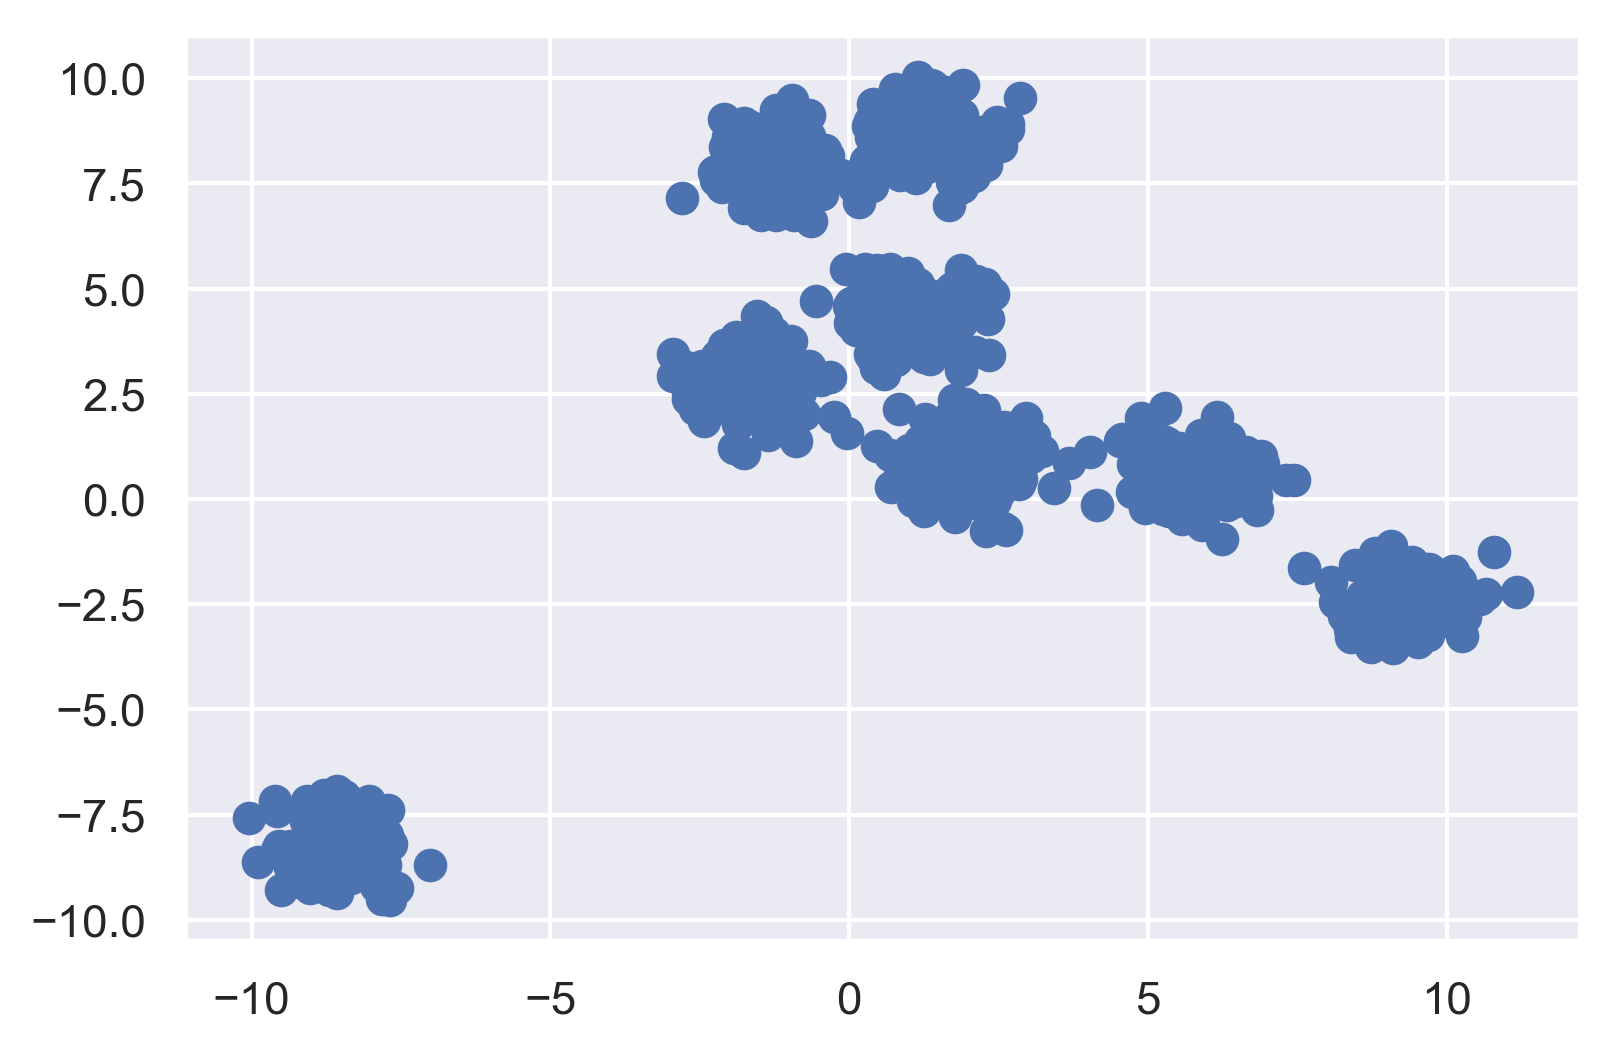

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#generate data
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
gifs = u.Gifcreator()
gifs.create_gif(X)

Init: 0
Init: 1
Init: 2
Init: 3
Init: 4
Init: 5
Init: 6
Init: 7
Init: 8
Init: 9


![SegmentLocal](./kmeans.gif "segment")